# Starbucks Capstone Challenge

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

**Note:** If you are using the workspace, you will need to go to the terminal and run the command `conda update pandas` before reading in the files. This is because the version of pandas in the workspace cannot read in the transcript.json file correctly, but the newest version of pandas can. You can access the termnal from the orange icon in the top left of this notebook.  

You can see how to access the terminal and how the install works using the two images below.  First you need to access the terminal:

<img src="pic1.png"/>

Then you will want to run the above command:

<img src="pic2.png"/>

Finally, when you enter back into the notebook (use the jupyter icon again), you should be able to run the below cell without any errors.

# 1.Fetching the Data

In [4]:
import pandas as pd
import numpy as np
import math
import json
% matplotlib inline

# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

# 2. Data Preparation and Cleaning

# 2.1 Data Preparation

In [5]:
def data_informations(data):
    '''
    
    INPUT:
    Data
    
    OUTPUT:
    Description , Head values , Data Shape , Data Null Values
    
    '''
    print('The Data Desription is: ','\n',data.describe(),'\n')
    print( data.info()) 
    print('\n','The Head Values are :','\n' , data.head())
    print('\n','The Shape is:',data.shape)
    print('\n','The Null Values are :' ,'\n', data.isna().sum())
    
    
    

# 2.1.1 Portfolio Data Set analysis (Discription,Shape,...)

In [6]:
data_informations(portfolio)

The Data Desription is:  
        difficulty   duration     reward
count   10.000000  10.000000  10.000000
mean     7.700000   6.500000   4.200000
std      5.831905   2.321398   3.583915
min      0.000000   3.000000   0.000000
25%      5.000000   5.000000   2.000000
50%      8.500000   7.000000   4.000000
75%     10.000000   7.000000   5.000000
max     20.000000  10.000000  10.000000 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
channels      10 non-null object
difficulty    10 non-null int64
duration      10 non-null int64
id            10 non-null object
offer_type    10 non-null object
reward        10 non-null int64
dtypes: int64(3), object(3)
memory usage: 560.0+ bytes
None

 The Head Values are : 
                        channels  difficulty  duration  \
0       [email, mobile, social]          10         7   
1  [web, email, mobile, social]          10         5   
2          [web, email, mobile]           0         4   
3

In [7]:
print(portfolio.id.unique())
print('\n',portfolio['id'].count)


['ae264e3637204a6fb9bb56bc8210ddfd' '4d5c57ea9a6940dd891ad53e9dbe8da0'
 '3f207df678b143eea3cee63160fa8bed' '9b98b8c7a33c4b65b9aebfe6a799e6d9'
 '0b1e1539f2cc45b7b9fa7c272da2e1d7' '2298d6c36e964ae4a3e7e9706d1fb8c2'
 'fafdcd668e3743c1bb461111dcafc2a4' '5a8bc65990b245e5a138643cd4eb9837'
 'f19421c1d4aa40978ebb69ca19b0e20d' '2906b810c7d4411798c6938adc9daaa5']

 <bound method Series.count of 0    ae264e3637204a6fb9bb56bc8210ddfd
1    4d5c57ea9a6940dd891ad53e9dbe8da0
2    3f207df678b143eea3cee63160fa8bed
3    9b98b8c7a33c4b65b9aebfe6a799e6d9
4    0b1e1539f2cc45b7b9fa7c272da2e1d7
5    2298d6c36e964ae4a3e7e9706d1fb8c2
6    fafdcd668e3743c1bb461111dcafc2a4
7    5a8bc65990b245e5a138643cd4eb9837
8    f19421c1d4aa40978ebb69ca19b0e20d
9    2906b810c7d4411798c6938adc9daaa5
Name: id, dtype: object>


In [8]:
portfolio

channels  difficulty  duration  \
0       [email, mobile, social]          10         7   
1  [web, email, mobile, social]          10         5   
2          [web, email, mobile]           0         4   
3          [web, email, mobile]           5         7   
4                  [web, email]          20        10   
5  [web, email, mobile, social]           7         7   
6  [web, email, mobile, social]          10        10   
7       [email, mobile, social]           0         3   
8  [web, email, mobile, social]           5         5   
9          [web, email, mobile]          10         7   

                                 id     offer_type  reward  
0  ae264e3637204a6fb9bb56bc8210ddfd           bogo      10  
1  4d5c57ea9a6940dd891ad53e9dbe8da0           bogo      10  
2  3f207df678b143eea3cee63160fa8bed  informational       0  
3  9b98b8c7a33c4b65b9aebfe6a799e6d9           bogo       5  
4  0b1e1539f2cc45b7b9fa7c272da2e1d7       discount       5  
5  2298d6c36e964ae4a3e7e9706d1fb8c2       discount       3  
6  fafdcd668e3743c1bb461111dcafc2a4       discount       2  
7  5a8bc65990b245e5a138643cd4eb9837  informational       0  
8  f19421c1d4aa40978ebb69ca19b0e20d           bogo       5  
9  2906b810c7d4411798c6938adc9daaa5       discount       2

# 2.1.2 Profile Data Set analysis (Description , Shape ,....)

In [9]:
data_informations(profile)

The Data Desription is:  
                 age  became_member_on         income
count  17000.000000      1.700000e+04   14825.000000
mean      62.531412      2.016703e+07   65404.991568
std       26.738580      1.167750e+04   21598.299410
min       18.000000      2.013073e+07   30000.000000
25%       45.000000      2.016053e+07   49000.000000
50%       58.000000      2.017080e+07   64000.000000
75%       73.000000      2.017123e+07   80000.000000
max      118.000000      2.018073e+07  120000.000000 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
age                 17000 non-null int64
became_member_on    17000 non-null int64
gender              14825 non-null object
id                  17000 non-null object
income              14825 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.1+ KB
None

 The Head Values are : 
    age  became_member_on gender                                id    income
0  118

In [10]:
#print(profile.id.unique())
print('\n',profile['id'].count)


 <bound method Series.count of 0        68be06ca386d4c31939f3a4f0e3dd783
1        0610b486422d4921ae7d2bf64640c50b
2        38fe809add3b4fcf9315a9694bb96ff5
3        78afa995795e4d85b5d9ceeca43f5fef
4        a03223e636434f42ac4c3df47e8bac43
5        e2127556f4f64592b11af22de27a7932
6        8ec6ce2a7e7949b1bf142def7d0e0586
7        68617ca6246f4fbc85e91a2a49552598
8        389bc3fa690240e798340f5a15918d5c
9        8974fc5686fe429db53ddde067b88302
10       c4863c7985cf408faee930f111475da3
11       148adfcaa27d485b82f323aaaad036bd
12       2eeac8d8feae4a8cad5a6af0499a211d
13       aa4862eba776480b8bb9c68455b8c2e1
14       e12aeaf2d47d42479ea1c4ac3d8286c6
15       31dda685af34476cad5bc968bdb01c53
16       62cf5e10845442329191fc246e7bcea3
17       744d603ef08c4f33af5a61c8c7628d1c
18       6445de3b47274c759400cd68131d91b4
19       a448667f336b42c9a66fc5ffd5d73772
20       440cf1fd7580490c971d8c651ed962af
21       4b0da7e80e5945209a1fdddfe813dbe0
22       c27e0d6ab72c455a8bb66d980963de60
23

In [11]:
#drop NAN values in Profile Data set.
profile.dropna(inplace=True)

In [12]:
data_informations(profile)

The Data Desription is:  
                 age  became_member_on         income
count  14825.000000      1.482500e+04   14825.000000
mean      54.393524      2.016689e+07   65404.991568
std       17.383705      1.188565e+04   21598.299410
min       18.000000      2.013073e+07   30000.000000
25%       42.000000      2.016052e+07   49000.000000
50%       55.000000      2.017080e+07   64000.000000
75%       66.000000      2.017123e+07   80000.000000
max      101.000000      2.018073e+07  120000.000000 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14825 entries, 1 to 16999
Data columns (total 5 columns):
age                 14825 non-null int64
became_member_on    14825 non-null int64
gender              14825 non-null object
id                  14825 non-null object
income              14825 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 694.9+ KB
None

 The Head Values are : 
     age  became_member_on gender                                id    income
1    

In [13]:
#changing id Column in profile data set to Customer to avoid the conflict with the id(offer) in portfolio data set.
profile.rename(columns={'id':'customer'}, inplace=True)
print(profile.columns)

Index(['age', 'became_member_on', 'gender', 'customer', 'income'], dtype='object')


# 2.1.3 Transcript Data set analysis (Description , Shape,....)

In [14]:
data_informations(transcript)

The Data Desription is:  
                 time
count  306534.000000
mean      366.382940
std       200.326314
min         0.000000
25%       186.000000
50%       408.000000
75%       528.000000
max       714.000000 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
event     306534 non-null object
person    306534 non-null object
time      306534 non-null int64
value     306534 non-null object
dtypes: int64(1), object(3)
memory usage: 9.4+ MB
None

 The Head Values are : 
             event                            person  time  \
0  offer received  78afa995795e4d85b5d9ceeca43f5fef     0   
1  offer received  a03223e636434f42ac4c3df47e8bac43     0   
2  offer received  e2127556f4f64592b11af22de27a7932     0   
3  offer received  8ec6ce2a7e7949b1bf142def7d0e0586     0   
4  offer received  68617ca6246f4fbc85e91a2a49552598     0   

                                              value  
0  {'offer id': '9b98b8c7a33c4b65b9aebf

# 2.2 Cleaning Data sets and reframing

# 2.2.1 Cleaning Profile Data Set and reframing

In [15]:
#Definning Age Groups
profile['age_groups'] = pd.cut(profile.age, bins=[0, 18, 30, 50, 70, 110], labels=['child', 'teen', 'young_adults', 'middle_age_adults', 'elderly'])

In [16]:
#Transform the became_member_on to Month / year Format.
#Claculating the cumulative number of days since the subscription start.
import datetime as dt
def member_days(profile):
    """
    Adding a new column with the date transformed to number of days since the foundation day 31/3/1971.
    """
    profile.became_member_on = pd.to_datetime(profile.became_member_on,format='%Y%m%d')
    profile['member_launch_Cum_days'] = (profile.became_member_on - dt.datetime(1971, 3, 31)).dt.days
    profile['member_launch_year'] = profile['became_member_on'].dt.year
    
    return profile


In [17]:
member_days(profile)

age became_member_on gender                          customer  \
1       55       2017-07-15      F  0610b486422d4921ae7d2bf64640c50b   
3       75       2017-05-09      F  78afa995795e4d85b5d9ceeca43f5fef   
5       68       2018-04-26      M  e2127556f4f64592b11af22de27a7932   
8       65       2018-02-09      M  389bc3fa690240e798340f5a15918d5c   
12      58       2017-11-11      M  2eeac8d8feae4a8cad5a6af0499a211d   
13      61       2017-09-11      F  aa4862eba776480b8bb9c68455b8c2e1   
14      26       2014-02-13      M  e12aeaf2d47d42479ea1c4ac3d8286c6   
15      62       2016-02-11      F  31dda685af34476cad5bc968bdb01c53   
16      49       2014-11-13      M  62cf5e10845442329191fc246e7bcea3   
18      57       2017-12-31      M  6445de3b47274c759400cd68131d91b4   
19      61       2018-05-01      F  a448667f336b42c9a66fc5ffd5d73772   
20      40       2016-05-04      F  440cf1fd7580490c971d8c651ed962af   
21      64       2017-09-09      M  4b0da7e80e5945209a1fdddfe813dbe0   
22      78       2017-06-16      F  c27e0d6ab72c455a8bb66d980963de60   
24      42       2013-08-11      M  f806632c011441378d4646567f357a21   
25      56       2018-04-28      F  d058f73bf8674a26a95227db098147b1   
27      33       2017-09-26      F  c6c9884912c645429f3333f912b55f44   
28      46       2017-09-11      F  7429a044884842d6862f516c38b1156f   
29      59       2015-01-21      M  ebe7ef46ea6f4963a7dd49f501b26779   
30      67       2014-08-23      M  5917d13f6fa04286abdf95f4d5cefb1e   
31      53       2017-09-16      O  d1ede868e29245ea91818a903fec04c6   
32      22       2017-09-25      M  1e9420836d554513ab90eba98552d0a9   
33      96       2017-11-17      F  868317b9be554cb18e50bc68484749a2   
34      40       2016-07-09      M  f082d80f0aac47a99173ba8ef8fc1909   
35      69       2016-08-14      F  102e9454054946fda62242d2e176fdce   
37      56       2014-05-11      M  8dabe2142cdf4013a6f4786edf8ab00f   
38      26       2017-08-12      F  9f30b375d7bd4c62a884ffe7034e09ee   
40      75       2015-11-12      M  6e014185620b49bd98749f728747572f   
41      20       2016-07-11      F  02c083884c7d45b39cc68e1314fec56c   
42      45       2018-07-07      M  c0d210398dee4a0895b24444a5fcd1d2   
...    ...              ...    ...                               ...   
16963   62       2017-01-12      F  8c3fbf6b89b248bb99b7a6ca628f401c   
16964   52       2018-04-08      M  68213b08d99a4ae1b0dcb72aebd9aa35   
16965   52       2018-04-09      M  e340cbf00a914f0c958577c0af36ed8a   
16966   54       2015-01-26      M  10316535e185400fb093c371d62254e3   
16967   54       2015-06-26      M  cec1cdc6b77e41abbdce8903c5522e7e   
16968   74       2017-07-25      M  2c6f50c1c07a444896e2a4e31d724f92   
16970   67       2015-11-07      M  a2e6029e17b6466187a40b66e333a73e   
16971   52       2018-05-22      F  6e71b66784844d1ab8376ac8ab096d4b   
16972   44       2017-01-19      F  e2fd53ed790240c586b3188f23542cca   
16973   30       2015-10-12      M  08eb126ad33f447ca3ad076482445c05   
16974   59       2016-01-13      F  f88e91a11d8f405b9a47ad3741415b83   
16975   61       2017-12-31      F  1b4df4b48bf64727a4c445909aea1251   
16976   39       2016-09-21      F  122c0c2a3c2540848f8c3fdc37e97639   
16978   29       2017-02-20      F  54bead4179c44b71acc4e8398181d183   
16979   63       2013-09-22      F  a00058cf10334a308c68e7631c529907   
16981   84       2016-06-29      M  1966fa40d2f84620b2b1b9b64f8e0209   
16983   72       2015-04-04      F  ff737c250d2343729ade04c4f6eb1001   
16984   75       2016-07-16      F  392d23b2c958493197f647bedfe4f418   
16985   26       2018-06-19      M  97ee6e7a12fe4064b260fa48bdd0330f   
16986   59       2017-07-31      F  bf3069b178fe40d789dd027901bc406b   
16987   57       2016-07-09      M  76ddbd6576844afe811f1a3c0fbb5bec   
16988   64       2018-01-04      M  f653cf2d8bba42d0a53c2937ee2e5893   
16990   70       2016-03-10      F  79edb810789c447e8d212a324b44cc16   
16992   21       2017-09-17      F  400d0536e87

# 2.2.2 Cleaning Transcript Data Set and reframing

In [18]:

def clean_transcript(transcript):
    '''
    INPUT:
    transcript - the transcript dataframe 
    
    OUTPUT:
    offer id , amount  - the cleaned offer dataframe , dropping value
    
    '''
    offer = transcript[transcript['value'].apply(lambda x: True if ('offer id' in x) or ('offer_id' in x) or ('amount' in x)  else False)]
    offer['offer_id'] = offer['value'].apply(lambda x: x['offer id'] if ('offer id' in x) else (x['offer_id'] if ('offer_id' in x)  else '0'))
    offer['amount'] = offer['value'].apply(lambda x: x['amount'] if ('amount' in x) else '0')
    return offer

In [19]:
Clean_transcript=clean_transcript(transcript)
Updated_transcript=Clean_transcript.drop(['value'],axis=1)

In [20]:
Updated_transcript.rename(columns={'person':'customer'}, inplace=True)

In [21]:
Updated_transcript

event                          customer  time  \
0        offer received  78afa995795e4d85b5d9ceeca43f5fef     0   
1        offer received  a03223e636434f42ac4c3df47e8bac43     0   
2        offer received  e2127556f4f64592b11af22de27a7932     0   
3        offer received  8ec6ce2a7e7949b1bf142def7d0e0586     0   
4        offer received  68617ca6246f4fbc85e91a2a49552598     0   
5        offer received  389bc3fa690240e798340f5a15918d5c     0   
6        offer received  c4863c7985cf408faee930f111475da3     0   
7        offer received  2eeac8d8feae4a8cad5a6af0499a211d     0   
8        offer received  aa4862eba776480b8bb9c68455b8c2e1     0   
9        offer received  31dda685af34476cad5bc968bdb01c53     0   
10       offer received  744d603ef08c4f33af5a61c8c7628d1c     0   
11       offer received  3d02345581554e81b7b289ab5e288078     0   
12       offer received  4b0da7e80e5945209a1fdddfe813dbe0     0   
13       offer received  c27e0d6ab72c455a8bb66d980963de60     0   
14       offer received  d53717f5400c4e84affdaeda9dd926b3     0   
15       offer received  f806632c011441378d4646567f357a21     0   
16       offer received  d058f73bf8674a26a95227db098147b1     0   
17       offer received  65aba5c617294649aeb624da249e1ee5     0   
18       offer received  ebe7ef46ea6f4963a7dd49f501b26779     0   
19       offer received  1e9420836d554513ab90eba98552d0a9     0   
20       offer received  868317b9be554cb18e50bc68484749a2     0   
21       offer received  f082d80f0aac47a99173ba8ef8fc1909     0   
22       offer received  102e9454054946fda62242d2e176fdce     0   
23       offer received  4beeb3ed64dd4898b0edf2f6b67426d3     0   
24       offer received  9f30b375d7bd4c62a884ffe7034e09ee     0   
25       offer received  25c906289d154b66bf579693f89481c9     0   
26       offer received  6e014185620b49bd98749f728747572f     0   
27       offer received  02c083884c7d45b39cc68e1314fec56c     0   
28       offer received  c0d210398dee4a0895b24444a5fcd1d2     0   
29       offer received  8be4463721e14d7fa600686bf8c8b2ed     0   
...                 ...                               ...   ...   
306504      transaction  8524d450673b4c24869b6c94380006de   714   
306505      transaction  b895c57e8cd047a8872ce02aa54759d6   714   
306506  offer completed  b895c57e8cd047a8872ce02aa54759d6   714   
306507     offer viewed  8dda575c2a1d44b9ac8e8b07b93d1f8e   714   
306508      transaction  8431c16f8e1d440880db371a68f82dd0   714   
306509  offer completed  8431c16f8e1d440880db371a68f82dd0   714   
306510      transaction  ba620885e51c4b0ea64a4f61daad494f   714   
306511      transaction  a1a8f40407c444cc848468275308958a   714   
306512      transaction  8d80970192fa496f99d6b45c470a4b60   714   
306513      transaction  bde275066f3c4fa0bff3093e3b866a2c   714   
306514      transaction  f1e4fd36e5a0446f83861308bddf6945   714   
306515      transaction  0b64be3b241c4407a5c9a71781173829   714   
306516      transaction  86d03d35d7e0434b935e7743e83be3a0   714   
306517      transaction  3408fd05c781401f8442fb6dbaaea9c7   714   
306518      transaction  1593d617fac246ef8e50dbb0ffd77f5f   714   
306519      transaction  f1b31d07b5d84f69a2d5f1d07843989e   714   
306520      transaction  2ce987015ec0404a97ba333e8e814090   714   
306521      transaction  2e33545f0a764d27b2ccff95fc8d72c4   714   
306522      transaction  d1c4500ace2e45e9a45d3cd2fccac8d8   714   
306523      transaction  b65affd9e07346a1906364a396950e3d   714   
306524      transaction  d613ca9c59dd42f497bdbf6178da54a7   714   
306525      transaction  eec70ab28af74a22a4aeb889c0317944   714   
306526      transaction  24f56b5e1849462093931b164eb803b5   714   
306527  offer completed  24f56b5e1849462093931b164eb803b5   714   
306528      transaction  5ca2620962114246ab218fc648eb3934   714   
306529      transaction  b3a1272bc9904337b331bf348c3e8c17   714   
306530      transaction  68213b08d99a4ae1b0dcb72aebd9aa35   714   
306531      transaction  a00058cf10334a308c68e7631c529907   714  

# 2.2.3 Cleaning Portfolio Data Set and reframing

In [22]:
def clean_Portfolio(portfolio):
    '''
    INPUT:
    portfolio - the portfolio dataframe to be cleaned
    
    OUTPUT:
    portfolio - the cleaned portfolio dataframe
    
    '''
    # change the duration from day to hour
    updated_portfolio = portfolio.copy()
    updated_portfolio['duration'] = updated_portfolio['duration'] * 24
    
    # apply one hot encoding to channels column
    updated_portfolio['web'] = updated_portfolio['channels'].apply(lambda x: 1 if 'web' in x else 0)
    updated_portfolio['email'] = updated_portfolio['channels'].apply(lambda x: 1 if 'email' in x else 0)
    updated_portfolio['mobile'] = updated_portfolio['channels'].apply(lambda x: 1 if 'mobile' in x else 0)
    updated_portfolio['social'] = updated_portfolio['channels'].apply(lambda x: 1 if 'social' in x else 0)
    
    updated_portfolio.drop(['channels'], axis=1, inplace=True)
    
    return updated_portfolio

In [23]:
updated_portfolio=clean_Portfolio(portfolio)

In [24]:
#change the ID Column to Offer_id to be consistent with the offer_id Column in Updated transcript data set
updated_portfolio.rename(columns={'id':'offer_id'}, inplace=True)


In [300]:
updated_portfolio

difficulty  duration                          offer_id     offer_type  \
0          10       168  ae264e3637204a6fb9bb56bc8210ddfd           bogo   
1          10       120  4d5c57ea9a6940dd891ad53e9dbe8da0           bogo   
2           0        96  3f207df678b143eea3cee63160fa8bed  informational   
3           5       168  9b98b8c7a33c4b65b9aebfe6a799e6d9           bogo   
4          20       240  0b1e1539f2cc45b7b9fa7c272da2e1d7       discount   
5           7       168  2298d6c36e964ae4a3e7e9706d1fb8c2       discount   
6          10       240  fafdcd668e3743c1bb461111dcafc2a4       discount   
7           0        72  5a8bc65990b245e5a138643cd4eb9837  informational   
8           5       120  f19421c1d4aa40978ebb69ca19b0e20d           bogo   
9          10       168  2906b810c7d4411798c6938adc9daaa5       discount   

   reward  web  email  mobile  social  
0      10    0      1       1       1  
1      10    1      1       1       1  
2       0    1      1       1       0  
3       5    1      1       1       0  
4       5    1      1       0       0  
5       3    1      1       1       1  
6       2    1      1       1       1  
7       0    0      1       1       1  
8       5    1      1       1       1  
9       2    1      1       1       0

# 3 Data Sets Visualization and analysis before Merging 

# 3.1 Data Visualization

# 3.1.1 Profile Data Visualization

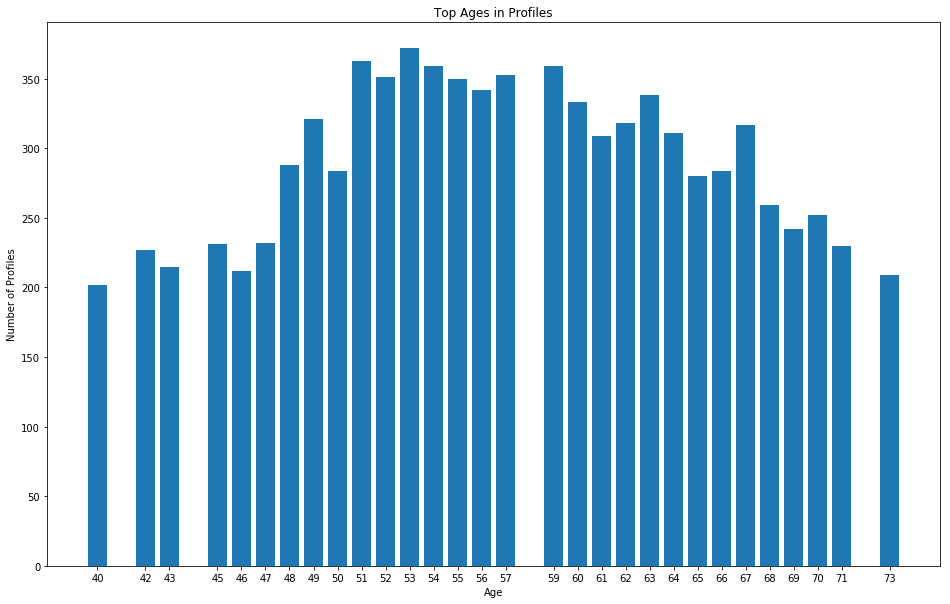

In [32]:
#Histogram for profiles of TOP 30 Customers according to their ages
plt.figure(figsize=(16, 10))
top30_ages = profile['age'].value_counts()[1:].head(30).reset_index()
plt.bar(top30_ages['index'], top30_ages['age'])
plt.title('Top Ages in Profiles')
plt.ylabel('Number of Profiles')
plt.xlabel('Age')
plt.xticks(top30_ages['index'], rotation = 0)
plt.show();


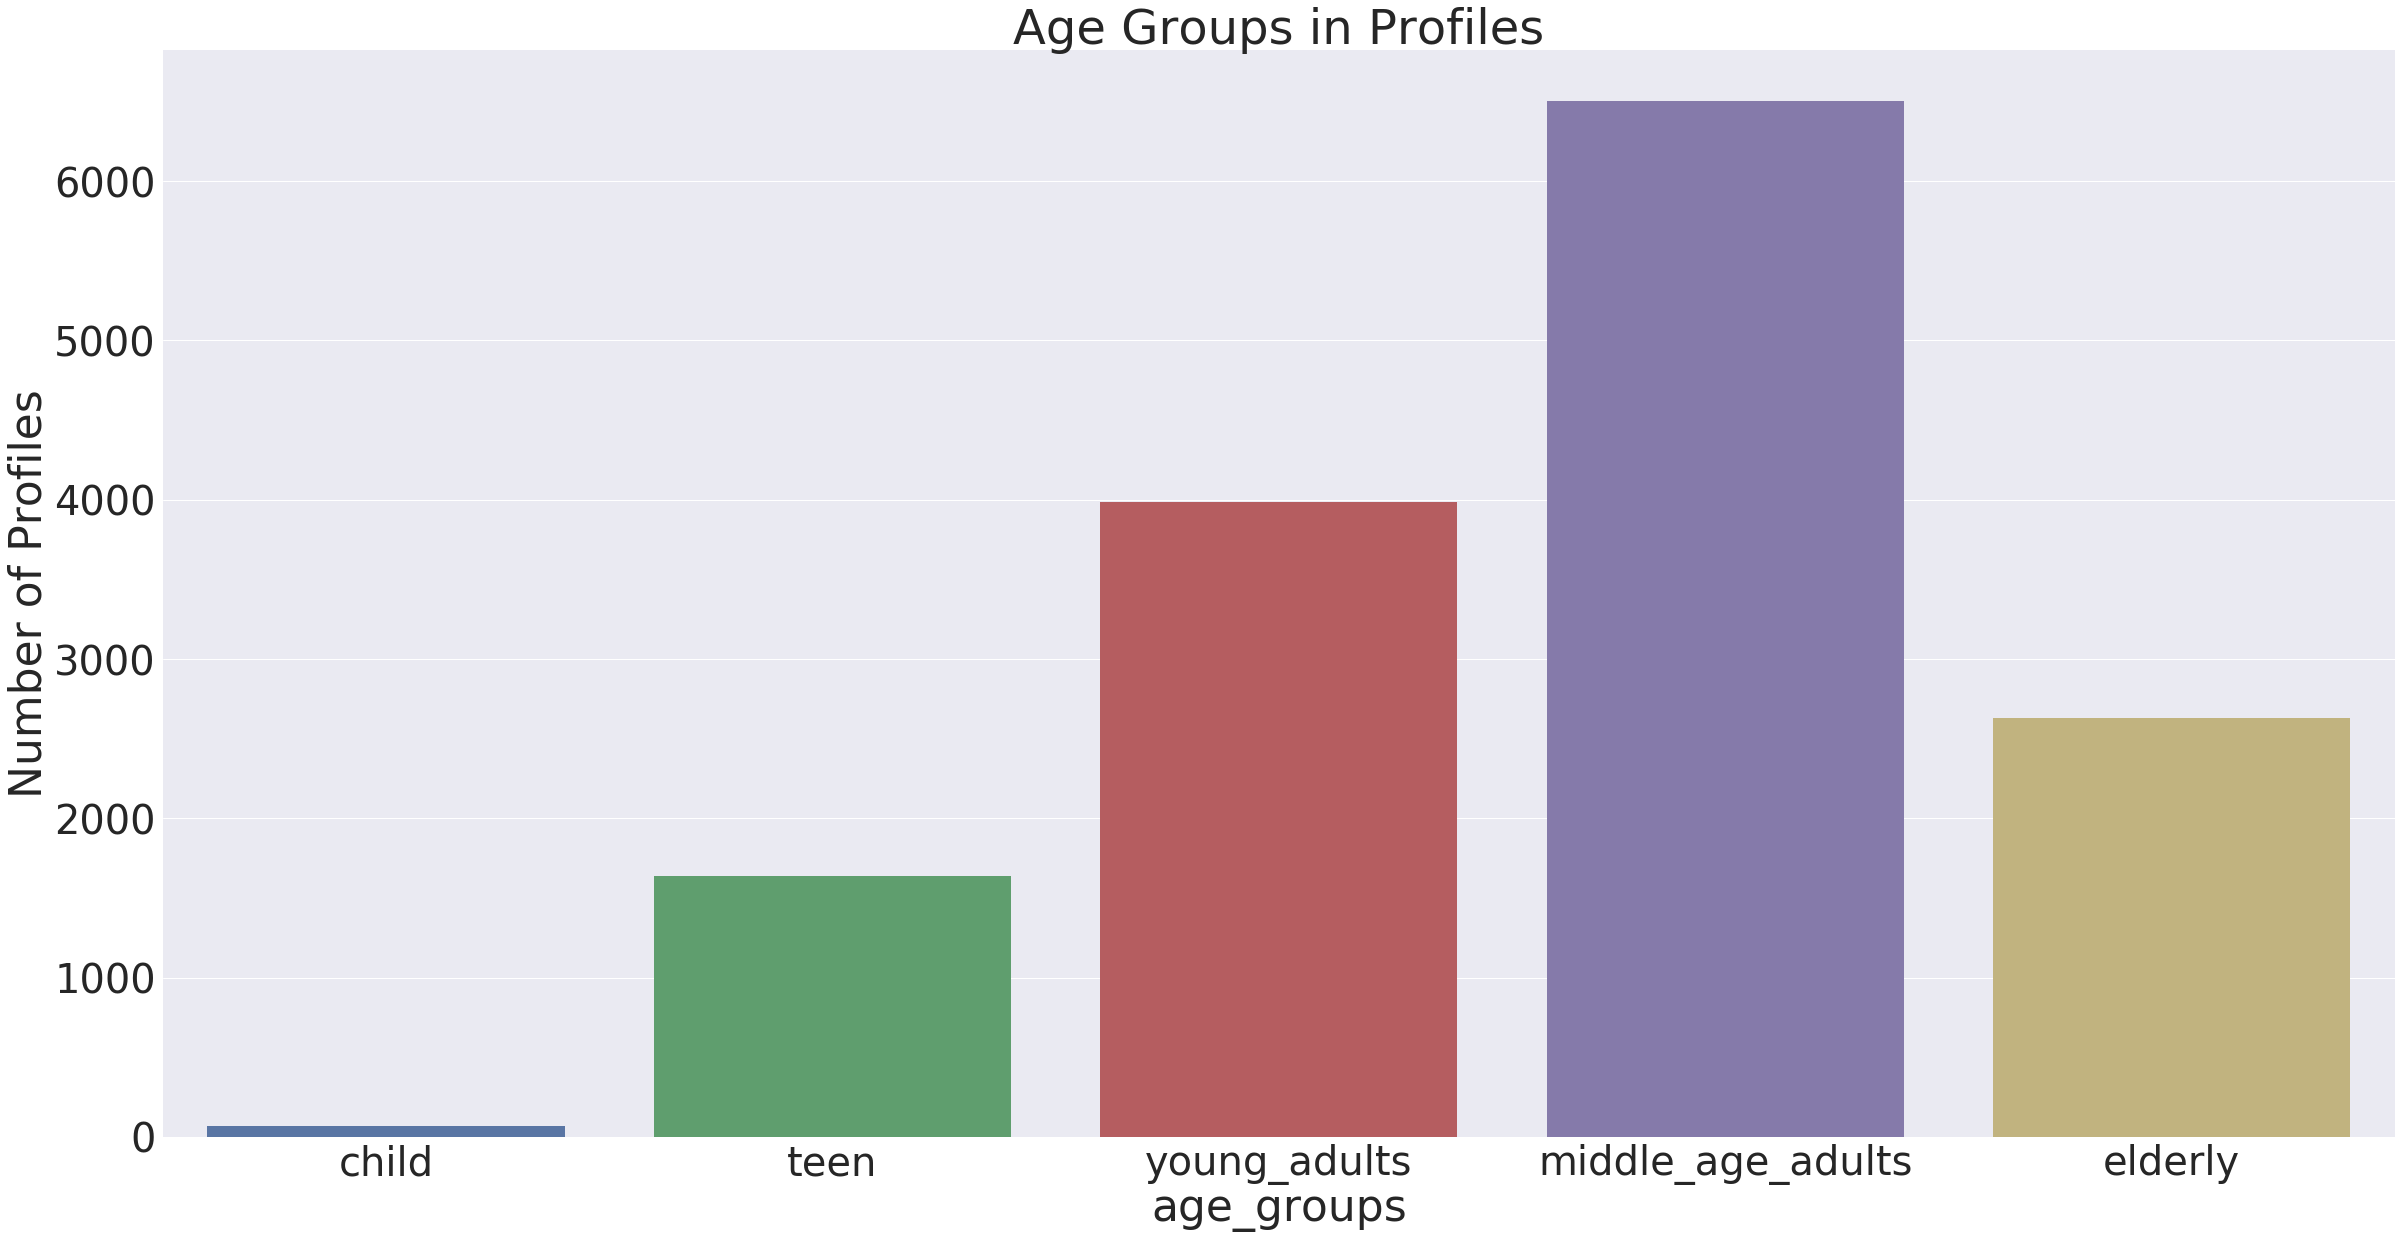

In [304]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(40, 20))
sns.countplot(profile['age_groups'])
plt.title('Age Groups in Profiles')
plt.ylabel('Number of Profiles')
plt.xlabel('age_groups')
plt.xticks(rotation = 0)
plt.show();


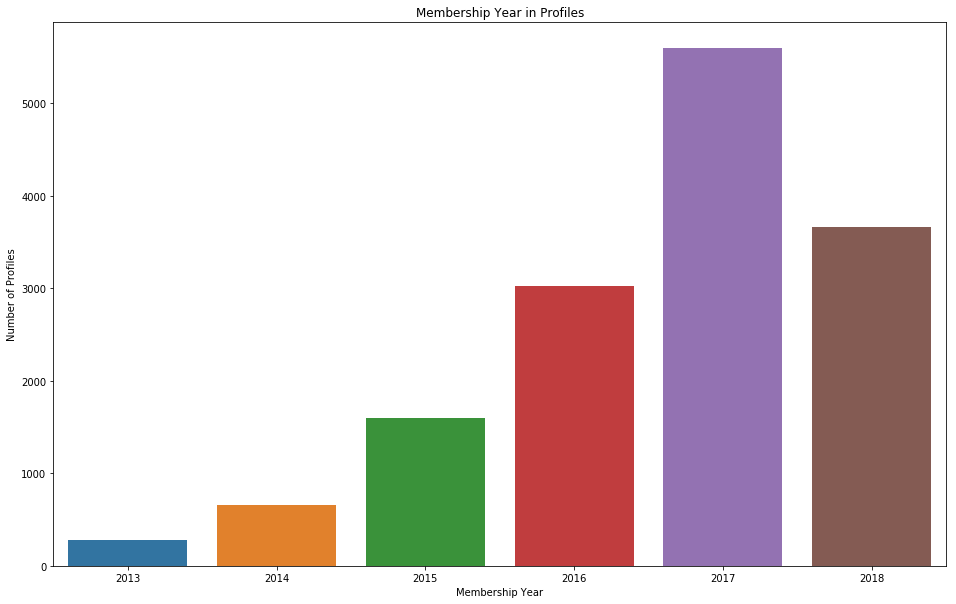

In [34]:
plt.figure(figsize=(16, 10))
sns.countplot(profile['member_launch_year'])
plt.title('Membership Year in Profiles')
plt.ylabel('Number of Profiles')
plt.xlabel('Membership Year')
plt.xticks(rotation = 0)
plt.show();


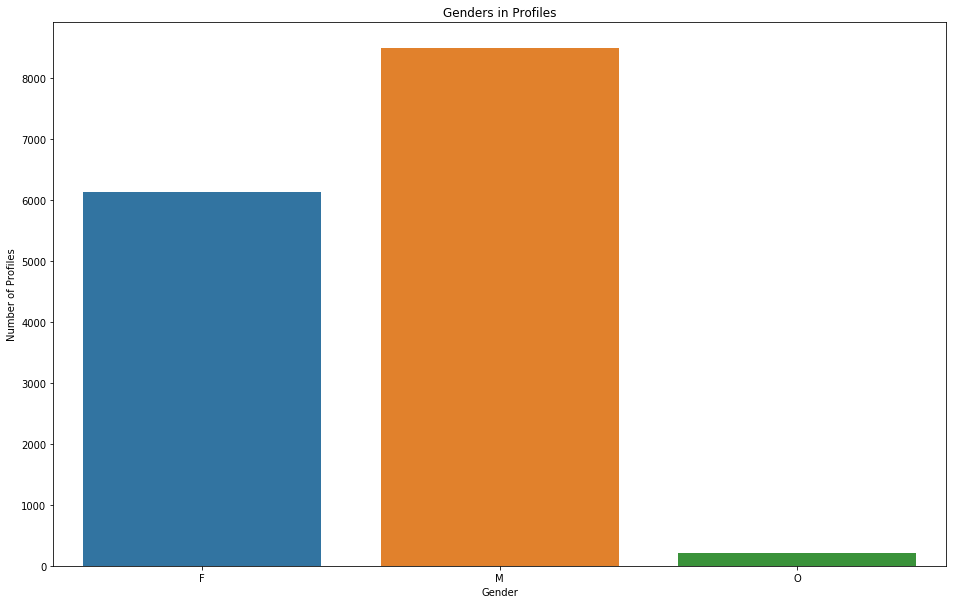

In [35]:
plt.figure(figsize=(16, 10))
sns.countplot(profile['gender'])
plt.title('Genders in Profiles')
plt.ylabel('Number of Profiles')
plt.xlabel('Gender')
plt.xticks(rotation = 0)
plt.show();

# 3.1.2 Transcript Data Visualization

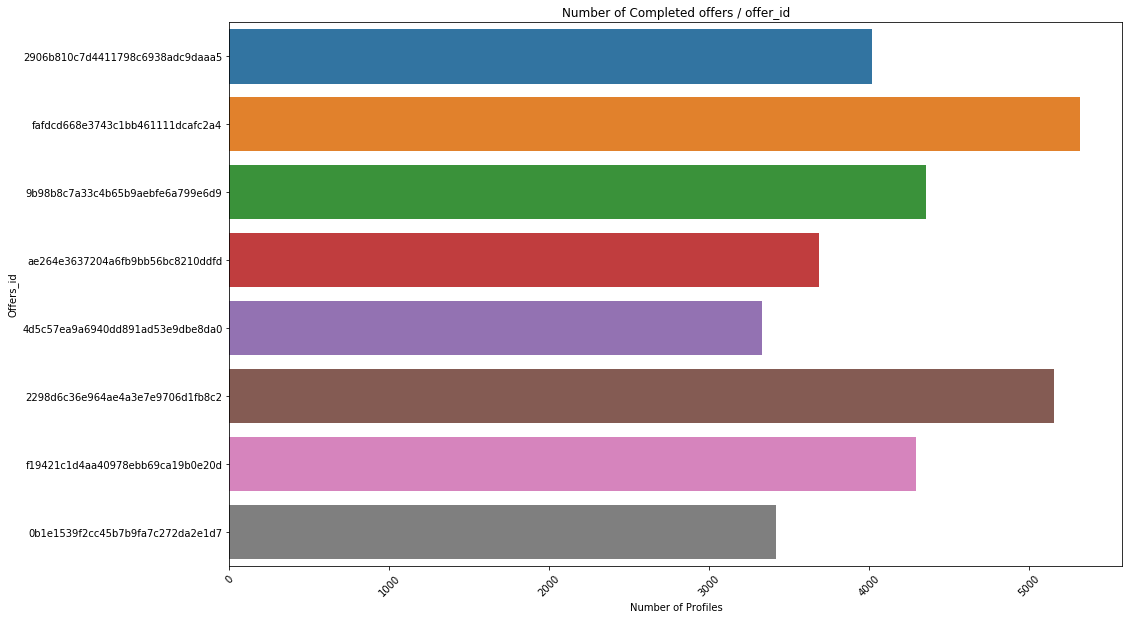

In [36]:
Completed_offers = Updated_transcript[Updated_transcript['event'] == 'offer completed']
plt.figure(figsize=(16, 10))
sns.countplot(y=Completed_offers['offer_id'])
plt.title('Number of Completed offers / offer_id')
plt.ylabel('Offers_id')
plt.xlabel('Number of Profiles')
plt.xticks(rotation = 45)
plt.show();


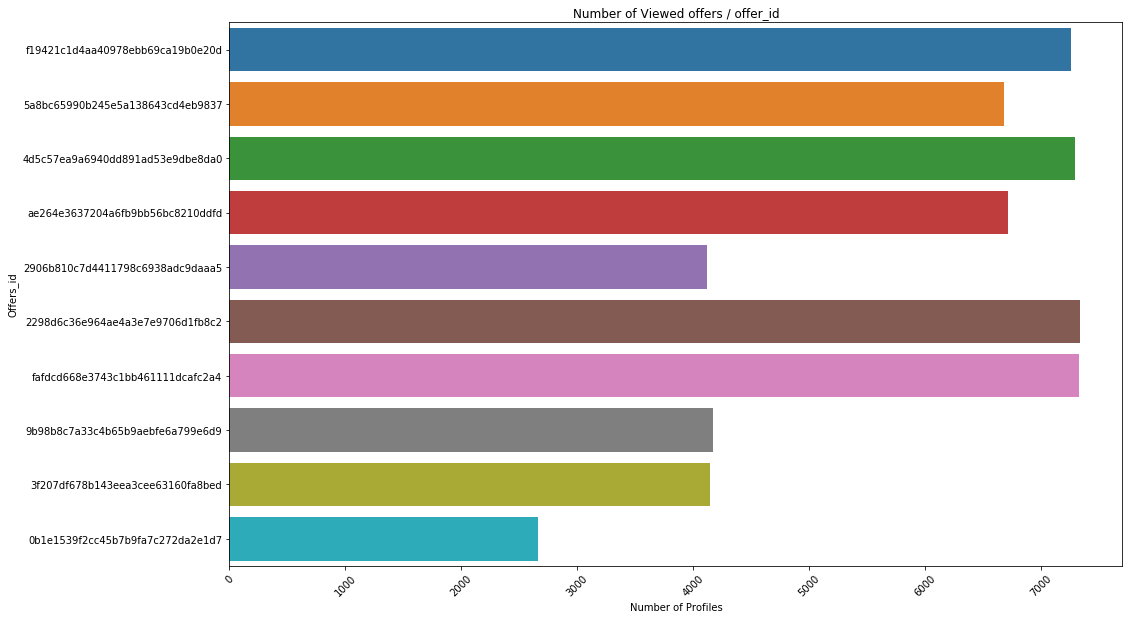

In [37]:
Completed_offers = Updated_transcript[Updated_transcript['event'] == 'offer viewed']
plt.figure(figsize=(16, 10))
sns.countplot(y=Completed_offers['offer_id'])
plt.title('Number of Viewed offers / offer_id')
plt.ylabel('Offers_id')
plt.xlabel('Number of Profiles')
plt.xticks(rotation = 45)
plt.show();

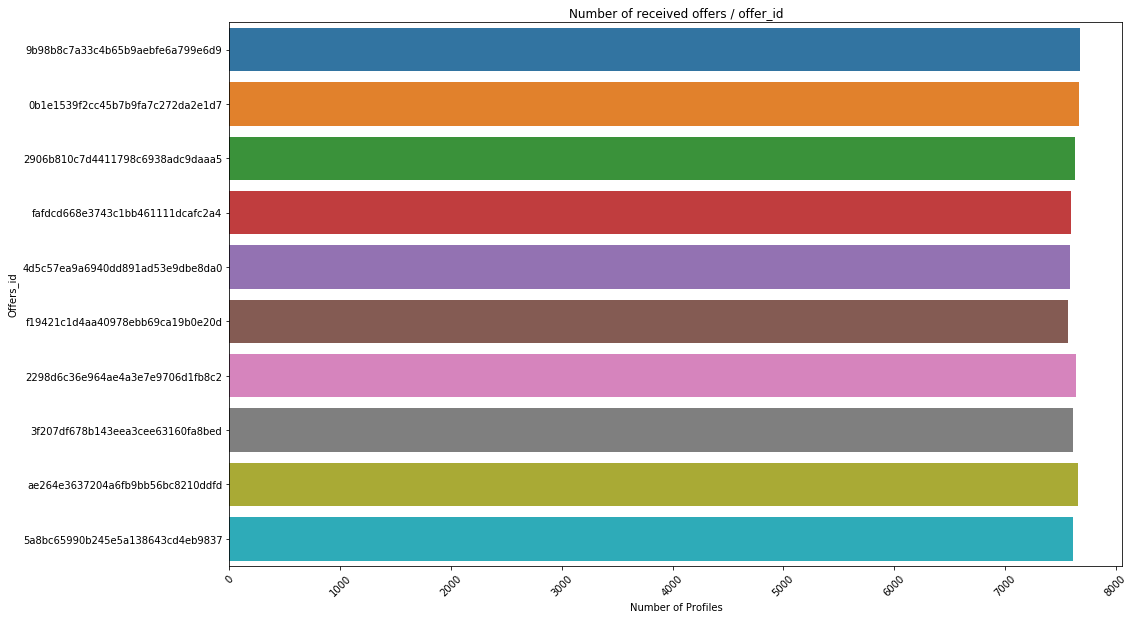

In [38]:
Completed_offers = Updated_transcript[Updated_transcript['event'] == 'offer received']
plt.figure(figsize=(16, 10))
sns.countplot(y=Completed_offers['offer_id'])
plt.title('Number of received offers / offer_id')
plt.ylabel('Offers_id')
plt.xlabel('Number of Profiles')
plt.xticks(rotation = 45)
plt.show();

# 3.1.3 Portfolio Data Visualization

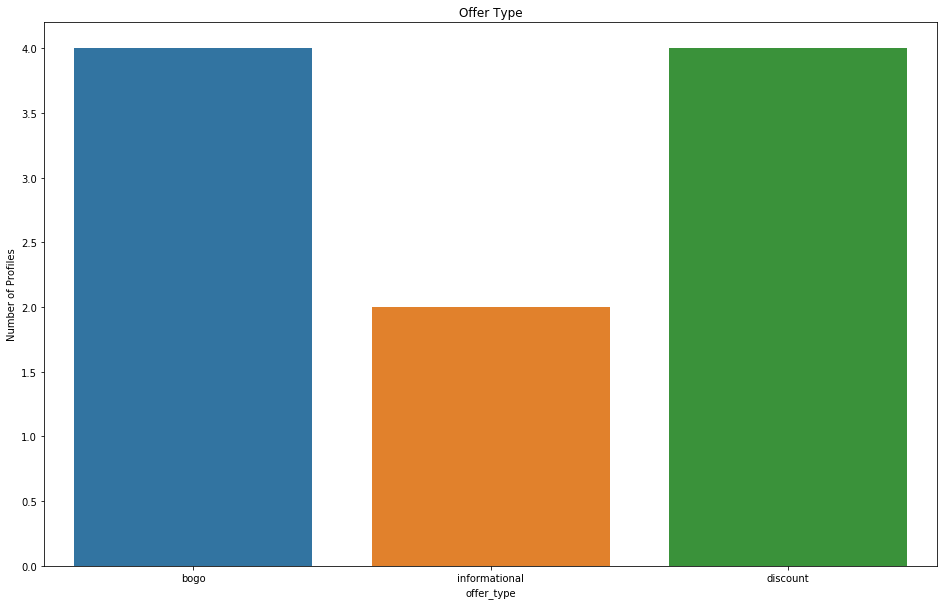

In [39]:
plt.figure(figsize=(16, 10))
sns.countplot(updated_portfolio['offer_type'])
plt.title('Offer Type')
plt.ylabel('Number of Profiles')
plt.xlabel('offer_type')
plt.xticks(rotation = 0)
plt.show();

In [40]:
print(Updated_transcript.customer.unique())
#print('\n',updated_portfolio)

counts_per_customer=Updated_transcript.groupby(['customer']).size().reset_index(name="Count_customer")
print("\nTask:")
display(counts_per_customer)

['78afa995795e4d85b5d9ceeca43f5fef' 'a03223e636434f42ac4c3df47e8bac43'
 'e2127556f4f64592b11af22de27a7932' ... '912b9f623b9e4b4eb99b6dc919f09a93'
 '3045af4e98794a04a5542d3eac939b1f' 'da7a7c0dcfcb41a8acc7864a53cf60fb']

Task:


customer  Count_customer
0      0009655768c64bdeb2e877511632db8f              20
1      00116118485d4dfda04fdbaba9a87b5c               7
2      0011e0d4e6b944f998e987f904e8c1e5              18
3      0020c2b971eb4e9188eac86d93036a77              19
4      0020ccbbb6d84e358d3414a3ff76cffd              23
5      003d66b6608740288d6cc97a6903f4f0              30
6      00426fe3ffde4c6b9cb9ad6d077a13ea              25
7      004b041fbfe44859945daa2c7f79ee64              13
8      004c5799adbf42868b9cff0396190900              26
9      005500a7188546ff8a767329a2f7c76a              13
10     0056df74b63b4298809f0b375a304cf4              15
11     0063def0f9c14bc4805322a488839b32              13
12     0069a50874d846438e58acff5e594725              11
13     00715b6e55c3431cb56ff7307eb19675              29
14     0082fd87c18f45f2be70dbcbb0fb8aad              18
15     00840a2ca5d2408e982d56544dc14ffd              28
16     00857b24b13f4fe0ad17b605f00357f5              12
17     008d7088107b468893889da0ede0df5c              18
18     0091d2b6a5ea4defaa8393e4e816db60              26
19     0092a132ead946ceb30d11a1ed513d20              15
20     0099bf30e4cb4265875266eb3eb25eab              19
21     009d10c2c38a4fd795a7bc6ddbbddb78              17
22     00a794f62b9a48beb58f8f6c02c2f1a6              22
23     00ad4c2cace94f67a6354ec90d6c6f45              18
24     00ae03011f9f49b8a4b3e6d416678b0b              23
25     00aee28bbb3848dd8a31f0c91dc267dd              10
26     00b18b535d6d4f779dea4dc9ac451478              18
27     00b3400e4ff64ee68ce9ada1d0c222f0              20
28     00b3c376db2a4115af3aef34a02f61d6              16
29     00b5fb9d842d437e83033ad9e36f7148               9
...                                 ...             ...
16970  ff95e0a9cdfd4030958762dadcb11e1a              11
16971  ff964fce42a74d519bd1ad2e0e20cd9e              23
16972  ff992fbec53145bbae59a68d025e0458              40
16973  ff9beda564da4bab81633fca744037dc              18
16974  ff9f73ead16a4f9b9e1a53a27280af92              26
16975  ffa81afacde642a3a51a7cd99f8d2cd7              21
16976  ffac285a64714aca8efd8d61a5606e84               8
16977  ffaecba5bbb14cffb04c2490d18eee7e              22
16978  ffb62bee02c14583b9763f8613bcace7              18
16979  ffb7fc8ad0594248a49e210ff0217c2d              21
16980  ffc60f10c2444740bc2049712bbffe17              13
16981  ffc6c9fbe34b4578911dcdf6745b4c74               5
16982  ffc77312ccda49fca19506f1cdf44923              16
16983  ffc8a38e0972421785b00f80c92c8085              12
16984  ffd53e5ba61d41378b66efc00d9f9682              24
16985  ffd810f301ad42d6bfe98c4ba6ee4125               6
16986  ffda4545e7084ff6aaf01304fb1c1fa6              12
16987  ffdefcac307f4ca99ac1ebd51470f106              20
16988  ffe5257abf8840b395e1ee6b29894637              14
16989  ffeaa02452ef451082a0361c3ca62ef5              25
16990  ffecb1f8543f4bf7bade023de366d6bf              13
16991  ffed75d3abc64b488982f50ed12878b5               4
16992  ffede3b700ac41d6a266fa1ba74b4f16              18
16993  fff0f0aac6c547b9b263080f09a5586a              12
16994  fff29fb549084123bd046dbc5ceb4faa              28
16995  fff3ba4757bd42088c044ca26d73817a              23
16996  fff7576017104bcc8677a8d63322b5e1              18
16997  fff8957ea8b240a6b5e634b6ee8eafcf              10
16998  fffad4f4828548d1b5583907f2e9906b              23
16999  ffff82501cea40309d5fdd7edcca4a07              33

[17000 rows x 2 columns]

# 3.1.4 Combining the Portfolio,Profile and Transcripts after Cleaning and Preparation

In [41]:
#Combining the Updated transcript and Profile data sets 
Combined_data = pd.merge(Updated_transcript, profile, on=['customer'],how='inner')

In [43]:
Combined_data

event                          customer  time  \
0        offer received  78afa995795e4d85b5d9ceeca43f5fef     0   
1          offer viewed  78afa995795e4d85b5d9ceeca43f5fef     6   
2           transaction  78afa995795e4d85b5d9ceeca43f5fef   132   
3       offer completed  78afa995795e4d85b5d9ceeca43f5fef   132   
4           transaction  78afa995795e4d85b5d9ceeca43f5fef   144   
5        offer received  78afa995795e4d85b5d9ceeca43f5fef   168   
6          offer viewed  78afa995795e4d85b5d9ceeca43f5fef   216   
7           transaction  78afa995795e4d85b5d9ceeca43f5fef   222   
8           transaction  78afa995795e4d85b5d9ceeca43f5fef   240   
9           transaction  78afa995795e4d85b5d9ceeca43f5fef   378   
10       offer received  78afa995795e4d85b5d9ceeca43f5fef   408   
11         offer viewed  78afa995795e4d85b5d9ceeca43f5fef   408   
12       offer received  78afa995795e4d85b5d9ceeca43f5fef   504   
13          transaction  78afa995795e4d85b5d9ceeca43f5fef   510   
14      offer completed  78afa995795e4d85b5d9ceeca43f5fef   510   
15      offer completed  78afa995795e4d85b5d9ceeca43f5fef   510   
16          transaction  78afa995795e4d85b5d9ceeca43f5fef   534   
17         offer viewed  78afa995795e4d85b5d9ceeca43f5fef   582   
18       offer received  e2127556f4f64592b11af22de27a7932     0   
19         offer viewed  e2127556f4f64592b11af22de27a7932    18   
20          transaction  e2127556f4f64592b11af22de27a7932   288   
21          transaction  e2127556f4f64592b11af22de27a7932   294   
22       offer received  e2127556f4f64592b11af22de27a7932   336   
23       offer received  e2127556f4f64592b11af22de27a7932   408   
24         offer viewed  e2127556f4f64592b11af22de27a7932   420   
25       offer received  e2127556f4f64592b11af22de27a7932   504   
26         offer viewed  e2127556f4f64592b11af22de27a7932   522   
27          transaction  e2127556f4f64592b11af22de27a7932   522   
28      offer completed  e2127556f4f64592b11af22de27a7932   522   
29      offer completed  e2127556f4f64592b11af22de27a7932   522   
...                 ...                               ...   ...   
272732     offer viewed  fc966e9c3edc4578a1fb4c6a8c2659c2   516   
272733      transaction  fc966e9c3edc4578a1fb4c6a8c2659c2   528   
272734  offer completed  fc966e9c3edc4578a1fb4c6a8c2659c2   528   
272735   offer received  fc966e9c3edc4578a1fb4c6a8c2659c2   576   
272736     offer viewed  fc966e9c3edc4578a1fb4c6a8c2659c2   594   
272737      transaction  fc966e9c3edc4578a1fb4c6a8c2659c2   654   
272738  offer completed  fc966e9c3edc4578a1fb4c6a8c2659c2   654   
272739      transaction  fc966e9c3edc4578a1fb4c6a8c2659c2   696   
272740   offer received  47683732768a4f7db7abb710ca22e66e   504   
272741     offer viewed  47683732768a4f7db7abb710ca22e66e   540   
272742   offer received  47683732768a4f7db7abb710ca22e66e   576   
272743     offer viewed  47683732768a4f7db7abb710ca22e66e   630   
272744      transaction  47683732768a4f7db7abb710ca22e66e   684   
272745   offer received  3873fe915496482eb589fa316ae7b0db   504   
272746     offer viewed  3873fe915496482eb589fa316ae7b0db   510   
272747      transaction  3873fe915496482eb589fa316ae7b0db   510   
272748   offer received  3873fe915496482eb589fa316ae7b0db   576   
272749     offer viewed  3873fe915496482eb589fa316ae7b0db   582   
272750      transaction  3873fe915496482eb589fa316ae7b0db   588   
272751      transaction  3873fe915496482eb589fa316ae7b0db   612   
272752   offer received  8578196a074a4f328976e334fa9383a3   504   
272753     offer viewed  8578196a074a4f328976e334fa9383a3   504   
272754   offer received  8578196a074a4f328976e334fa9383a3   576   
272755      transaction  8578196a074a4f328976e334fa9383a3   702   
272756   offer received  9fcbff4f8d7241faa4ab8a9d19c8a812   504   
272757     offer viewed  9fcbff4f8d7241faa4ab8a9d19c8a812   504   
272758   offer received  9fcbff4f8d7241faa4ab8a9d19c8a812   576   
272759     offer viewed  9fcbff4f8d7241faa4ab8a9d19c8a812   576  

In [44]:
#Combining the Combined_data and updated_portfolio data sets  to get the iverall combined data from three data sets
Combined_all_data= pd.merge(Combined_data,updated_portfolio, on=['offer_id'],how='left')

In [45]:
Combined_all_data

event                          customer  time  \
0        offer received  78afa995795e4d85b5d9ceeca43f5fef     0   
1          offer viewed  78afa995795e4d85b5d9ceeca43f5fef     6   
2           transaction  78afa995795e4d85b5d9ceeca43f5fef   132   
3       offer completed  78afa995795e4d85b5d9ceeca43f5fef   132   
4           transaction  78afa995795e4d85b5d9ceeca43f5fef   144   
5        offer received  78afa995795e4d85b5d9ceeca43f5fef   168   
6          offer viewed  78afa995795e4d85b5d9ceeca43f5fef   216   
7           transaction  78afa995795e4d85b5d9ceeca43f5fef   222   
8           transaction  78afa995795e4d85b5d9ceeca43f5fef   240   
9           transaction  78afa995795e4d85b5d9ceeca43f5fef   378   
10       offer received  78afa995795e4d85b5d9ceeca43f5fef   408   
11         offer viewed  78afa995795e4d85b5d9ceeca43f5fef   408   
12       offer received  78afa995795e4d85b5d9ceeca43f5fef   504   
13          transaction  78afa995795e4d85b5d9ceeca43f5fef   510   
14      offer completed  78afa995795e4d85b5d9ceeca43f5fef   510   
15      offer completed  78afa995795e4d85b5d9ceeca43f5fef   510   
16          transaction  78afa995795e4d85b5d9ceeca43f5fef   534   
17         offer viewed  78afa995795e4d85b5d9ceeca43f5fef   582   
18       offer received  e2127556f4f64592b11af22de27a7932     0   
19         offer viewed  e2127556f4f64592b11af22de27a7932    18   
20          transaction  e2127556f4f64592b11af22de27a7932   288   
21          transaction  e2127556f4f64592b11af22de27a7932   294   
22       offer received  e2127556f4f64592b11af22de27a7932   336   
23       offer received  e2127556f4f64592b11af22de27a7932   408   
24         offer viewed  e2127556f4f64592b11af22de27a7932   420   
25       offer received  e2127556f4f64592b11af22de27a7932   504   
26         offer viewed  e2127556f4f64592b11af22de27a7932   522   
27          transaction  e2127556f4f64592b11af22de27a7932   522   
28      offer completed  e2127556f4f64592b11af22de27a7932   522   
29      offer completed  e2127556f4f64592b11af22de27a7932   522   
...                 ...                               ...   ...   
272732     offer viewed  fc966e9c3edc4578a1fb4c6a8c2659c2   516   
272733      transaction  fc966e9c3edc4578a1fb4c6a8c2659c2   528   
272734  offer completed  fc966e9c3edc4578a1fb4c6a8c2659c2   528   
272735   offer received  fc966e9c3edc4578a1fb4c6a8c2659c2   576   
272736     offer viewed  fc966e9c3edc4578a1fb4c6a8c2659c2   594   
272737      transaction  fc966e9c3edc4578a1fb4c6a8c2659c2   654   
272738  offer completed  fc966e9c3edc4578a1fb4c6a8c2659c2   654   
272739      transaction  fc966e9c3edc4578a1fb4c6a8c2659c2   696   
272740   offer received  47683732768a4f7db7abb710ca22e66e   504   
272741     offer viewed  47683732768a4f7db7abb710ca22e66e   540   
272742   offer received  47683732768a4f7db7abb710ca22e66e   576   
272743     offer viewed  47683732768a4f7db7abb710ca22e66e   630   
272744      transaction  47683732768a4f7db7abb710ca22e66e   684   
272745   offer received  3873fe915496482eb589fa316ae7b0db   504   
272746     offer viewed  3873fe915496482eb589fa316ae7b0db   510   
272747      transaction  3873fe915496482eb589fa316ae7b0db   510   
272748   offer received  3873fe915496482eb589fa316ae7b0db   576   
272749     offer viewed  3873fe915496482eb589fa316ae7b0db   582   
272750      transaction  3873fe915496482eb589fa316ae7b0db   588   
272751      transaction  3873fe915496482eb589fa316ae7b0db   612   
272752   offer received  8578196a074a4f328976e334fa9383a3   504   
272753     offer viewed  8578196a074a4f328976e334fa9383a3   504   
272754   offer received  8578196a074a4f328976e334fa9383a3   576   
272755      transaction  8578196a074a4f328976e334fa9383a3   702   
272756   offer received  9fcbff4f8d7241faa4ab8a9d19c8a812   504   
272757     offer viewed  9fcbff4f8d7241faa4ab8a9d19c8a812   504   
272758   offer received  9fcbff4f8d7241faa4ab8a9d19c8a812   576   
272759     offer viewed  9fcbff4f8d7241faa4ab8a9d19c8a812   576  

In [46]:
Combined_all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272762 entries, 0 to 272761
Data columns (total 20 columns):
event                     272762 non-null object
customer                  272762 non-null object
time                      272762 non-null int64
offer_id                  272762 non-null object
amount                    272762 non-null object
age                       272762 non-null int64
became_member_on          272762 non-null datetime64[ns]
gender                    272762 non-null object
income                    272762 non-null float64
age_groups                272762 non-null category
member_launch_Cum_days    272762 non-null int64
member_launch_year        272762 non-null int64
difficulty                148805 non-null float64
duration                  148805 non-null float64
offer_type                148805 non-null object
reward                    148805 non-null float64
web                       148805 non-null float64
email                     148805 non-null flo

In [47]:
#Converting the the amount column type from object to float
Combined_all_data['amount'] = Combined_all_data.amount.astype(float)

In [48]:
#Filling the NAN values with zeros , those  rows for transaction event 
Combined_all_data=Combined_all_data.replace(np.nan,0)

In [49]:
Combined_all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272762 entries, 0 to 272761
Data columns (total 20 columns):
event                     272762 non-null object
customer                  272762 non-null object
time                      272762 non-null int64
offer_id                  272762 non-null object
amount                    272762 non-null float64
age                       272762 non-null int64
became_member_on          272762 non-null datetime64[ns]
gender                    272762 non-null object
income                    272762 non-null float64
age_groups                272762 non-null object
member_launch_Cum_days    272762 non-null int64
member_launch_year        272762 non-null int64
difficulty                272762 non-null float64
duration                  272762 non-null float64
offer_type                272762 non-null object
reward                    272762 non-null float64
web                       272762 non-null float64
email                     272762 non-null floa

In [307]:
Combined_all_data.describe()

time         amount            age         income  \
count  272762.000000  272762.000000  272762.000000  272762.000000   
mean      366.707694       6.360646      53.840696   64337.000755   
std       200.359087      22.509207      17.551337   21243.762941   
min         0.000000       0.000000      18.000000   30000.000000   
25%       186.000000       0.000000      41.000000   48000.000000   
50%       408.000000       0.000000      55.000000   62000.000000   
75%       528.000000       9.140000      66.000000   78000.000000   
max       714.000000    1062.280000     101.000000  120000.000000   

       member_launch_Cum_days  member_launch_year     difficulty  \
count           272762.000000       272762.000000  272762.000000   
mean             16702.708050         2016.457435       4.304687   
std                428.810204            1.218663       5.413062   
min              15461.000000         2013.000000       0.000000   
25%              16422.000000         2016.000000       0.000000   
50%              16813.000000         2017.000000       0.000000   
75%              17042.000000         2017.000000      10.000000   
max              17284.000000         2018.000000      20.000000   

            duration         reward            web          email  \
count  272762.000000  272762.000000  272762.000000  272762.000000   
mean       86.744986       2.423571       0.440120       0.545549   
std        87.737877       3.331264       0.496402       0.497922   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%        72.000000       0.000000       0.000000       1.000000   
75%       168.000000       5.000000       1.000000       1.000000   
max       240.000000      10.000000       1.000000       1.000000   

              mobile         social  
count  272762.000000  272762.000000  
mean        0.500356       0.359141  
std         0.500001       0.479749  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         1.000000       0.000000  
75%         1.000000       1.000000  
max         1.000000       1.000000

# 3.1.4.1 Data Visualization and analysis for the Combined data

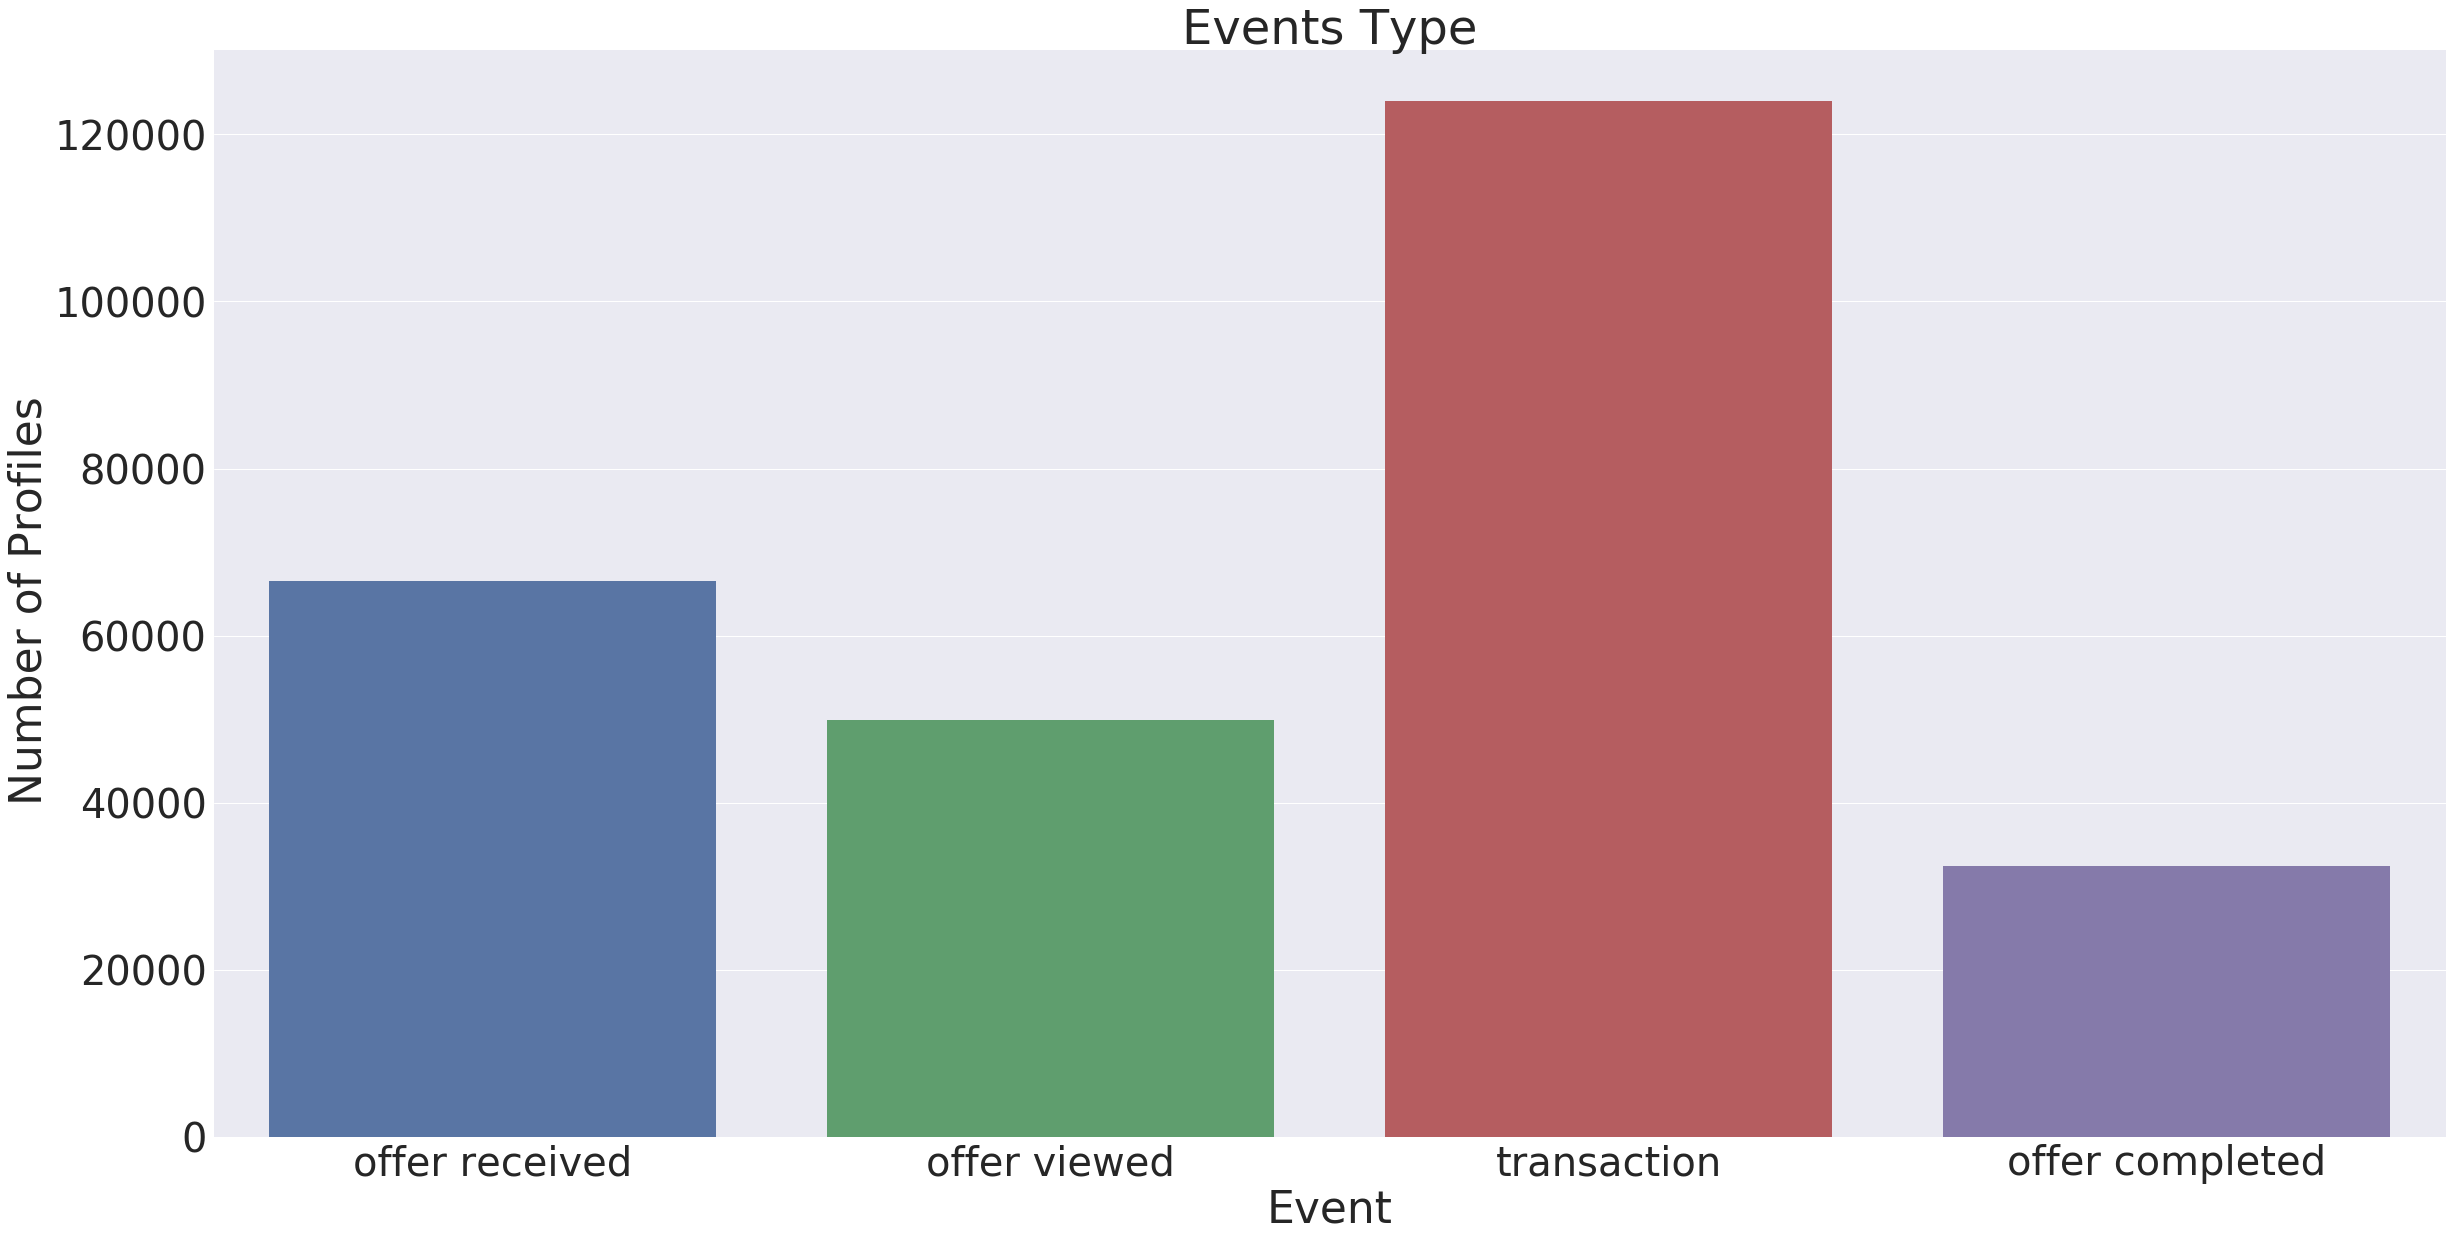

In [309]:
plt.figure(figsize=(40, 20))
sns.countplot(Combined_all_data['event'])
plt.title('Events Type')
plt.ylabel('Number of Profiles ')
plt.xlabel('Event')
plt.xticks(rotation = 0)
plt.show();

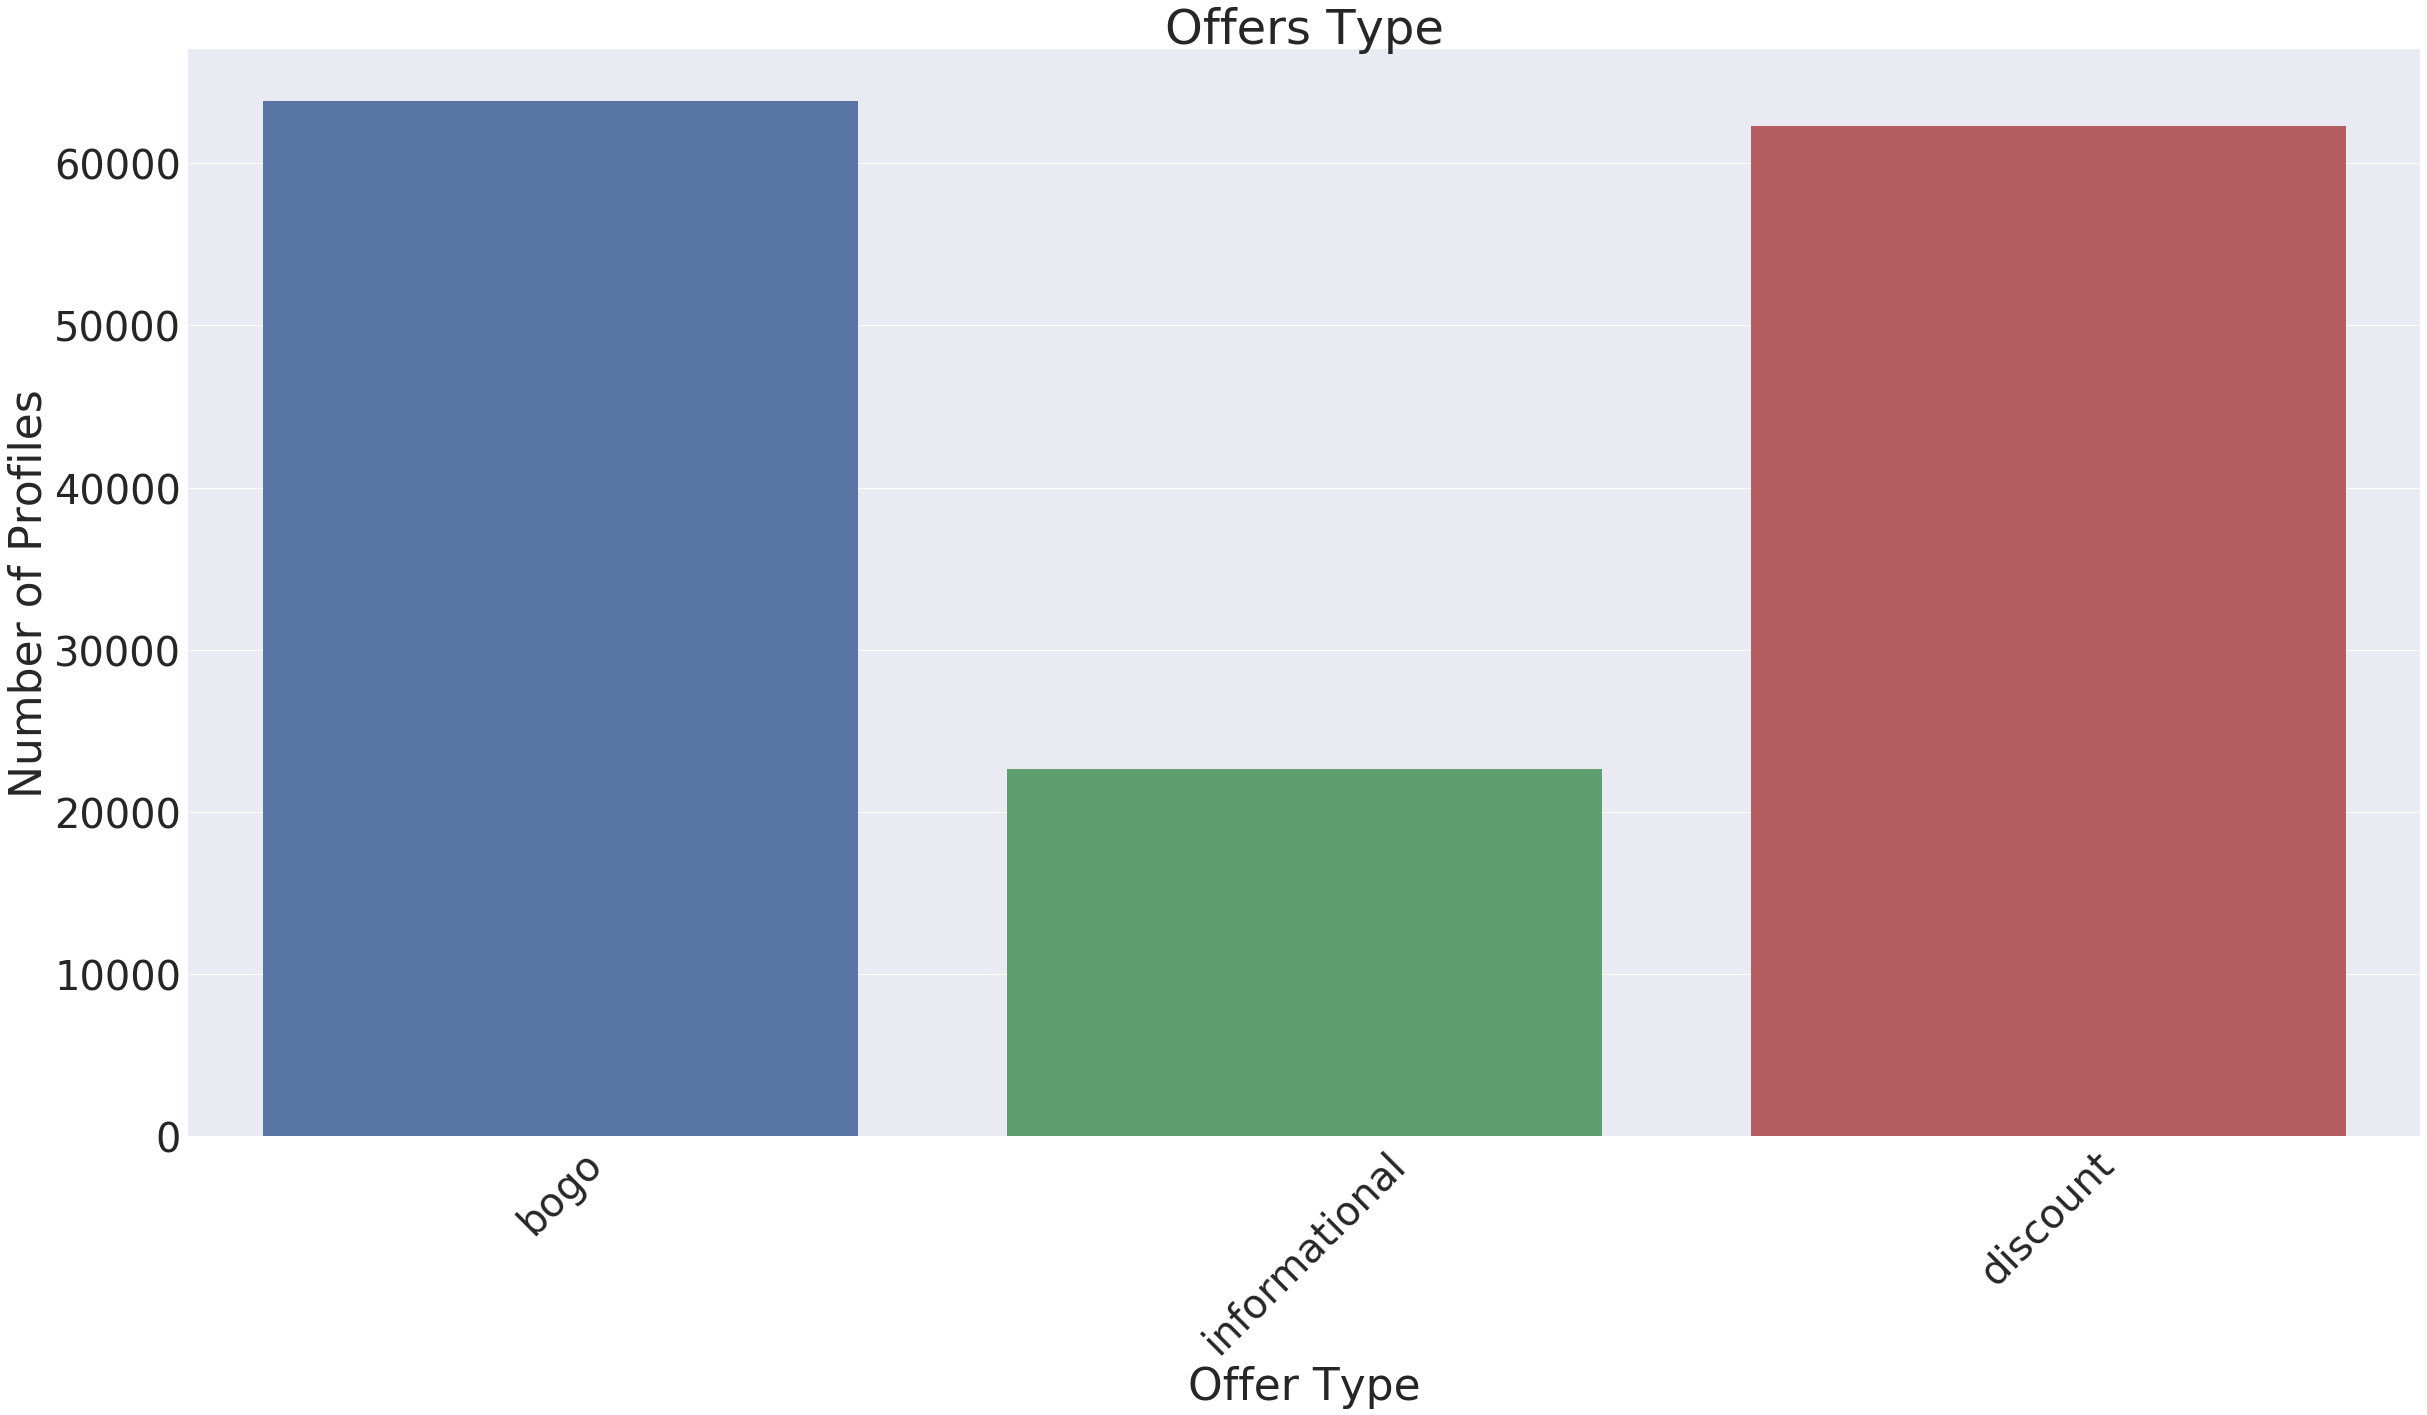

In [311]:
plt.figure(figsize=(40, 20))
sns.countplot(Combined_all_data[Combined_all_data['offer_type'] != 0]['offer_type'])
plt.title('Offers Type')
plt.ylabel('Number of Profiles')
plt.xlabel('Offer Type')
plt.xticks(rotation = 45)
plt.show();

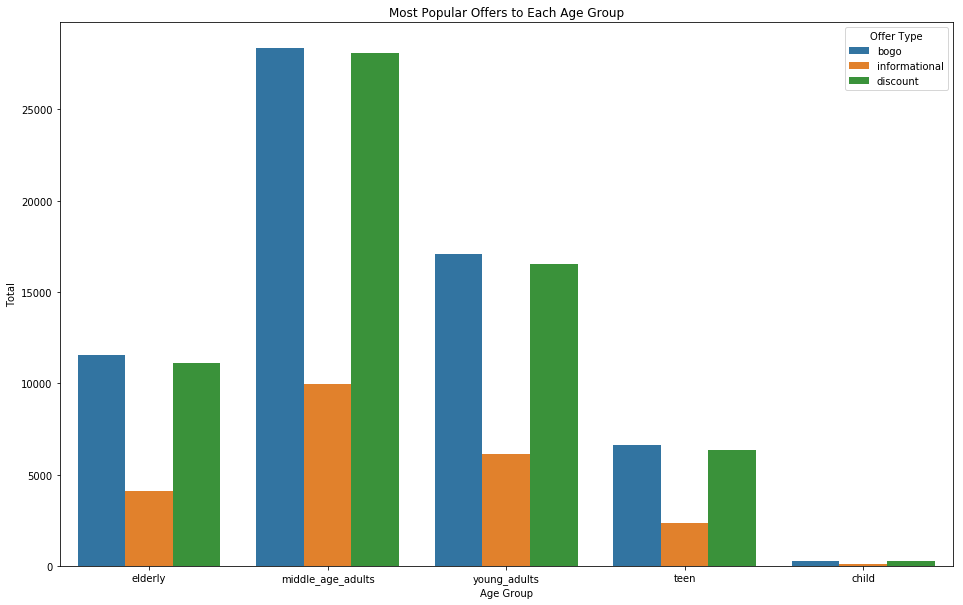

In [52]:
plt.figure(figsize=(16, 10))
y=Combined_all_data[Combined_all_data['offer_type'] != 0]['offer_type']
X=Combined_all_data[Combined_all_data['offer_type'] != 0]['age_groups']
sns.countplot(x=X, hue=y, data=Combined_all_data)
plt.title('Most Popular Offers to Each Age Group')
plt.ylabel('Total')
plt.xlabel('Age Group')
plt.xticks(rotation = 0)
plt.legend(title='Offer Type')
plt.show();

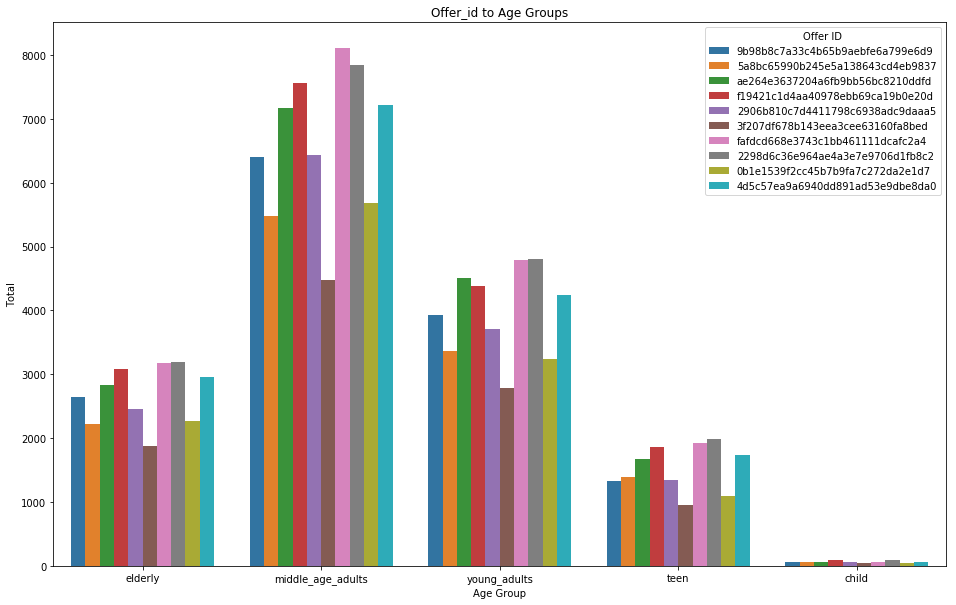

In [53]:
plt.figure(figsize=(16, 10))
y=Combined_all_data[Combined_all_data['offer_id'] != '0']['offer_id']
X=Combined_all_data[Combined_all_data['offer_id'] != '0']['age_groups']
sns.countplot(x=X, hue=y, data=Combined_all_data)
plt.title('Offer_id to Age Groups')
plt.ylabel('Total')
plt.xlabel('Age Group')
plt.xticks(rotation = 0)
plt.legend(title='Offer ID')
plt.show();

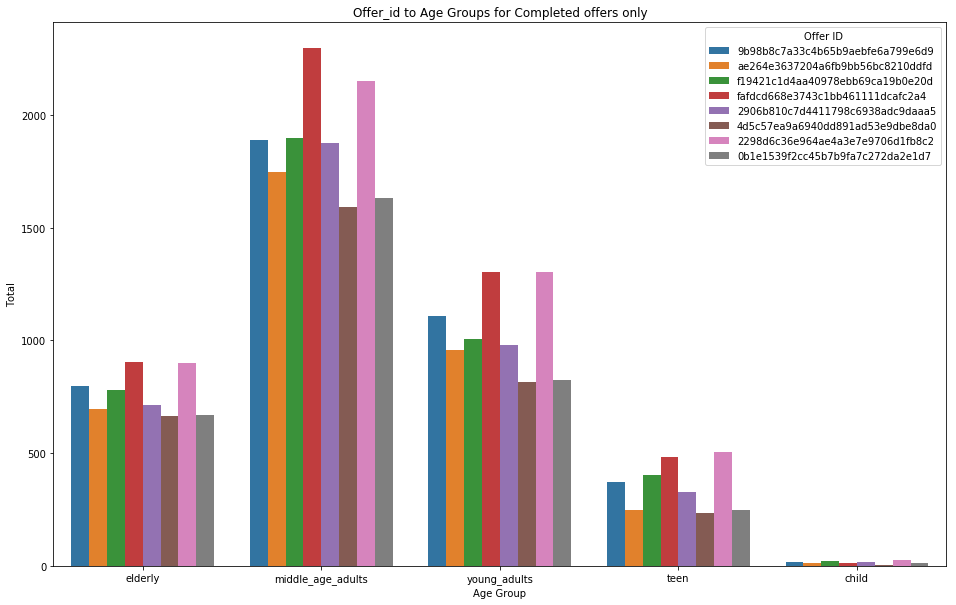

In [54]:
plt.figure(figsize=(16, 10))
y=Combined_all_data[(Combined_all_data['offer_id'] != '0' )&( Combined_all_data['event'] == 'offer completed') ]['offer_id']
X=Combined_all_data[(Combined_all_data['offer_id'] != '0') & (Combined_all_data['event'] == 'offer completed')]['age_groups']
sns.countplot(x=X, hue=y, data=Combined_all_data)
plt.title('Offer_id to Age Groups for Completed offers only')
plt.ylabel('Total')
plt.xlabel('Age Group')
plt.xticks(rotation = 0)
plt.legend(title='Offer ID')
plt.show();

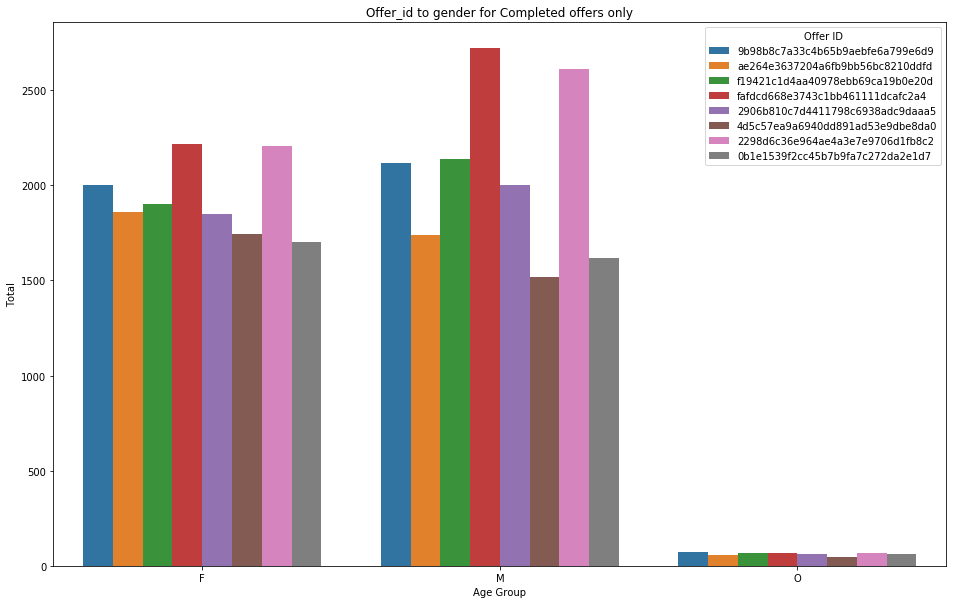

In [55]:
plt.figure(figsize=(16, 10))
y=Combined_all_data[(Combined_all_data['offer_id'] != '0' )&( Combined_all_data['event'] == 'offer completed') ]['offer_id']
X=Combined_all_data[(Combined_all_data['offer_id'] != '0') & (Combined_all_data['event'] == 'offer completed')]['gender']
sns.countplot(x=X, hue=y, data=Combined_all_data)
plt.title('Offer_id to gender for Completed offers only')
plt.ylabel('Total')
plt.xlabel('Age Group')
plt.xticks(rotation = 0)
plt.legend(title='Offer ID')
plt.show();

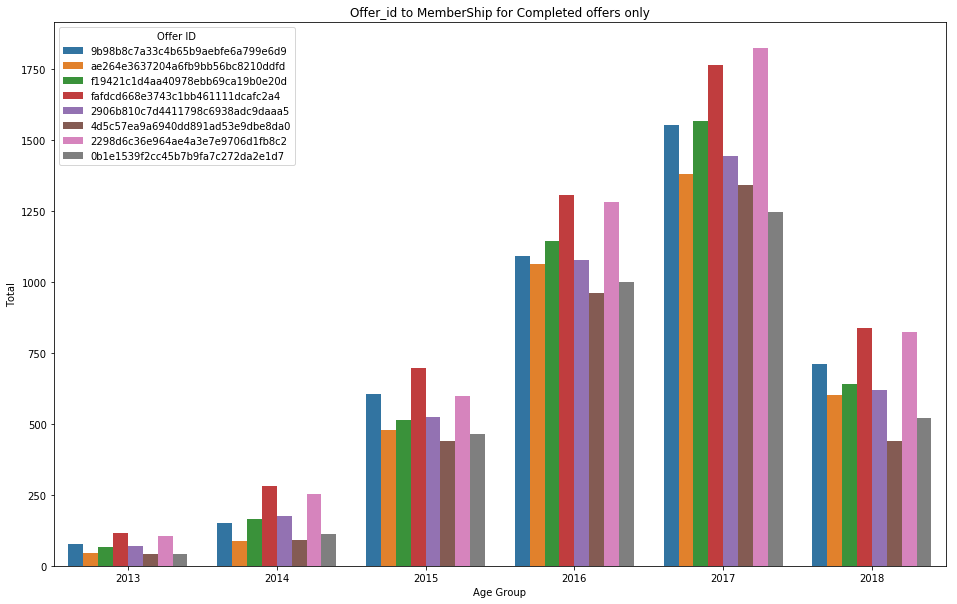

In [56]:
plt.figure(figsize=(16, 10))
y=Combined_all_data[(Combined_all_data['offer_id'] != '0' )&( Combined_all_data['event'] == 'offer completed') ]['offer_id']
X=Combined_all_data[(Combined_all_data['offer_id'] != '0') & (Combined_all_data['event'] == 'offer completed')]['member_launch_year']
sns.countplot(x=X, hue=y, data=Combined_all_data)
plt.title('Offer_id to MemberShip for Completed offers only')
plt.ylabel('Total')
plt.xlabel('Age Group')
plt.xticks(rotation = 0)
plt.legend(title='Offer ID')
plt.show();

In [72]:
selected_data

event                          customer  time  \
3       offer completed  78afa995795e4d85b5d9ceeca43f5fef   132   
14      offer completed  78afa995795e4d85b5d9ceeca43f5fef   510   
15      offer completed  78afa995795e4d85b5d9ceeca43f5fef   510   
28      offer completed  e2127556f4f64592b11af22de27a7932   522   
29      offer completed  e2127556f4f64592b11af22de27a7932   522   
33      offer completed  389bc3fa690240e798340f5a15918d5c    60   
41      offer completed  389bc3fa690240e798340f5a15918d5c   498   
42      offer completed  389bc3fa690240e798340f5a15918d5c   498   
48      offer completed  389bc3fa690240e798340f5a15918d5c   600   
49      offer completed  389bc3fa690240e798340f5a15918d5c   600   
58      offer completed  2eeac8d8feae4a8cad5a6af0499a211d   456   
65      offer completed  aa4862eba776480b8bb9c68455b8c2e1   210   
70      offer completed  aa4862eba776480b8bb9c68455b8c2e1   426   
78      offer completed  aa4862eba776480b8bb9c68455b8c2e1   630   
84      offer completed  31dda685af34476cad5bc968bdb01c53   258   
90      offer completed  31dda685af34476cad5bc968bdb01c53   384   
94      offer completed  31dda685af34476cad5bc968bdb01c53   426   
98      offer completed  31dda685af34476cad5bc968bdb01c53   534   
107     offer completed  4b0da7e80e5945209a1fdddfe813dbe0   180   
115     offer completed  4b0da7e80e5945209a1fdddfe813dbe0   480   
119     offer completed  4b0da7e80e5945209a1fdddfe813dbe0   510   
135     offer completed  c27e0d6ab72c455a8bb66d980963de60   414   
145     offer completed  d53717f5400c4e84affdaeda9dd926b3    30   
157     offer completed  d53717f5400c4e84affdaeda9dd926b3   624   
162     offer completed  f806632c011441378d4646567f357a21   126   
166     offer completed  f806632c011441378d4646567f357a21   210   
171     offer completed  f806632c011441378d4646567f357a21   462   
181     offer completed  d058f73bf8674a26a95227db098147b1   192   
182     offer completed  d058f73bf8674a26a95227db098147b1   192   
188     offer completed  d058f73bf8674a26a95227db098147b1   414   
...                 ...                               ...   ...   
272535  offer completed  a14c2517450542f4b55c2c13901e21ca   606   
272541  offer completed  a3798355c8a2408d8c329b7f342a5fb7   558   
272556  offer completed  af5215439a5c4c6f9a0955b609de4851   498   
272561  offer completed  af5215439a5c4c6f9a0955b609de4851   606   
272562  offer completed  af5215439a5c4c6f9a0955b609de4851   606   
272585  offer completed  5bde1a82680d41aba0eb33627e188eaf   576   
272586  offer completed  5bde1a82680d41aba0eb33627e188eaf   576   
272594  offer completed  4a240ee8ef664c6eb589494f8f25379e   438   
272599  offer completed  4a240ee8ef664c6eb589494f8f25379e   570   
272608  offer completed  9e11b206b5784951ba5b0ff06fd505cd   552   
272609  offer completed  9e11b206b5784951ba5b0ff06fd505cd   552   
272618  offer completed  976931110347490ba94ef6e8db5bd5f4   546   
272622  offer completed  976931110347490ba94ef6e8db5bd5f4   606   
272629  offer completed  04698a1182a24807ad4c36f12b67c5ef   540   
272633  offer completed  04698a1182a24807ad4c36f12b67c5ef   612   
272638  offer completed  612b51c917404bd4a62d46e5b2fedfca   438   
272649  offer completed  1044403864ed41af9cc17577c185abc4   486   
272652  offer completed  1044403864ed41af9cc17577c185abc4   510   
272663  offer completed  e5a0dd72474142fa9b1f0196935dc669   516   
272664  offer completed  e5a0dd72474142fa9b1f0196935dc669   516   
272669  offer completed  e5a0dd72474142fa9b1f0196935dc669   588   
272677  offer completed  cc7322218ad24de3aedc3123ec1c9e79   600   
272678  offer completed  cc7322218ad24de3aedc3123ec1c9e79   600   
272688  offer completed  7103a340ed8244e1bee58a9639b7678b   600   
272697  offer completed  e61a1530bbd2415597b8a326dc466962   576   
272704  offer completed  9250d51a392f4f2691eabff6851dcf66   540   
272718  offer completed  3a298dbf99ef4a23b9b46a1500e56101   510   
272725  offer completed  3a298dbf99ef4a23b9b46a1500e56101   588  

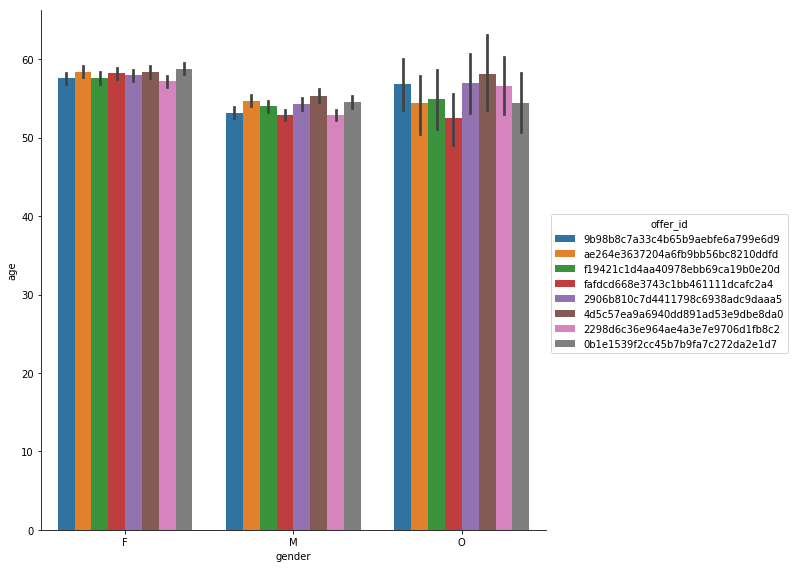

In [77]:
#box, violin, strip
selected_data=Combined_all_data[(Combined_all_data['offer_id'] != '0') &( Combined_all_data['event'] == 'offer completed')]

HUE=selected_data['offer_id']
Y=selected_data['age']
X=selected_data['gender']

#HUE=Combined_all_data[(Combined_all_data['offer_id'] != '0')&( Combined_all_data['event'] == 'offer completed')]['offer_id']
#Y=Combined_all_data[(Combined_all_data['offer_id'] != '0' )&( Combined_all_data['event'] == 'offer completed') ]['age']
#X=Combined_all_data[(Combined_all_data['offer_id'] != '0') & (Combined_all_data['event'] == 'offer completed')]['gender']
sns.factorplot(x='gender', y='age' , data=selected_data, hue='offer_id',size=8,kind='bar', aspect=1)

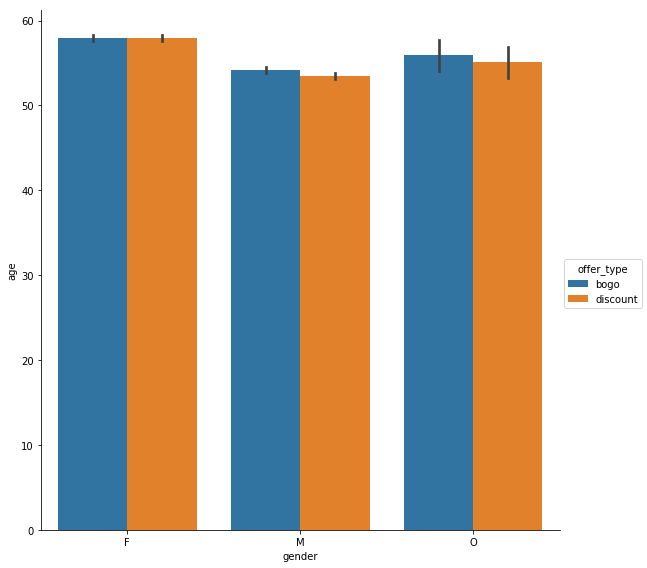

In [78]:
#box, violin, strip
selected_data=Combined_all_data[(Combined_all_data['offer_id'] != '0') &( Combined_all_data['event'] == 'offer completed')]



#HUE=Combined_all_data[(Combined_all_data['offer_id'] != '0')&( Combined_all_data['event'] == 'offer completed')]['offer_id']
#Y=Combined_all_data[(Combined_all_data['offer_id'] != '0' )&( Combined_all_data['event'] == 'offer completed') ]['age']
#X=Combined_all_data[(Combined_all_data['offer_id'] != '0') & (Combined_all_data['event'] == 'offer completed')]['gender']
sns.factorplot(x='gender', y='age' , data=selected_data, hue='offer_type',size=8,kind='bar', aspect=1)

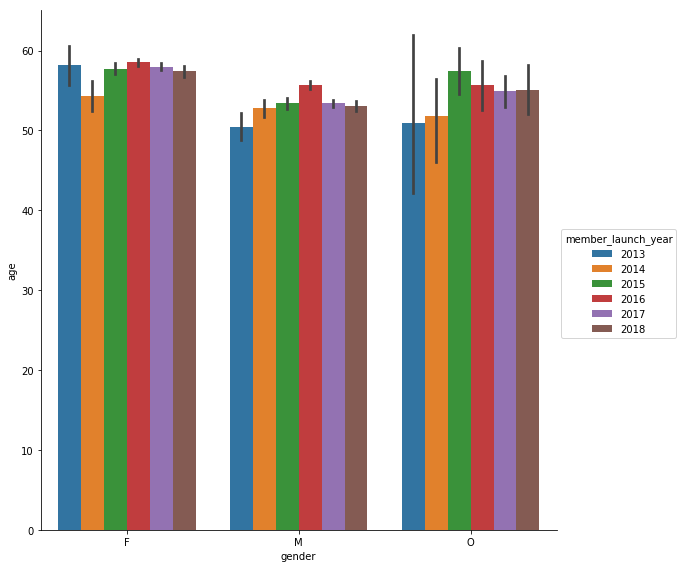

In [80]:
#box, violin, strip
selected_data=Combined_all_data[(Combined_all_data['offer_id'] != '0') &( Combined_all_data['event'] == 'offer completed')]



#HUE=Combined_all_data[(Combined_all_data['offer_id'] != '0')&( Combined_all_data['event'] == 'offer completed')]['offer_id']
#Y=Combined_all_data[(Combined_all_data['offer_id'] != '0' )&( Combined_all_data['event'] == 'offer completed') ]['age']
#X=Combined_all_data[(Combined_all_data['offer_id'] != '0') & (Combined_all_data['event'] == 'offer completed')]['gender']
sns.factorplot(x='gender', y='age' , data=selected_data, hue='member_launch_year',size=8,kind='bar', aspect=1)

# 3.2 Data statistics:

# 3.2.1 Statistics for event type VS Genders

In [81]:
data_gender_offertype = Combined_all_data[Combined_all_data['gender']!= 'NA'].groupby(['gender','offer_type']).count()
data_gender_event = Combined_all_data[(Combined_all_data['gender']!= 'NA')].groupby(['gender','event']).count()

In [82]:

df2_gender_offertype_F = data_gender_offertype.loc[('F')]['event'].sum()
df2_gender_offertype_M = data_gender_offertype.loc[('M')]['event'].sum()
df2_gender_offertype_event_F = data_gender_offertype.loc[('F')].loc[['bogo', 'discount', 'informational']]['event'].sum()
df2_gender_offertype_event_M = data_gender_offertype.loc[('M')].loc[['bogo', 'discount', 'informational']]['event'].sum()
print('For Females:')
print(f"Number of offer received: {data_gender_event.loc[('F', 'offer received')].values[0]}, {round((data_gender_event.loc[('F', 'offer received')].values[0]/df2_gender_offertype_event_F)*100,1)}% of total offers.")
print(f"Number of offer viewed: {data_gender_event.loc[('F', 'offer viewed')].values[0]}, {round((data_gender_event.loc[('F', 'offer viewed')].values[0]/df2_gender_offertype_event_F)*100,1)}% of total offers.") 
print(f"Number of offer completed: {data_gender_event.loc[('F', 'offer completed')].values[0]} , {round((data_gender_event.loc[('F', 'offer completed')].values[0]/data_gender_event.loc[('F', 'offer received')].values[0])*100,1)}% of received offers.")
print('\nFor Males:')
print(f"Number of offer received: {data_gender_event.loc[('M', 'offer received')].values[0]}, {round((data_gender_event.loc[('M', 'offer received')].values[0]/df2_gender_offertype_event_M)*100,1)}% of total offers.")
print(f"Number of offer viewed: {data_gender_event.loc[('M', 'offer viewed')].values[0]}, {round((data_gender_event.loc[('M', 'offer viewed')].values[0]/df2_gender_offertype_event_M)*100,1)}% of total offers.") 
print(f"Number of offer completed: {data_gender_event.loc[('M', 'offer completed')].values[0]}, {round((data_gender_event.loc[('M', 'offer completed')].values[0]/data_gender_event.loc[('M', 'offer received')].values[0])*100,1)}% of received offers.")


For Females:
Number of offer received: 27456, 43.1% of total offers.
Number of offer viewed: 20786, 32.6% of total offers.
Number of offer completed: 15477 , 56.4% of received offers.

For Males:
Number of offer received: 38129, 46.0% of total offers.
Number of offer viewed: 28301, 34.1% of total offers.
Number of offer completed: 16466, 43.2% of received offers.


# 3.2.2 Top Customers according to Completed offers and amount Spent within offer period:

In [83]:
Completed_offer=Combined_all_data[(Combined_all_data['event'] == 'offer completed')]
TOP_Customers = Combined_all_data[(Combined_all_data['event'] == 'offer completed') | (Combined_all_data['event'] == 'transaction')].groupby(['customer', 'event'])['amount'].sum().reset_index()
TOP_Customers = TOP_Customers.sort_values('amount', ascending=False).head(10)
count = 1


print('                    TOP-10 Customers              ')
for i, item in TOP_Customers.iterrows():
    print(f'[ #{count} ]')
    print(f'Person: {item["customer"]} ')
    print(f'Number of Completed Offers:       {Completed_offer[(Completed_offer["customer"] == item["customer"]) & (Completed_offer["event"] == "offer completed")].shape[0]}       offers')
    print(f'Amount:                         ${round(item["amount"],0)}        ')
    
    count += 1

                    TOP-10 Customers              
[ #1 ]
Person: 3c8d541112a74af99e88abbd0692f00e 
Number of Completed Offers:       5       offers
Amount:                         $1609.0        
[ #2 ]
Person: f1d65ae63f174b8f80fa063adcaa63b7 
Number of Completed Offers:       6       offers
Amount:                         $1366.0        
[ #3 ]
Person: ae6f43089b674728a50b8727252d3305 
Number of Completed Offers:       3       offers
Amount:                         $1328.0        
[ #4 ]
Person: 626df8678e2a4953b9098246418c9cfa 
Number of Completed Offers:       4       offers
Amount:                         $1321.0        
[ #5 ]
Person: 73afdeca19e349b98f09e928644610f8 
Number of Completed Offers:       5       offers
Amount:                         $1320.0        
[ #6 ]
Person: 52959f19113e4241a8cb3bef486c6412 
Number of Completed Offers:       5       offers
Amount:                         $1293.0        
[ #7 ]
Person: ad1f0a409ae642bc9a43f31f56c130fc 
Number of Completed Offe

# 3.2.3 The Consumed time to Complete offer VS Genders:

In [85]:

time_to_acieve_offer = Combined_all_data[(Combined_all_data['offer_id']!= "0" )& (Combined_all_data['event']== "offer completed")].groupby(['gender', 'offer_id'])['time'].mean().reset_index()


In [86]:
print("The Maximum value to Complete offer for Females:",round(time_to_acieve_offer[time_to_acieve_offer['gender'] == 'F']['time'].values[0],1)," Hours"," and the Value by days is :", round(time_to_acieve_offer[time_to_acieve_offer['gender'] == 'F']['time'].values[0] / 24,1), 'days')
print("The Maximum value to Complete offer for Males:",round(time_to_acieve_offer[time_to_acieve_offer['gender'] == 'M']['time'].values[0],1)," Hours"," and the Value by days is :", round(time_to_acieve_offer[time_to_acieve_offer['gender'] == 'M']['time'].values[0] / 24 ,1), 'days')

The Maximum value to Complete offer for Females: 428.0  Hours  and the Value by days is : 17.8 days
The Maximum value to Complete offer for Males: 434.0  Hours  and the Value by days is : 18.1 days


# 3.2.4 Offer IDs VS events:

In [87]:
data_offerid_offertype = Combined_all_data[Combined_all_data['offer_id']!= '0'].groupby(['offer_id','offer_type']).count()
data_offerid_event = Combined_all_data[(Combined_all_data['offer_id']!= '0')].groupby(['offer_id','event']).count()

In [88]:
df2_offerid_completed = data_offerid_event.loc[('0b1e1539f2cc45b7b9fa7c272da2e1d7')].loc[['offer completed']]['customer'].sum()
df2_offerid = data_offerid_event.loc[('0b1e1539f2cc45b7b9fa7c272da2e1d7')]['customer'].sum()
df2_offerid_viewed = data_offerid_event.loc[('0b1e1539f2cc45b7b9fa7c272da2e1d7')].loc[['offer viewed']]['customer'].sum()
df2_offerid_received = data_offerid_event.loc[('0b1e1539f2cc45b7b9fa7c272da2e1d7')].loc[['offer received']]['customer'].sum()
print("\n","offer ID:0b1e1539f2cc45b7b9fa7c272da2e1d7  Total number of offers:", df2_offerid )
print("\n","offer ID:0b1e1539f2cc45b7b9fa7c272da2e1d7  Total number of Completed offers:", df2_offerid_completed ," and Perecentage is: ",((df2_offerid_completed/df2_offerid)*100 ),"%")
print("\n","offer ID:0b1e1539f2cc45b7b9fa7c272da2e1d7  Total number of Viewed offers:", df2_offerid_viewed ," and Perecentage is: ",((df2_offerid_viewed/df2_offerid)*100 ),"%")
print("\n","offer ID:0b1e1539f2cc45b7b9fa7c272da2e1d7  Total number of received offers:", df2_offerid_received ," and Perecentage is: ",((df2_offerid_received/df2_offerid)*100 ),"%")




 offer ID:0b1e1539f2cc45b7b9fa7c272da2e1d7  Total number of offers: 12327

 offer ID:0b1e1539f2cc45b7b9fa7c272da2e1d7  Total number of Completed offers: 3386  and Perecentage is:  27.468159325058817 %

 offer ID:0b1e1539f2cc45b7b9fa7c272da2e1d7  Total number of Viewed offers: 2215  and Perecentage is:  17.96868662286039 %

 offer ID:0b1e1539f2cc45b7b9fa7c272da2e1d7  Total number of received offers: 6726  and Perecentage is:  54.5631540520808 %


In [312]:
df2_offerid_completed = data_offerid_event.loc[('2298d6c36e964ae4a3e7e9706d1fb8c2')].loc[['offer completed']]['customer'].sum()
df2_offerid = data_offerid_event.loc[('2298d6c36e964ae4a3e7e9706d1fb8c2')]['customer'].sum()
df2_offerid_viewed = data_offerid_event.loc[('2298d6c36e964ae4a3e7e9706d1fb8c2')].loc[['offer viewed']]['customer'].sum()
df2_offerid_received = data_offerid_event.loc[('2298d6c36e964ae4a3e7e9706d1fb8c2')].loc[['offer received']]['customer'].sum()
print("\n","offer ID:2298d6c36e964ae4a3e7e9706d1fb8c2  Total number of offers:", df2_offerid )
print("\n","offer ID:2298d6c36e964ae4a3e7e9706d1fb8c2  Total number of Completed offers:", df2_offerid_completed ," and Perecentage is: ",((df2_offerid_completed/df2_offerid)*100 ),"%")
print("\n","offer ID:2298d6c36e964ae4a3e7e9706d1fb8c2  Total number of Viewed offers:", df2_offerid_viewed ," and Perecentage is: ",((df2_offerid_viewed/df2_offerid)*100 ),"%")
print("\n","offer ID:2298d6c36e964ae4a3e7e9706d1fb8c2  Total number of received offers:", df2_offerid_received ," and Perecentage is: ",((df2_offerid_received/df2_offerid)*100 ),"%")



 offer ID:2298d6c36e964ae4a3e7e9706d1fb8c2  Total number of offers: 17920

 offer ID:2298d6c36e964ae4a3e7e9706d1fb8c2  Total number of Completed offers: 4886  and Perecentage is:  27.265625 %

 offer ID:2298d6c36e964ae4a3e7e9706d1fb8c2  Total number of Viewed offers: 6379  and Perecentage is:  35.597098214285715 %

 offer ID:2298d6c36e964ae4a3e7e9706d1fb8c2  Total number of received offers: 6655  and Perecentage is:  37.137276785714285 %


In [313]:
df2_offerid_completed = data_offerid_event.loc[('2906b810c7d4411798c6938adc9daaa5')].loc[['offer completed']]['customer'].sum()
df2_offerid = data_offerid_event.loc[('2906b810c7d4411798c6938adc9daaa5')]['customer'].sum()
df2_offerid_viewed = data_offerid_event.loc[('2906b810c7d4411798c6938adc9daaa5')].loc[['offer viewed']]['customer'].sum()
df2_offerid_received = data_offerid_event.loc[('2906b810c7d4411798c6938adc9daaa5')].loc[['offer received']]['customer'].sum()
print("\n","offer ID:2906b810c7d4411798c6938adc9daaa5  Total number of offers:", df2_offerid )
print("\n","offer ID:2906b810c7d4411798c6938adc9daaa5  Total number of Completed offers:", df2_offerid_completed ," and Perecentage is: ",((df2_offerid_completed/df2_offerid)*100 ),"%")
print("\n","offer ID:2906b810c7d4411798c6938adc9daaa5  Total number of Viewed offers:", df2_offerid_viewed ," and Perecentage is: ",((df2_offerid_viewed/df2_offerid)*100 ),"%")
print("\n","offer ID:2906b810c7d4411798c6938adc9daaa5  Total number of received offers:", df2_offerid_received ," and Perecentage is: ",((df2_offerid_received/df2_offerid)*100 ),"%")



 offer ID:2906b810c7d4411798c6938adc9daaa5  Total number of offers: 14002

 offer ID:2906b810c7d4411798c6938adc9daaa5  Total number of Completed offers: 3911  and Perecentage is:  27.93172403942294 %

 offer ID:2906b810c7d4411798c6938adc9daaa5  Total number of Viewed offers: 3460  and Perecentage is:  24.710755606341948 %

 offer ID:2906b810c7d4411798c6938adc9daaa5  Total number of received offers: 6631  and Perecentage is:  47.35752035423511 %


In [314]:
#df2_offerid_completed = data_offerid_event.loc[('3f207df678b143eea3cee63160fa8bed')].loc[['offer completed']]['person'].sum()
df2_offerid = data_offerid_event.loc[('3f207df678b143eea3cee63160fa8bed')]['customer'].sum()
df2_offerid_viewed = data_offerid_event.loc[('3f207df678b143eea3cee63160fa8bed')].loc[['offer viewed']]['customer'].sum()
df2_offerid_received = data_offerid_event.loc[('3f207df678b143eea3cee63160fa8bed')].loc[['offer received']]['customer'].sum()
print("\n","offer ID:3f207df678b143eea3cee63160fa8bed  Total number of offers:", df2_offerid )
#print("\n","offer ID:0b1e1539f2cc45b7b9fa7c272da2e1d7  Total number of Completed offers:", df2_offerid_completed ," and Perecentage is: ",((df2_offerid_completed/df2_offerid)*100 ),"%")
print("\n","offer ID:3f207df678b143eea3cee63160fa8bed  Total number of Viewed offers:", df2_offerid_viewed ," and Perecentage is: ",((df2_offerid_viewed/df2_offerid)*100 ),"%")
print("\n","offer ID:3f207df678b143eea3cee63160fa8bed  Total number of received offers:", df2_offerid_received ," and Perecentage is: ",((df2_offerid_received/df2_offerid)*100 ),"%")



 offer ID:3f207df678b143eea3cee63160fa8bed  Total number of offers: 10144

 offer ID:3f207df678b143eea3cee63160fa8bed  Total number of Viewed offers: 3487  and Perecentage is:  34.375 %

 offer ID:3f207df678b143eea3cee63160fa8bed  Total number of received offers: 6657  and Perecentage is:  65.625 %


In [315]:
df2_offerid_completed = data_offerid_event.loc[('4d5c57ea9a6940dd891ad53e9dbe8da0')].loc[['offer completed']]['customer'].sum()
df2_offerid = data_offerid_event.loc[('4d5c57ea9a6940dd891ad53e9dbe8da0')]['customer'].sum()
df2_offerid_viewed = data_offerid_event.loc[('4d5c57ea9a6940dd891ad53e9dbe8da0')].loc[['offer viewed']]['customer'].sum()
df2_offerid_received = data_offerid_event.loc[('4d5c57ea9a6940dd891ad53e9dbe8da0')].loc[['offer received']]['customer'].sum()
print("\n","offer ID:4d5c57ea9a6940dd891ad53e9dbe8da0  Total number of offers:", df2_offerid )
print("\n","offer ID:4d5c57ea9a6940dd891ad53e9dbe8da0  Total number of Completed offers:", df2_offerid_completed ," and Perecentage is: ",((df2_offerid_completed/df2_offerid)*100 ),"%")
print("\n","offer ID:4d5c57ea9a6940dd891ad53e9dbe8da0  Total number of Viewed offers:", df2_offerid_viewed ," and Perecentage is: ",((df2_offerid_viewed/df2_offerid)*100 ),"%")
print("\n","offer ID:4d5c57ea9a6940dd891ad53e9dbe8da0  Total number of received offers:", df2_offerid_received ," and Perecentage is: ",((df2_offerid_received/df2_offerid)*100 ),"%")



 offer ID:4d5c57ea9a6940dd891ad53e9dbe8da0  Total number of offers: 16232

 offer ID:4d5c57ea9a6940dd891ad53e9dbe8da0  Total number of Completed offers: 3310  and Perecentage is:  20.39181862986693 %

 offer ID:4d5c57ea9a6940dd891ad53e9dbe8da0  Total number of Viewed offers: 6329  and Perecentage is:  38.99088220798423 %

 offer ID:4d5c57ea9a6940dd891ad53e9dbe8da0  Total number of received offers: 6593  and Perecentage is:  40.61729916214884 %


In [317]:
#df2_offerid_completed = data_offerid_event.loc[('5a8bc65990b245e5a138643cd4eb9837')].loc[['offer completed'].isna = False]['person'].sum()
df2_offerid = data_offerid_event.loc[('5a8bc65990b245e5a138643cd4eb9837')]['customer'].sum()
df2_offerid_viewed = data_offerid_event.loc[('5a8bc65990b245e5a138643cd4eb9837')].loc[['offer viewed']]['customer'].sum()
df2_offerid_received = data_offerid_event.loc[('5a8bc65990b245e5a138643cd4eb9837')].loc[['offer received']]['customer'].sum()
print("\n","offer ID:5a8bc65990b245e5a138643cd4eb9837  Total number of offers:", df2_offerid )
#print("\n","offer ID:0b1e1539f2cc45b7b9fa7c272da2e1d7  Total number of Completed offers:", df2_offerid_completed ," and Perecentage is: ",((df2_offerid_completed/df2_offerid)*100 ),"%")
print("\n","offer ID:5a8bc65990b245e5a138643cd4eb9837  Total number of Viewed offers:", df2_offerid_viewed ," and Perecentage is: ",((df2_offerid_viewed/df2_offerid)*100 ),"%")
print("\n","offer ID:5a8bc65990b245e5a138643cd4eb9837  Total number of received offers:", df2_offerid_received ," and Perecentage is: ",((df2_offerid_received/df2_offerid)*100 ),"%")



 offer ID:5a8bc65990b245e5a138643cd4eb9837  Total number of offers: 12516

 offer ID:5a8bc65990b245e5a138643cd4eb9837  Total number of Viewed offers: 5873  and Perecentage is:  46.92393736017897 %

 offer ID:5a8bc65990b245e5a138643cd4eb9837  Total number of received offers: 6643  and Perecentage is:  53.07606263982103 %


In [316]:
df2_offerid_completed = data_offerid_event.loc[('9b98b8c7a33c4b65b9aebfe6a799e6d9')].loc[['offer completed']]['customer'].sum()
df2_offerid = data_offerid_event.loc[('9b98b8c7a33c4b65b9aebfe6a799e6d9')]['customer'].sum()
df2_offerid_viewed = data_offerid_event.loc[('9b98b8c7a33c4b65b9aebfe6a799e6d9')].loc[['offer viewed']]['customer'].sum()
df2_offerid_received = data_offerid_event.loc[('9b98b8c7a33c4b65b9aebfe6a799e6d9')].loc[['offer received']]['customer'].sum()
print("\n","offer ID:9b98b8c7a33c4b65b9aebfe6a799e6d9  Total number of offers:", df2_offerid )
print("\n","offer ID:9b98b8c7a33c4b65b9aebfe6a799e6d9  Total number of Completed offers:", df2_offerid_completed ," and Perecentage is: ",((df2_offerid_completed/df2_offerid)*100 ),"%")
print("\n","offer ID:9b98b8c7a33c4b65b9aebfe6a799e6d9  Total number of Viewed offers:", df2_offerid_viewed ," and Perecentage is: ",((df2_offerid_viewed/df2_offerid)*100 ),"%")
print("\n","offer ID:9b98b8c7a33c4b65b9aebfe6a799e6d9  Total number of received offers:", df2_offerid_received ," and Perecentage is: ",((df2_offerid_received/df2_offerid)*100 ),"%")



 offer ID:9b98b8c7a33c4b65b9aebfe6a799e6d9  Total number of offers: 14372

 offer ID:9b98b8c7a33c4b65b9aebfe6a799e6d9  Total number of Completed offers: 4188  and Perecentage is:  29.13999443362093 %

 offer ID:9b98b8c7a33c4b65b9aebfe6a799e6d9  Total number of Viewed offers: 3499  and Perecentage is:  24.345950459226273 %

 offer ID:9b98b8c7a33c4b65b9aebfe6a799e6d9  Total number of received offers: 6685  and Perecentage is:  46.5140551071528 %


In [318]:
df2_offerid_completed = data_offerid_event.loc[('ae264e3637204a6fb9bb56bc8210ddfd')].loc[['offer completed']]['customer'].sum()
df2_offerid = data_offerid_event.loc[('ae264e3637204a6fb9bb56bc8210ddfd')]['customer'].sum()
df2_offerid_viewed = data_offerid_event.loc[('ae264e3637204a6fb9bb56bc8210ddfd')].loc[['offer viewed']]['customer'].sum()
df2_offerid_received = data_offerid_event.loc[('ae264e3637204a6fb9bb56bc8210ddfd')].loc[['offer received']]['customer'].sum()
print("\n","offer ID:ae264e3637204a6fb9bb56bc8210ddfd  Total number of offers:", df2_offerid )
print("\n","offer ID:ae264e3637204a6fb9bb56bc8210ddfd  Total number of Completed offers:", df2_offerid_completed ," and Perecentage is: ",((df2_offerid_completed/df2_offerid)*100 ),"%")
print("\n","offer ID:ae264e3637204a6fb9bb56bc8210ddfd  Total number of Viewed offers:", df2_offerid_viewed ," and Perecentage is: ",((df2_offerid_viewed/df2_offerid)*100 ),"%")
print("\n","offer ID:ae264e3637204a6fb9bb56bc8210ddfd  Total number of received offers:", df2_offerid_received ," and Perecentage is: ",((df2_offerid_received/df2_offerid)*100 ),"%")



 offer ID:ae264e3637204a6fb9bb56bc8210ddfd  Total number of offers: 16241

 offer ID:ae264e3637204a6fb9bb56bc8210ddfd  Total number of Completed offers: 3657  and Perecentage is:  22.51708638630626 %

 offer ID:ae264e3637204a6fb9bb56bc8210ddfd  Total number of Viewed offers: 5901  and Perecentage is:  36.333969583153745 %

 offer ID:ae264e3637204a6fb9bb56bc8210ddfd  Total number of received offers: 6683  and Perecentage is:  41.148944030539994 %


In [319]:
df2_offerid_completed = data_offerid_event.loc[('f19421c1d4aa40978ebb69ca19b0e20d')].loc[['offer completed']]['customer'].sum()
df2_offerid = data_offerid_event.loc[('f19421c1d4aa40978ebb69ca19b0e20d')]['customer'].sum()
df2_offerid_viewed = data_offerid_event.loc[('f19421c1d4aa40978ebb69ca19b0e20d')].loc[['offer viewed']]['customer'].sum()
df2_offerid_received = data_offerid_event.loc[('f19421c1d4aa40978ebb69ca19b0e20d')].loc[['offer received']]['customer'].sum()
print("\n","offer ID:f19421c1d4aa40978ebb69ca19b0e20d  Total number of offers:", df2_offerid )
print("\n","offer ID:f19421c1d4aa40978ebb69ca19b0e20d  Total number of Completed offers:", df2_offerid_completed ," and Perecentage is: ",((df2_offerid_completed/df2_offerid)*100 ),"%")
print("\n","offer ID:f19421c1d4aa40978ebb69ca19b0e20d  Total number of Viewed offers:", df2_offerid_viewed ," and Perecentage is: ",((df2_offerid_viewed/df2_offerid)*100 ),"%")
print("\n","offer ID:f19421c1d4aa40978ebb69ca19b0e20d  Total number of received offers:", df2_offerid_received ," and Perecentage is: ",((df2_offerid_received/df2_offerid)*100 ),"%")



 offer ID:f19421c1d4aa40978ebb69ca19b0e20d  Total number of offers: 16989

 offer ID:f19421c1d4aa40978ebb69ca19b0e20d  Total number of Completed offers: 4103  and Perecentage is:  24.150921184295722 %

 offer ID:f19421c1d4aa40978ebb69ca19b0e20d  Total number of Viewed offers: 6310  and Perecentage is:  37.14167991053034 %

 offer ID:f19421c1d4aa40978ebb69ca19b0e20d  Total number of received offers: 6576  and Perecentage is:  38.70739890517393 %


In [320]:
df2_offerid_completed = data_offerid_event.loc[('fafdcd668e3743c1bb461111dcafc2a4')].loc[['offer completed']]['customer'].sum()
df2_offerid = data_offerid_event.loc[('fafdcd668e3743c1bb461111dcafc2a4')]['customer'].sum()
df2_offerid_viewed = data_offerid_event.loc[('fafdcd668e3743c1bb461111dcafc2a4')].loc[['offer viewed']]['customer'].sum()
df2_offerid_received = data_offerid_event.loc[('fafdcd668e3743c1bb461111dcafc2a4')].loc[['offer received']]['customer'].sum()
print("\n","offer ID:fafdcd668e3743c1bb461111dcafc2a4  Total number of offers:", df2_offerid )
print("\n","offer ID:fafdcd668e3743c1bb461111dcafc2a4 Total number of Completed offers:", df2_offerid_completed ," and Perecentage is: ",((df2_offerid_completed/df2_offerid)*100 ),"%")
print("\n","offer ID:fafdcd668e3743c1bb461111dcafc2a4  Total number of Viewed offers:", df2_offerid_viewed ," and Perecentage is: ",((df2_offerid_viewed/df2_offerid)*100 ),"%")
print("\n","offer ID:fafdcd668e3743c1bb461111dcafc2a4  Total number of received offers:", df2_offerid_received ," and Perecentage is: ",((df2_offerid_received/df2_offerid)*100 ),"%")



 offer ID:fafdcd668e3743c1bb461111dcafc2a4  Total number of offers: 18062

 offer ID:fafdcd668e3743c1bb461111dcafc2a4 Total number of Completed offers: 5003  and Perecentage is:  27.699036651533604 %

 offer ID:fafdcd668e3743c1bb461111dcafc2a4  Total number of Viewed offers: 6407  and Perecentage is:  35.47226220795039 %

 offer ID:fafdcd668e3743c1bb461111dcafc2a4  Total number of received offers: 6652  and Perecentage is:  36.828701140516 %


# 4 Training and Test Data Sets Preparation

# 4.1 Data set  Preparation for Models training and testing:

### A)Dividing our Combined Data to three data sets :
### 1-received : extracting the items with event= offer received.
### 2-Viewed : extracting the items with event = offer viewed.
### 3-completed : extracting the items with event = offer completed.
### 4-transaction : extracting the items with event = transaction .
### B)(1st output )extracting the persons who completes the received offers ,two new columns to be added to new data set :
### -(forecast_finish) column which equals to (received offer time + offer duration) .
### -(finish) column which equals to (forecast_finish) value and received time value in case of the offer not completed or equals to completion time in case of offer completed.
### -(completed) column which equals to (1) in case of offer completed and equals to (0) in case of offer not completed.
### C)(2nd output) extracting the person who completed the received offer (1st ouput) after viewing the offer within the offer period , three columns to be added
### -(success) Column which equals to (1) in case of offer completed after viewing the offer other wise equals to (0).
### -(viewing_time) Column which equals to viewed offer time 
### -(Viewed) Column which equals to either (1) or (0).

### D)(3rd output) profits calculation for  the amount of money which is spent within the offer forecast completion time assuming that all transaction executed within the offer duration are using the offers . 


### Modeled Data is our output to the Model

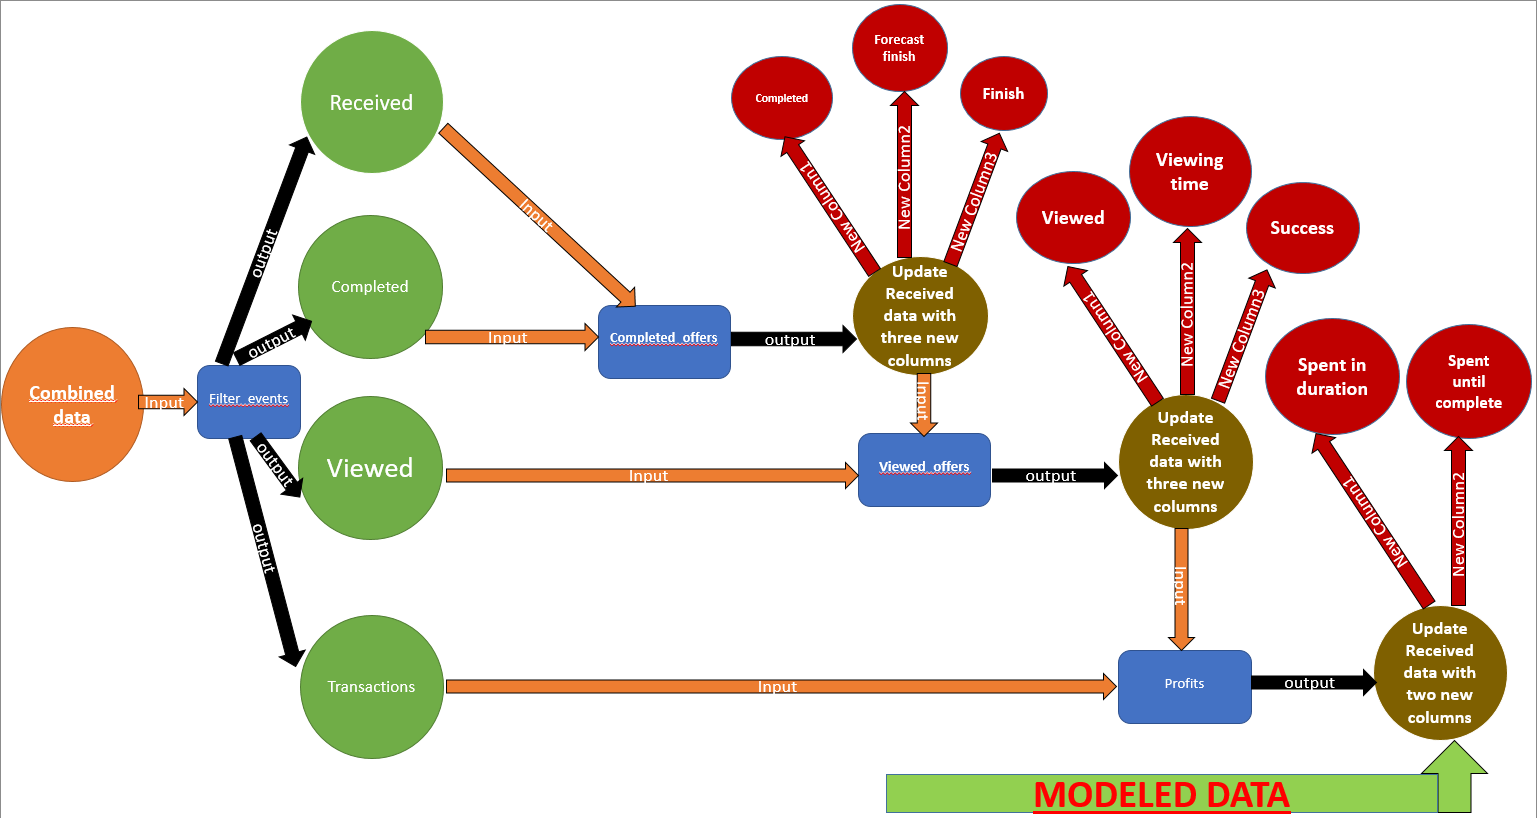# 

## 4.1.1 Defining Filter_events,Completed_offer , Viewed offer and Profits

In [98]:

def filter_events(data):
    """   
    Outputs:
        received data events
        veiwed data events
        completed data events
        transactions
    """
    received = data[data.event == 'offer received']
    viewed = data[data.event == 'offer viewed']
    completed = data[data.event == 'offer completed']
    transactions = data[data.event == 'transaction']
    
    return received, viewed, completed, transactions

In [99]:
def completed_offer(received, completed):
    
    """
    lookinhg for person who complete the received offer
    
   output:
        update received data frame with new columns (finish , completed ,forecast_finish)
    """
    results = list()
    for i, item in received.iterrows():
        record = dict()
    
        record['time'] = item.time
        record['offer_id'] = item.offer_id
        
        record['forecast_finish'] = item.time + item.duration 
        completion = completed[(completed.offer_id == item.offer_id) & (completed.time >= item.time) &
                               (completed.time <= record['forecast_finish'])]
        if completion.shape[0] > 0:
            record['completed'] = 1
            record['finish'] = completion.time.iloc[0]
        else:
            record['completed'] = 0
            record['finish'] = record['forecast_finish']

        results.append(record)

    return received.merge(pd.DataFrame(results), on=['time', 'offer_id'], how='left')

In [100]:
def viewed_offer(data, viewed):
    """
    return if the offer is succssfully completed within  the offer period or not
    
    outputs:
        update received data frame with new columns (viewed ,success ,viewing_time)
    """
    results = list()
    for i, item in data.iterrows():
        record = dict()
    
        record['time'] = item.time
        record['offer_id'] = item.offer_id
        
        views = viewed[(viewed.offer_id == viewed.offer_id) & (viewed.time >= item.time) & (viewed.time <= item.finish)]
        if views.shape[0] > 0:
            record['viewed'] = 1
            record['viewing_time'] = views.time.iloc[0]
            if (record['viewing_time'] <= item.finish) and item.completed:
                record['success'] = 1
            else:
                record['success'] = 0
        else:
            record['viewed'] = 0
            record['viewing_time'] = 0
            record['success'] = 0

        results.append(record)

    return data.merge(pd.DataFrame(results), on=['time', 'offer_id'],how='left')

In [101]:
def profits(data, transactions):
    """
     calculating the amount which customer spent within the offer period , assuming that all 
     amount which customer spent within the offer period were 
     using the offers
    
    
          outputs:update received data frame with new columns (viewed ,success ,viewing_time)
    """
    results = list()
    for i, item in data.iterrows():
        record = dict()
        record['time'] = item.time
        record['offer_id'] = item.offer_id
        
        until_complete_transaction = transactions[(transactions.time >= item.time) &(transactions.time <= item.finish)]
        duration_transaction = transactions[(transactions.time >= item.time) &(transactions.time <= item.forecast_finish)]
        record['spent_until_complete'] = until_complete_transaction.amount.sum()
        record['spent_in_duration'] = duration_transaction.amount.sum()
     
        results.append(record)

    return data.merge(pd.DataFrame(results), on=['time', 'offer_id'], how='left')

## 4.1.2 applying the Modeled data Process to one Customer

In [104]:
def customer_data(customer_data):
    """
    returns a new columns (Success ,viewed , complted , forecast finish )
    """
   
    received, viewed, completed, transactions = filter_events(customer_data)
    if received.shape[0] == 0:
        return None
    customer_data = completed_offer(received, completed)
    customer_data = viewed_offer(customer_data, viewed)
    customer_data = profits(customer_data, transactions)
    
    return customer_data

In [106]:
def model_data(Combined_all_data):
    return Combined_all_data.groupby('customer').apply(customer_data)

In [107]:
%time model_data = model_data(Combined_all_data)

CPU times: user 19min 6s, sys: 924 ms, total: 19min 7s
Wall time: 19min 7s


In [108]:
model_data=model_data.reset_index(drop=True)

In [114]:
model_data

event                          customer  time  \
0      offer received  0009655768c64bdeb2e877511632db8f   168   
1      offer received  0009655768c64bdeb2e877511632db8f   336   
2      offer received  0009655768c64bdeb2e877511632db8f   408   
3      offer received  0009655768c64bdeb2e877511632db8f   504   
4      offer received  0009655768c64bdeb2e877511632db8f   576   
5      offer received  0011e0d4e6b944f998e987f904e8c1e5     0   
6      offer received  0011e0d4e6b944f998e987f904e8c1e5   168   
7      offer received  0011e0d4e6b944f998e987f904e8c1e5   336   
8      offer received  0011e0d4e6b944f998e987f904e8c1e5   408   
9      offer received  0011e0d4e6b944f998e987f904e8c1e5   504   
10     offer received  0020c2b971eb4e9188eac86d93036a77     0   
11     offer received  0020c2b971eb4e9188eac86d93036a77   168   
12     offer received  0020c2b971eb4e9188eac86d93036a77   336   
13     offer received  0020c2b971eb4e9188eac86d93036a77   408   
14     offer received  0020c2b971eb4e9188eac86d93036a77   504   
15     offer received  0020ccbbb6d84e358d3414a3ff76cffd   168   
16     offer received  0020ccbbb6d84e358d3414a3ff76cffd   336   
17     offer received  0020ccbbb6d84e358d3414a3ff76cffd   408   
18     offer received  0020ccbbb6d84e358d3414a3ff76cffd   504   
19     offer received  003d66b6608740288d6cc97a6903f4f0     0   
20     offer received  003d66b6608740288d6cc97a6903f4f0   168   
21     offer received  003d66b6608740288d6cc97a6903f4f0   336   
22     offer received  003d66b6608740288d6cc97a6903f4f0   408   
23     offer received  003d66b6608740288d6cc97a6903f4f0   504   
24     offer received  00426fe3ffde4c6b9cb9ad6d077a13ea     0   
25     offer received  00426fe3ffde4c6b9cb9ad6d077a13ea   168   
26     offer received  00426fe3ffde4c6b9cb9ad6d077a13ea   336   
27     offer received  00426fe3ffde4c6b9cb9ad6d077a13ea   408   
28     offer received  00426fe3ffde4c6b9cb9ad6d077a13ea   576   
29     offer received  004b041fbfe44859945daa2c7f79ee64   168   
...               ...                               ...   ...   
66471  offer received  fff29fb549084123bd046dbc5ceb4faa     0   
66472  offer received  fff29fb549084123bd046dbc5ceb4faa   168   
66473  offer received  fff29fb549084123bd046dbc5ceb4faa   336   
66474  offer received  fff29fb549084123bd046dbc5ceb4faa   408   
66475  offer received  fff29fb549084123bd046dbc5ceb4faa   504   
66476  offer received  fff29fb549084123bd046dbc5ceb4faa   576   
66477  offer received  fff3ba4757bd42088c044ca26d73817a     0   
66478  offer received  fff3ba4757bd42088c044ca26d73817a   168   
66479  offer received  fff3ba4757bd42088c044ca26d73817a   336   
66480  offer received  fff3ba4757bd42088c044ca26d73817a   408   
66481  offer received  fff3ba4757bd42088c044ca26d73817a   504   
66482  offer received  fff3ba4757bd42088c044ca26d73817a   576   
66483  offer received  fff7576017104bcc8677a8d63322b5e1     0   
66484  offer received  fff7576017104bcc8677a8d63322b5e1   168   
66485  offer received  fff7576017104bcc8677a8d63322b5e1   408   
66486  offer received  fff7576017104bcc8677a8d63322b5e1   504   
66487  offer received  fff7576017104bcc8677a8d63322b5e1   576   
66488  offer received  fff8957ea8b240a6b5e634b6ee8eafcf   408   
66489  offer received  fff8957ea8b240a6b5e634b6ee8eafcf   504   
66490  offer received  fff8957ea8b240a6b5e634b6ee8eafcf   576   
66491  offer received  fffad4f4828548d1b5583907f2e9906b     0   
66492  offer received  fffad4f4828548d1b5583907f2e9906b   168   
66493  offer received  fffad4f4828548d1b5583907f2e9906b   408   
66494  offer received  fffad4f4828548d1b5583907f2e9906b   576   
66495  offer received  ffff82501cea40309d5fdd7edcca4a07     0   
66496  offer received  ffff82501cea40309d5fdd7edcca4a07   168   
66497  offer received  ffff82501cea40309d5fdd7edcca4a07   336   
66498  offer received  ffff82501cea40309d5fdd7edcca4a07   408   
66499  offer received  ffff82501cea40309d5fdd7edcca4a07   504   
66500  offer received  ffff82501cea40309d5fdd7edcca

In [323]:
model_data

event                          customer  time  \
0      offer received  0009655768c64bdeb2e877511632db8f   168   
1      offer received  0009655768c64bdeb2e877511632db8f   336   
2      offer received  0009655768c64bdeb2e877511632db8f   408   
3      offer received  0009655768c64bdeb2e877511632db8f   504   
4      offer received  0009655768c64bdeb2e877511632db8f   576   
5      offer received  0011e0d4e6b944f998e987f904e8c1e5     0   
6      offer received  0011e0d4e6b944f998e987f904e8c1e5   168   
7      offer received  0011e0d4e6b944f998e987f904e8c1e5   336   
8      offer received  0011e0d4e6b944f998e987f904e8c1e5   408   
9      offer received  0011e0d4e6b944f998e987f904e8c1e5   504   
10     offer received  0020c2b971eb4e9188eac86d93036a77     0   
11     offer received  0020c2b971eb4e9188eac86d93036a77   168   
12     offer received  0020c2b971eb4e9188eac86d93036a77   336   
13     offer received  0020c2b971eb4e9188eac86d93036a77   408   
14     offer received  0020c2b971eb4e9188eac86d93036a77   504   
15     offer received  0020ccbbb6d84e358d3414a3ff76cffd   168   
16     offer received  0020ccbbb6d84e358d3414a3ff76cffd   336   
17     offer received  0020ccbbb6d84e358d3414a3ff76cffd   408   
18     offer received  0020ccbbb6d84e358d3414a3ff76cffd   504   
19     offer received  003d66b6608740288d6cc97a6903f4f0     0   
20     offer received  003d66b6608740288d6cc97a6903f4f0   168   
21     offer received  003d66b6608740288d6cc97a6903f4f0   336   
22     offer received  003d66b6608740288d6cc97a6903f4f0   408   
23     offer received  003d66b6608740288d6cc97a6903f4f0   504   
24     offer received  00426fe3ffde4c6b9cb9ad6d077a13ea     0   
25     offer received  00426fe3ffde4c6b9cb9ad6d077a13ea   168   
26     offer received  00426fe3ffde4c6b9cb9ad6d077a13ea   336   
27     offer received  00426fe3ffde4c6b9cb9ad6d077a13ea   408   
28     offer received  00426fe3ffde4c6b9cb9ad6d077a13ea   576   
29     offer received  004b041fbfe44859945daa2c7f79ee64   168   
...               ...                               ...   ...   
66471  offer received  fff29fb549084123bd046dbc5ceb4faa     0   
66472  offer received  fff29fb549084123bd046dbc5ceb4faa   168   
66473  offer received  fff29fb549084123bd046dbc5ceb4faa   336   
66474  offer received  fff29fb549084123bd046dbc5ceb4faa   408   
66475  offer received  fff29fb549084123bd046dbc5ceb4faa   504   
66476  offer received  fff29fb549084123bd046dbc5ceb4faa   576   
66477  offer received  fff3ba4757bd42088c044ca26d73817a     0   
66478  offer received  fff3ba4757bd42088c044ca26d73817a   168   
66479  offer received  fff3ba4757bd42088c044ca26d73817a   336   
66480  offer received  fff3ba4757bd42088c044ca26d73817a   408   
66481  offer received  fff3ba4757bd42088c044ca26d73817a   504   
66482  offer received  fff3ba4757bd42088c044ca26d73817a   576   
66483  offer received  fff7576017104bcc8677a8d63322b5e1     0   
66484  offer received  fff7576017104bcc8677a8d63322b5e1   168   
66485  offer received  fff7576017104bcc8677a8d63322b5e1   408   
66486  offer received  fff7576017104bcc8677a8d63322b5e1   504   
66487  offer received  fff7576017104bcc8677a8d63322b5e1   576   
66488  offer received  fff8957ea8b240a6b5e634b6ee8eafcf   408   
66489  offer received  fff8957ea8b240a6b5e634b6ee8eafcf   504   
66490  offer received  fff8957ea8b240a6b5e634b6ee8eafcf   576   
66491  offer received  fffad4f4828548d1b5583907f2e9906b     0   
66492  offer received  fffad4f4828548d1b5583907f2e9906b   168   
66493  offer received  fffad4f4828548d1b5583907f2e9906b   408   
66494  offer received  fffad4f4828548d1b5583907f2e9906b   576   
66495  offer received  ffff82501cea40309d5fdd7edcca4a07     0   
66496  offer received  ffff82501cea40309d5fdd7edcca4a07   168   
66497  offer received  ffff82501cea40309d5fdd7edcca4a07   336   
66498  offer received  ffff82501cea40309d5fdd7edcca4a07   408   
66499  offer received  ffff82501cea40309d5fdd7edcca4a07   504   
66500  offer received  ffff82501cea40309d5fdd7edcca

### We have now our Model data after final processing, and we can know now which offer is succsessed and which is not.
### We will do some visualization and statics for our Model data before navigation to the next steps:

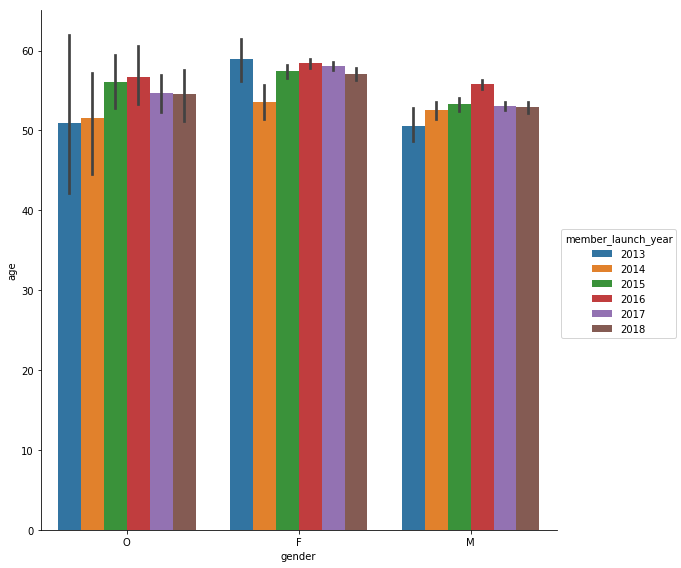

In [121]:

successed_offers=model_data[model_data['success'] == 1]

#HUE=Combined_all_data[(Combined_all_data['offer_id'] != '0')&( Combined_all_data['event'] == 'offer completed')]['offer_id']
#Y=Combined_all_data[(Combined_all_data['offer_id'] != '0' )&( Combined_all_data['event'] == 'offer completed') ]['age']
#X=Combined_all_data[(Combined_all_data['offer_id'] != '0') & (Combined_all_data['event'] == 'offer completed')]['gender']
sns.factorplot(x='gender', y='age' , data=successed_offers, hue='member_launch_year',size=8,kind='bar', aspect=1)

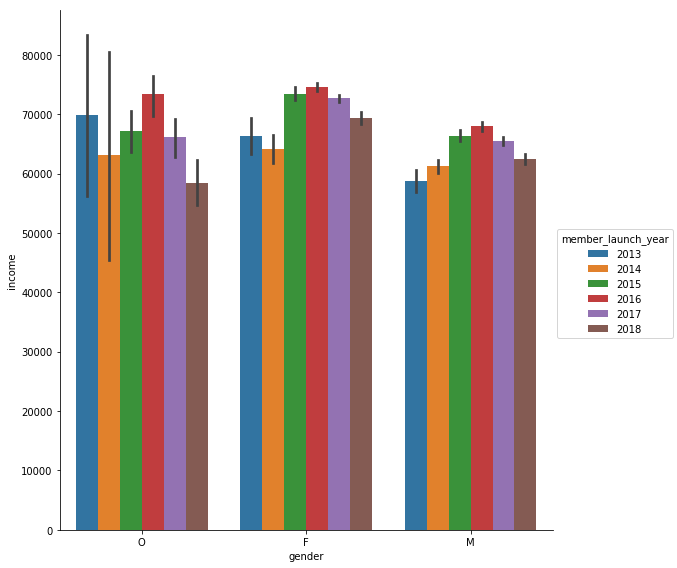

In [122]:

successed_offers=model_data[model_data['success'] == 1]

#HUE=Combined_all_data[(Combined_all_data['offer_id'] != '0')&( Combined_all_data['event'] == 'offer completed')]['offer_id']
#Y=Combined_all_data[(Combined_all_data['offer_id'] != '0' )&( Combined_all_data['event'] == 'offer completed') ]['age']
#X=Combined_all_data[(Combined_all_data['offer_id'] != '0') & (Combined_all_data['event'] == 'offer completed')]['gender']
sns.factorplot(x='gender', y='income' , data=successed_offers, hue='member_launch_year',size=8,kind='bar', aspect=1)

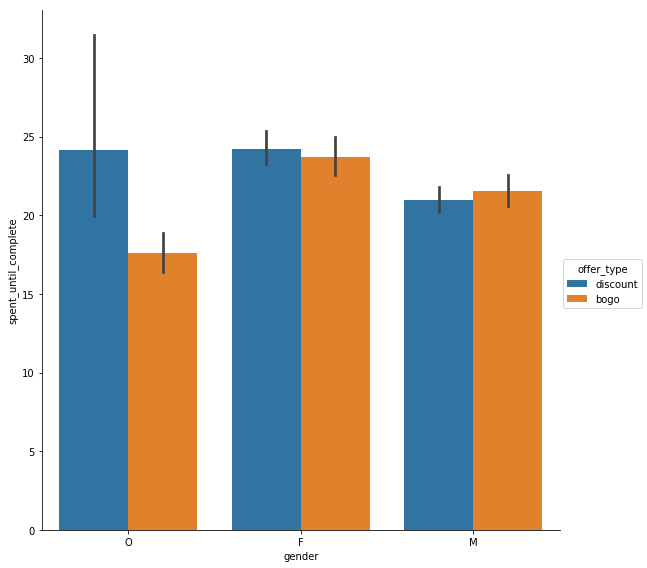

In [124]:

successed_offers=model_data[model_data['success'] == 1]

#HUE=Combined_all_data[(Combined_all_data['offer_id'] != '0')&( Combined_all_data['event'] == 'offer completed')]['offer_id']
#Y=Combined_all_data[(Combined_all_data['offer_id'] != '0' )&( Combined_all_data['event'] == 'offer completed') ]['age']
#X=Combined_all_data[(Combined_all_data['offer_id'] != '0') & (Combined_all_data['event'] == 'offer completed')]['gender']
sns.factorplot(x='gender', y='spent_until_complete' , data=successed_offers, hue='offer_type',size=8,kind='bar', aspect=1)

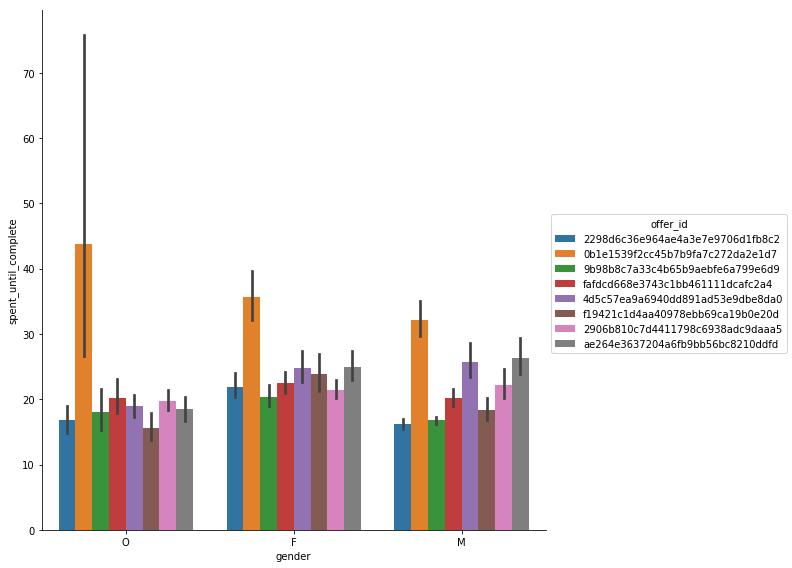

In [125]:

successed_offers=model_data[model_data['success'] == 1]

#HUE=Combined_all_data[(Combined_all_data['offer_id'] != '0')&( Combined_all_data['event'] == 'offer completed')]['offer_id']
#Y=Combined_all_data[(Combined_all_data['offer_id'] != '0' )&( Combined_all_data['event'] == 'offer completed') ]['age']
#X=Combined_all_data[(Combined_all_data['offer_id'] != '0') & (Combined_all_data['event'] == 'offer completed')]['gender']
sns.factorplot(x='gender', y='spent_until_complete' , data=successed_offers, hue='offer_id',size=8,kind='bar', aspect=1)

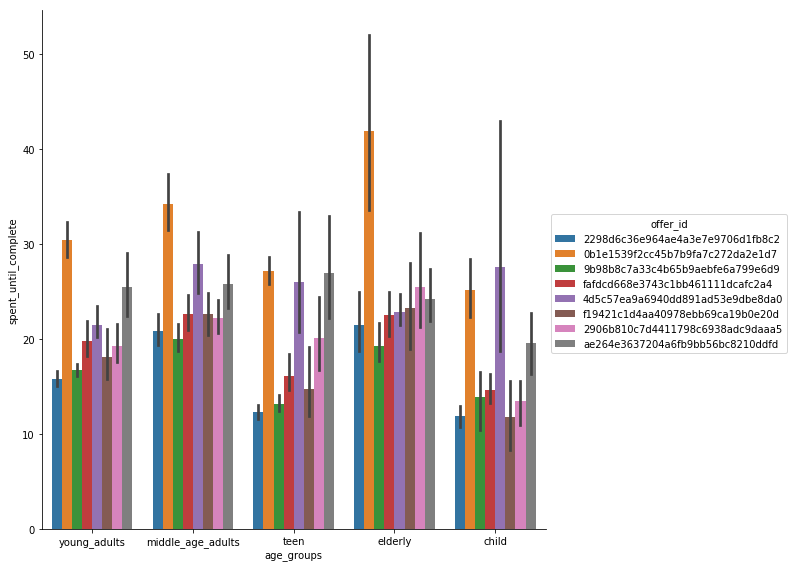

In [126]:

successed_offers=model_data[model_data['success'] == 1]

#HUE=Combined_all_data[(Combined_all_data['offer_id'] != '0')&( Combined_all_data['event'] == 'offer completed')]['offer_id']
#Y=Combined_all_data[(Combined_all_data['offer_id'] != '0' )&( Combined_all_data['event'] == 'offer completed') ]['age']
#X=Combined_all_data[(Combined_all_data['offer_id'] != '0') & (Combined_all_data['event'] == 'offer completed')]['gender']
sns.factorplot(x='age_groups', y='spent_until_complete' , data=successed_offers, hue='offer_id',size=8,kind='bar', aspect=1)

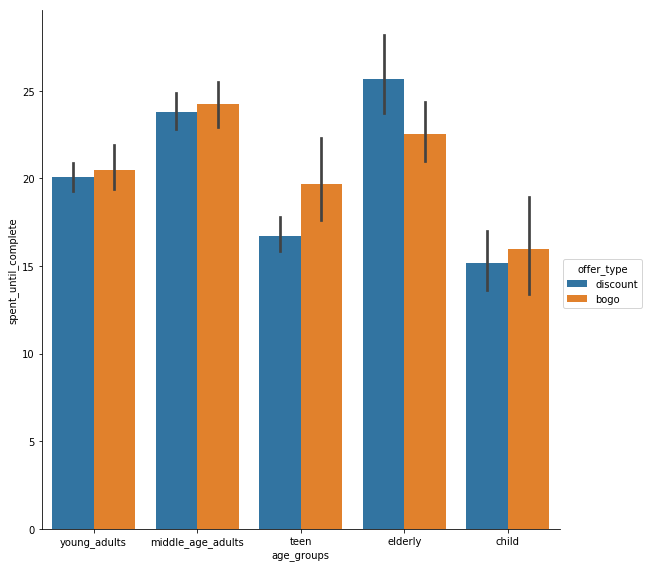

In [127]:

successed_offers=model_data[model_data['success'] == 1]

#HUE=Combined_all_data[(Combined_all_data['offer_id'] != '0')&( Combined_all_data['event'] == 'offer completed')]['offer_id']
#Y=Combined_all_data[(Combined_all_data['offer_id'] != '0' )&( Combined_all_data['event'] == 'offer completed') ]['age']
#X=Combined_all_data[(Combined_all_data['offer_id'] != '0') & (Combined_all_data['event'] == 'offer completed')]['gender']
sns.factorplot(x='age_groups', y='spent_until_complete' , data=successed_offers, hue='offer_type',size=8,kind='bar', aspect=1)

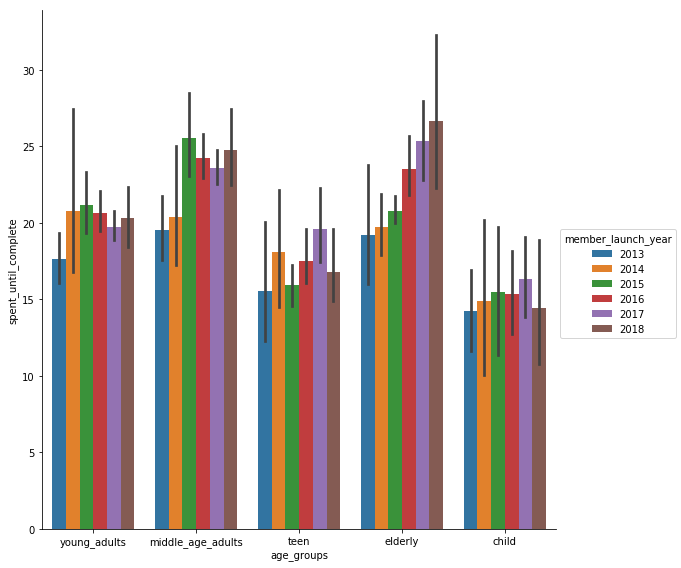

In [130]:
successed_offers=model_data[model_data['success'] == 1]
sns.factorplot(x='age_groups', y='spent_until_complete' , data=successed_offers, hue='member_launch_year',size=8,kind='bar', aspect=1)

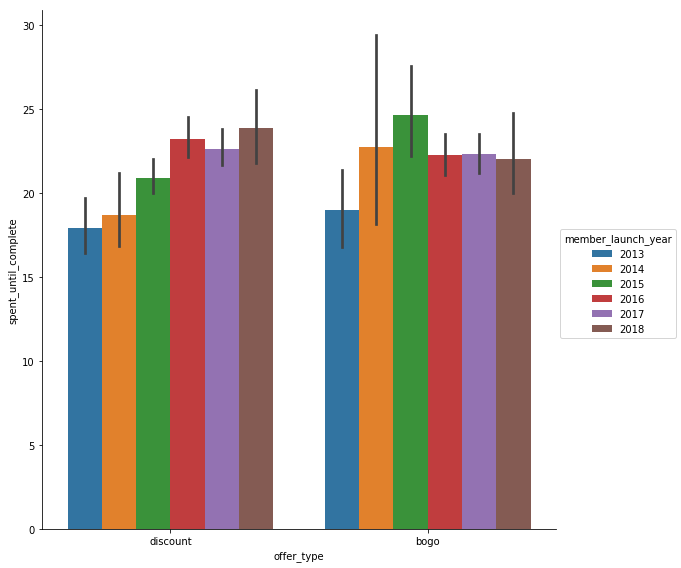

In [131]:
successed_offers=model_data[model_data['success'] == 1]
sns.factorplot(x='offer_type', y='spent_until_complete' , data=successed_offers, hue='member_launch_year',size=8,kind='bar', aspect=1)

In [324]:
data_gender_total = model_data[model_data['gender']!= 'NA'].groupby(['gender']).count()
data_gender_success = successed_offers[(successed_offers['gender']!= 'NA')].groupby(['gender']).count()



print('For Females:')
print(f"Number of offer Succeded: {data_gender_success.loc[('F', 'success')]} , {round((data_gender_success.loc[('F', 'success')]/data_gender_total.loc[('F','success')])*100,1)}% of Female received offers. ")
print(f"Number of offer Succeded: {data_gender_success.loc[('F', 'success')]} , {round((data_gender_success.loc[('F', 'success')]/data_gender_total['success'].sum())*100,1)}% of Total received offers. ")      
print('\nFor Males:')
print(f"Number of offer Succeded: {data_gender_success.loc[('M', 'success')]} , {round((data_gender_success.loc[('M', 'success')]/data_gender_total.loc[('M','success')])*100,1)}% of Male received offers.")
print(f"Number of offer Succeded: {data_gender_success.loc[('M', 'success')]} , {round((data_gender_success.loc[('M', 'success')]/data_gender_total['success'].sum())*100,1)}% of Total received offers. ")       


For Females:
Number of offer Succeded: 11107 , 40.5% of Female received offers. 
Number of offer Succeded: 11107 , 16.7% of Total received offers. 

For Males:
Number of offer Succeded: 12413 , 32.6% of Male received offers.
Number of offer Succeded: 12413 , 18.7% of Total received offers. 


In [212]:
data_spent_total = model_data[model_data['gender']!= 'NA'].groupby(['gender'])['spent_until_complete'].sum()
data_spent_success = successed_offers[(successed_offers['gender']!= 'NA')].groupby(['gender'])['spent_until_complete'].sum()
print('For Females:')
print(f"Total Spent until offer Complete: {data_spent_success.loc[('F')]} , {round((data_spent_success.loc[('F')]/data_spent_total.loc[('F')])*100,1)}% of Total Female received offers. ")
#print(f"Number of offer Succeded: {data_spent_success.loc[('F')]} , {round((data_spent_success.loc[('F')]/data_gender_total['spent_until_complete'].sum())*100,1)}% of Total received offers. ")      
print('\nFor Males:')
print(f"Total Spent until offer Complete: {data_spent_success.loc[('M')]} , {round((data_spent_success.loc[('M')]/data_spent_total.loc[('M')])*100,1)}% of Total Male received offers. ")
#print(f"Number of offer Succeded: {data_gender_success.loc[('F', 'success')]} , {round((data_gender_success.loc[('M', 'success')]/data_gender_total['success'].sum())*100,1)}% of Total received offers. ")       


For Females:
Total Spent until offer Complete: 266395.9199999997 , 53.8% of Total Female received offers. 

For Males:
Total Spent until offer Complete: 263321.7999999994 , 50.6% of Total Male received offers. 


In [211]:
data_spent_total = model_data[model_data['gender']!= 'NA'].groupby(['gender'])['spent_until_complete'].sum()
data_spent_success = successed_offers[(successed_offers['gender']!= 'NA')].groupby(['gender'])['spent_until_complete'].sum()
print('For Females:')
print(f"Total Spent until offer Complete: {data_spent_success.loc[('F')]} , {round((data_spent_success.loc[('F')]/data_spent_total.sum())*100,1)}% of Total  received offers. ")
#print(f"Number of offer Succeded: {data_spent_success.loc[('F')]} , {round((data_spent_success.loc[('F')]/data_gender_total['spent_until_complete'].sum())*100,1)}% of Total received offers. ")      
print('\nFor Males:')
print(f"Total Spent until offer Complete: {data_spent_success.loc[('M')]} , {round((data_spent_success.loc[('M')]/data_spent_total.sum())*100,1)}% of Total  received offers. ")
#print(f"Number of offer Succeded: {data_gender_success.loc[('F', 'success')]} , {round((data_gender_success.loc[('M', 'success')]/data_gender_total['success'].sum())*100,1)}% of Total received offers. ")       


For Females:
Total Spent until offer Complete: 266395.9199999997 , 25.9% of Total  received offers. 

For Males:
Total Spent until offer Complete: 263321.7999999994 , 25.6% of Total  received offers. 


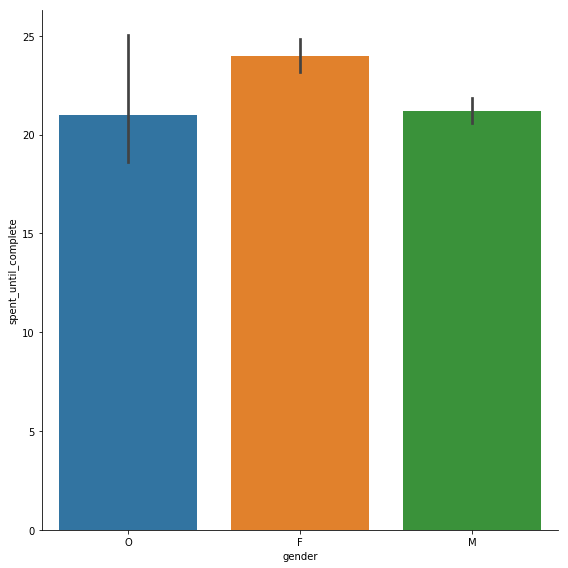

In [217]:

successed_offers=model_data[model_data['success'] == 1]

#HUE=Combined_all_data[(Combined_all_data['offer_id'] != '0')&( Combined_all_data['event'] == 'offer completed')]['offer_id']
#Y=Combined_all_data[(Combined_all_data['offer_id'] != '0' )&( Combined_all_data['event'] == 'offer completed') ]['age']
#X=Combined_all_data[(Combined_all_data['offer_id'] != '0') & (Combined_all_data['event'] == 'offer completed')]['gender']
sns.factorplot(x='gender', y='spent_until_complete' , data=successed_offers,size=8,kind='bar', aspect=1)

In [218]:
gender_dummies=pd.get_dummies(model_data['gender'])
offer_type_dummies=pd.get_dummies(model_data['offer_type'])
offer_id_dummies=pd.get_dummies(model_data['offer_id'])
age_groups_dummies=pd.get_dummies(model_data['age_groups'])
member_launch_year_dummies=pd.get_dummies(model_data['member_launch_year'])

In [219]:
modeled_data=pd.concat([model_data,gender_dummies,offer_type_dummies,offer_id_dummies,age_groups_dummies,member_launch_year_dummies],axis=1)

In [220]:
modeled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66501 entries, 0 to 66500
Data columns (total 55 columns):
event                               66501 non-null object
customer                            66501 non-null object
time                                66501 non-null int64
offer_id                            66501 non-null object
amount                              66501 non-null float64
age                                 66501 non-null int64
became_member_on                    66501 non-null datetime64[ns]
gender                              66501 non-null object
income                              66501 non-null float64
age_groups                          66501 non-null object
member_launch_Cum_days              66501 non-null int64
member_launch_year                  66501 non-null int64
difficulty                          66501 non-null float64
duration                            66501 non-null float64
offer_type                          66501 non-null object
reward       

In [1207]:
static_data5=modeled_data

#### Showing the Top Customres

In [221]:
TOP_Customers = modeled_data[(modeled_data['success'] == 1)].groupby(['customer', 'success'])['spent_until_complete'].sum().reset_index()
TOP_Customers = TOP_Customers.sort_values('spent_until_complete', ascending=False).head(10)
count = 1


print('                    TOP-10 Customers              ')
for i, item in TOP_Customers.iterrows():
    print(f'[ #{count} ]')
    print(f'Person: {item["customer"]} ')
    print(f'Number of Success Offers:       {modeled_data[(modeled_data["customer"] == item["customer"]) & (modeled_data["success"] == 1)].shape[0]}       offers')
    print(f'Spent until complete:                  ${round(item["spent_until_complete"],0)}        ')
    
    count += 1

                    TOP-10 Customers              
[ #1 ]
Person: 0cc6e8553c844c02ab525bc466aa569b 
Number of Success Offers:       4       offers
Spent until complete:                  $1754.0        
[ #2 ]
Person: 2fc5fa0b50f944e398b903b0be851678 
Number of Success Offers:       3       offers
Spent until complete:                  $1532.0        
[ #3 ]
Person: 8d31a8a4b5d24b10a54da118855f7132 
Number of Success Offers:       4       offers
Spent until complete:                  $1489.0        
[ #4 ]
Person: a2633655a62e4287a3b651d926a774a6 
Number of Success Offers:       6       offers
Spent until complete:                  $1439.0        
[ #5 ]
Person: e72ad19d4f6c4827b69b55c5e3a55bba 
Number of Success Offers:       4       offers
Spent until complete:                  $1271.0        
[ #6 ]
Person: 4d4216b868fe43ddb9c9f0b77212c0cb 
Number of Success Offers:       6       offers
Spent until complete:                  $1164.0        
[ #7 ]
Person: bfce6d50205a4f6982d87ce80e5d

## 4.1.5 Dropping the unneeded Columns from the Modeled Data Set

In [222]:
modeled_data = modeled_data.drop(["customer", "event", "age","amount","offer_id","gender","became_member_on",
                                  "age_groups","member_launch_year","offer_type",
                                  "viewed","completed","finish"
                                 ], axis=1)

In [223]:
modeled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66501 entries, 0 to 66500
Data columns (total 42 columns):
time                                66501 non-null int64
income                              66501 non-null float64
member_launch_Cum_days              66501 non-null int64
difficulty                          66501 non-null float64
duration                            66501 non-null float64
reward                              66501 non-null float64
web                                 66501 non-null float64
email                               66501 non-null float64
mobile                              66501 non-null float64
social                              66501 non-null float64
forecast_finish                     66501 non-null float64
success                             66501 non-null int64
viewing_time                        66501 non-null int64
spent_in_duration                   66501 non-null float64
spent_until_complete                66501 non-null float64
F             

## 4.1.6 Make data Normalization for the Modeled Data

In [225]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
static_data7=modeled_data
modeled_data[['time','income','difficulty','duration','reward','forecast_finish','spent_until_complete','spent_in_duration','viewing_time','member_launch_Cum_days']] = mms.fit_transform(modeled_data[['time','income','difficulty','duration','reward','forecast_finish','spent_until_complete','spent_in_duration','viewing_time','member_launch_Cum_days']])

/home/ec2-user/anaconda3/envs/mxnet_p36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


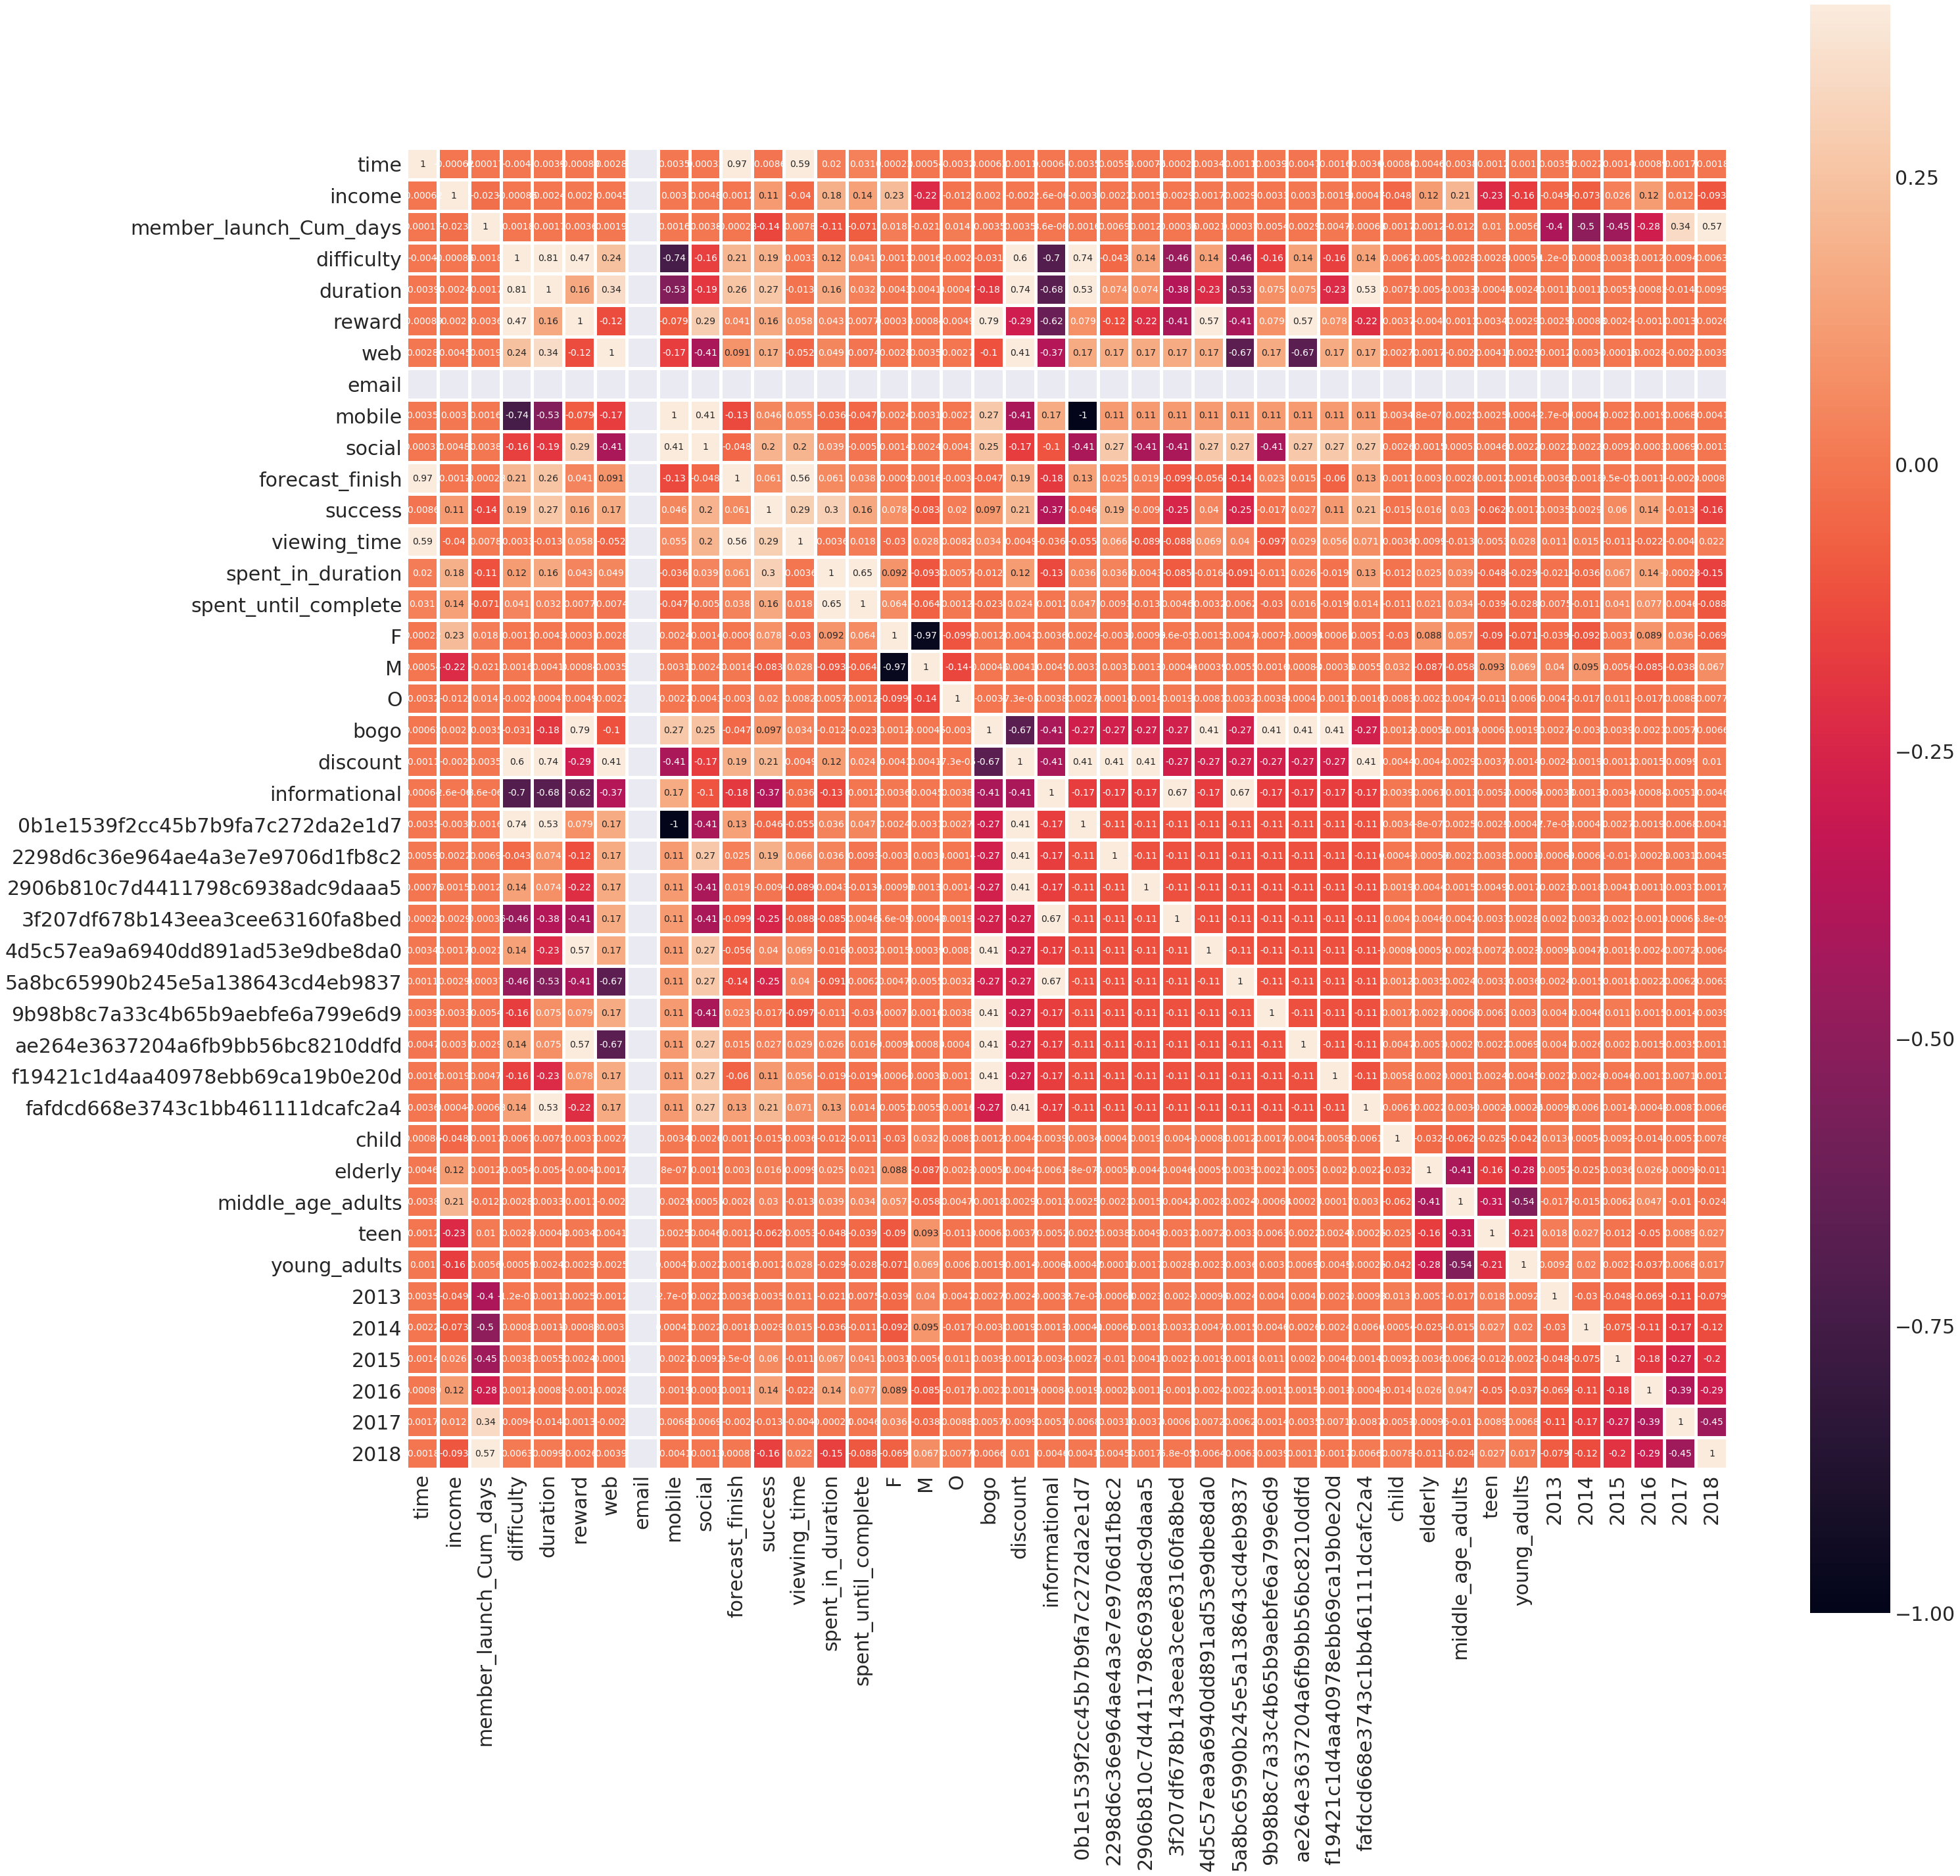

In [293]:
import seaborn as sb
C_mat = modeled_data.corr()
fig = plt.figure(figsize = (45,45))
sb.heatmap(C_mat, vmax = 0.4,annot=True, square = True,annot_kws={'size':14},cbar=True,linewidths=4)
sb.set(font_scale=4)
plt.show()

### getting the best features for the modelled data

In [383]:
#Correlation with output variable
cor_target = abs(C_mat["success"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.15].sort_values()
relevant_features

spent_until_complete                0.155922
2018                                0.158226
reward                              0.163495
web                                 0.167122
2298d6c36e964ae4a3e7e9706d1fb8c2    0.186246
difficulty                          0.190465
social                              0.197064
discount                            0.209410
fafdcd668e3743c1bb461111dcafc2a4    0.210728
5a8bc65990b245e5a138643cd4eb9837    0.249718
3f207df678b143eea3cee63160fa8bed    0.250011
duration                            0.265026
viewing_time                        0.291399
spent_in_duration                   0.299669
informational                       0.374796
success                             1.000000
Name: success, dtype: float64

## 4.1.7 Shuffling the Modeled data and specifying the features and  the labels

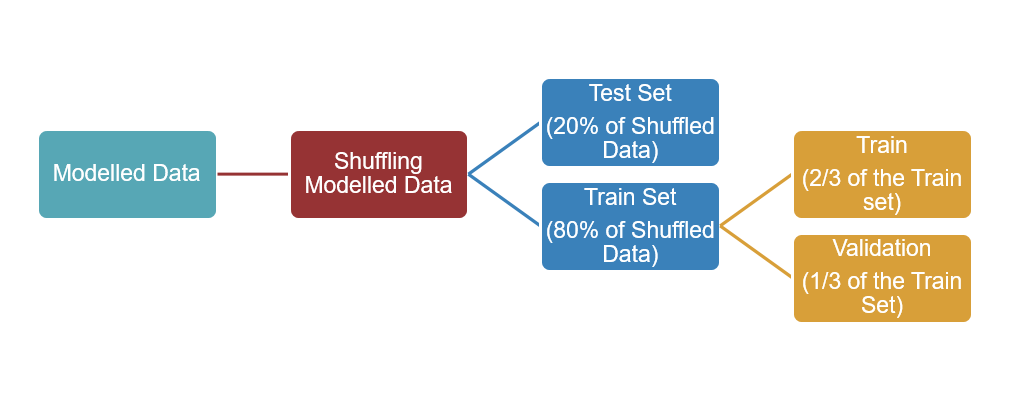# 

In [247]:
from sklearn.utils import shuffle

def prepare_Modeled_data(data):
    """Shuffling data."""
    data_train = data.loc[:, data.columns != 'success']
    labels_train = data['success']
 
    
    #Shuffle reviews and corresponding labels within training and test sets
    data_train, labels_train = shuffle(data_train, labels_train)
    
    return data_train, labels_train

In [248]:
features, labels=prepare_Modeled_data(modeled_data)

In [329]:
modeled_data.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66501 entries, 0 to 66500
Data columns (total 42 columns):
time                                66501 non-null float64
income                              66501 non-null float64
member_launch_Cum_days              66501 non-null float64
difficulty                          66501 non-null float64
duration                            66501 non-null float64
reward                              66501 non-null float64
web                                 66501 non-null float64
email                               66501 non-null float64
mobile                              66501 non-null float64
social                              66501 non-null float64
forecast_finish                     66501 non-null float64
success                             66501 non-null int64
viewing_time                        66501 non-null float64
spent_in_duration                   66501 non-null float64
spent_until_complete                66501 non-null float64
F       

## 4.1.8 Dividing the Modeled data to train set , test set and validation set 

In [249]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,labels, 
                                                        test_size=0.20, 
                                                        random_state=42)

# Then we split the training set further into 2/3 training and 1/3 validation sets.
X_train, X_val, y_train, Y_val = train_test_split(X_train, y_train, test_size=0.33)

In [331]:
#we have 39 features as Shown below:
X_train.info(0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35644 entries, 1882 to 57728
Data columns (total 41 columns):
time                                35644 non-null float64
income                              35644 non-null float64
member_launch_Cum_days              35644 non-null float64
difficulty                          35644 non-null float64
duration                            35644 non-null float64
reward                              35644 non-null float64
web                                 35644 non-null float64
email                               35644 non-null float64
mobile                              35644 non-null float64
social                              35644 non-null float64
forecast_finish                     35644 non-null float64
viewing_time                        35644 non-null float64
spent_in_duration                   35644 non-null float64
spent_until_complete                35644 non-null float64
F                                   35644 non-null uint8
M    

In [251]:
#we have one Label (Success)as Shown below:
y_train.describe()

count    35644.000000
mean         0.356498
std          0.478971
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: success, dtype: float64

# 5. Assigning the Benchmark Model and Evaluation Metrics

### We will use Logistic regression model as a Benchmark in which to compare our models ‘s  performance to , because it is fast and simple to implement.
### We will implement the roc_auc_score , Precision and Recall  Metrics to Compare other Models ‘s Results.


In [334]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import roc_auc_score
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred_LOG = classifier.predict(X_test)

print( 'roc_auc_score:' , roc_auc_score(y_test, y_pred_LOG))
print('Precision Metric:',precision_score(y_test, y_pred_LOG))
print('Recall Metric:',recall_score(y_test, y_pred_LOG))

/home/ec2-user/anaconda3/envs/mxnet_p36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


roc_auc_score: 0.855732621614278
Precision Metric: 0.8207803046108909
Recall Metric: 0.8129778879933871


# 6.Training Models and Evaluation

# 6.1 Random Forest Classifier

In [335]:
from sklearn.ensemble import RandomForestClassifier
import math
rf = RandomForestClassifier(max_depth=10, random_state=0)

rf.fit(X_train, y_train)
y_pred_RF = rf.predict(X_test)
print( 'roc_auc_score:' , roc_auc_score(y_test, np.around(y_pred_RF)))
print('Precision Metric:',precision_score(y_test, np.around(y_pred_RF)))
print('Recall Metric:',recall_score(y_test, np.around(y_pred_RF)))

#print(accuracy_score(y_test, np.around(y_pred_RF)))
#print(confusion_matrix(y_test, np.around(y_pred_RF)))
#print('-'*100)
#print(classification_report(y_test, np.around(y_pred_RF)))

/home/ec2-user/anaconda3/envs/mxnet_p36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


roc_auc_score: 0.9702271326258832
Precision Metric: 0.9338452451269935
Recall Metric: 0.9801611903285803


Text(0.5, 1.0, 'Random Forest Estimated Feature Importance')

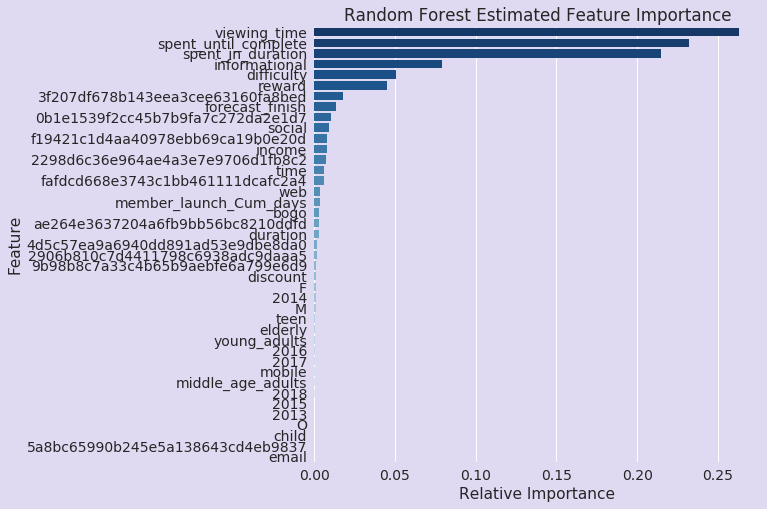

In [255]:
#Features importance
relative_importance = rf.feature_importances_
relative_importance = relative_importance / np.sum(relative_importance)

feature_importance =\
    pd.DataFrame(list(zip(X_train.columns,
                          relative_importance)),
                 columns=['feature', 'relativeimportance'])

feature_importance = feature_importance.sort_values('relativeimportance',
                                                    ascending=False)

feature_importance = feature_importance.reset_index(drop=True)

palette = sns.color_palette("Blues_r", feature_importance.shape[0])

plt.figure(figsize=(8, 8))
sns.barplot(x='relativeimportance',
            y='feature',
            data=feature_importance,
            palette=palette)
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.title('Random Forest Estimated Feature Importance')

# 6.2 Decision Tree Classifier

In [338]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)
y_pred_tree = dt.predict(X_test)
print( 'roc_auc_score:' , roc_auc_score(y_test, y_pred_tree))
print('Precision Metric:',precision_score(y_test, y_pred_tree))
print('Recall Metric:',recall_score(y_test, y_pred_tree))

#print(accuracy_score(y_test, y_pred_tree))
#print(confusion_matrix(y_test, y_pred_tree))
#print('-'*100)
#print(classification_report(y_test, y_pred_tree))

roc_auc_score: 0.9620388663389406
Precision Metric: 0.950123660346249
Recall Metric: 0.9526761727629676


# 6.3 K-neighbors Classifier

In [339]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)
# Predicting the Test set results
y_pred_knn = knn.predict(X_test)

print( 'roc_auc_score:' , roc_auc_score(y_test, y_pred_knn))
print('Precision Metric:',precision_score(y_test, y_pred_knn))
print('Recall Metric:',recall_score(y_test, y_pred_knn))

#print(accuracy_score(y_test, y_pred_knn))
#print(confusion_matrix(y_test, y_pred_knn))
#print('-'*100)
#print(classification_report(y_test, y_pred_knn))

roc_auc_score: 0.7806063590805208
Precision Metric: 0.718865598027127
Recall Metric: 0.7228766274023558


# 6.4 Amazon Sage maker XG-Boost built in Algorithm

In [258]:
# Our current execution role is require when creating the model as the training
# and inference code will need to access the model artifacts.
import boto3
import sagemaker
from sagemaker import get_execution_role

In [259]:
#we need to import the various bits of SageMaker that we will be using.
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
import sklearn.model_selection

import sagemaker
from sagemaker import get_execution_role
from sagemaker.amazon.amazon_estimator import get_image_uri
from sagemaker.predictor import csv_serializer

data_dir = '../data/starbuks_capstone'
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

In [260]:
# We use pandas to save our test, train and validation data to csv files. Note that we make sure not to include header
# information or an index as this is required by the built in algorithms provided by Amazon. Also, for the train and
# validation data, it is assumed that the first entry in each row is the target variable.
X_test.to_csv(os.path.join(data_dir, 'test.csv'), header=False, index=False)

pd.concat([Y_val, X_val], axis=1).to_csv(os.path.join(data_dir, 'validation.csv'), header=False, index=False)
pd.concat([y_train, X_train], axis=1).to_csv(os.path.join(data_dir, 'train.csv'), header=False, index=False)

In [340]:
# This is an object that represents the SageMaker session that we are currently operating in. This
# object contains some useful information that we will need to access later such as our region.
session = sagemaker.Session()

# This is an object that represents the IAM role that we are currently assigned. When we construct
# and launch the training job later we will need to tell it what IAM role it should have. Since our
# use case is relatively simple we will simply assign the training job the role we currently have.
role = get_execution_role()
prefix = 'starbucks-capstone-xgboost'

test_location = session.upload_data(os.path.join(data_dir, 'test.csv'), key_prefix=prefix)
val_location = session.upload_data(os.path.join(data_dir, 'validation.csv'), key_prefix=prefix)
train_location = session.upload_data(os.path.join(data_dir, 'train.csv'), key_prefix=prefix)

In [366]:
# As stated above, we use this utility method to construct the image name for the training container.
container = get_image_uri(session.boto_region_name, 'xgboost','0.90-1')

xgb = sagemaker.estimator.Estimator(container, # The location of the container we wish to use
                                    role,                                    # What is our current IAM Role
                                    train_instance_count=1,                  # How many compute instances
                                    train_instance_type='ml.m4.xlarge',      # What kind of compute instances
                                    output_path='s3://{}/{}/output'.format(session.default_bucket(), prefix),
                                    sagemaker_session=session)

# And then set the algorithm specific parameters.
xgb.set_hyperparameters(max_depth=2,
                        eta=0.02,
                        gamma=2.6,
                        min_child_weight=2,
                        subsample=0.65,
                        silent=0,
                    #    alpha=1.5,
                     #   colsample_bylevel=0.5,
                      #  colsample_bynode=0.5,
                       # colsample_bytree=0.5,
                        max_delta_step=3,
                        objective='binary:logistic',
                        early_stopping_rounds=100,
                        num_round=500)

In [367]:
#Hyper parametrer tuning
# First, make sure to import the relevant objects used to construct the tuner
from sagemaker.tuner import IntegerParameter, ContinuousParameter, HyperparameterTuner


xgb_hyperparameter_tuner = HyperparameterTuner(estimator = xgb, # The estimator object to use as the basis for the training jobs.
                                               objective_metric_name = 'validation:auc', # The metric used to compare trained models.
                                               objective_type = 'Maximize', # Whether we wish to minimize or maximize the metric.
                                               max_jobs = 6, # The total number of models to train
                                               max_parallel_jobs = 3, # The number of models to train in parallel
                                               hyperparameter_ranges = {
                                                    'max_depth': IntegerParameter(2, 4),
                                                    
                                                    'eta'      : ContinuousParameter(0.02, 0.04),
                                                  #  'colsample_bylevel'      : ContinuousParameter(0.1, 1),
                                                   # 'colsample_bynode'      : ContinuousParameter(0.1, 1),
                                                    #'colsample_bytree'      : ContinuousParameter(0.1, 1),
                                                    #'max_delta_step': IntegerParameter(1, 3),
                                                   
                                                    #'alpha'      : ContinuousParameter(1.1,1.6),
                                                    'min_child_weight': IntegerParameter(1, 2),
                                                    'num_round': IntegerParameter(400, 700),
                                                    'subsample': ContinuousParameter(0.71, 0.73),
                                                    'gamma': ContinuousParameter(3.60, 3.65),
                                               })

In [368]:

# This is a wrapper around the location of our train and validation data, to make sure that SageMaker
# knows our data is in csv format.
s3_input_train = sagemaker.s3_input(s3_data=train_location, content_type='csv')
s3_input_validation = sagemaker.s3_input(s3_data=val_location, content_type='csv')

xgb_hyperparameter_tuner.fit({'train': s3_input_train, 'validation': s3_input_validation})

In [369]:
xgb_hyperparameter_tuner.wait()

...........................................................................................!


In [370]:
xgb_attached = sagemaker.estimator.Estimator.attach(xgb_hyperparameter_tuner.best_training_job())

2019-12-25 06:52:45 Starting - Preparing the instances for training
2019-12-25 06:52:45 Downloading - Downloading input data
2019-12-25 06:52:45 Training - Training image download completed. Training in progress.
2019-12-25 06:52:45 Uploading - Uploading generated training model
2019-12-25 06:52:45 Completed - Training job completedINFO:sagemaker-containers:Imported framework sagemaker_xgboost_container.training
INFO:sagemaker-containers:Failed to parse hyperparameter _tuning_objective_metric value validation:auc to Json.
Returning the value itself
INFO:sagemaker-containers:Failed to parse hyperparameter objective value binary:logistic to Json.
Returning the value itself
INFO:sagemaker-containers:No GPUs detected (normal if no gpus installed)
INFO:sagemaker_xgboost_container.training:Running XGBoost Sagemaker in algorithm mode
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
INFO:root:Determined delimiter of CSV input is ','
[06:52:1

In [371]:
xgb_transformer = xgb_attached.transformer(instance_count = 1, instance_type = 'ml.m4.xlarge')

In [372]:
xgb_transformer.transform(test_location, content_type='text/csv', split_type='Line')

In [373]:
xgb_transformer.wait()

......................[2019-12-25 07:00:54 +0000] [15] [INFO] Starting gunicorn 19.10.0
[2019-12-25 07:00:54 +0000] [15] [INFO] Listening at: unix:/tmp/gunicorn.sock (15)
[2019-12-25 07:00:54 +0000] [15] [INFO] Using worker: gevent
[2019-12-25 07:00:54 +0000] [22] [INFO] Booting worker with pid: 22
[2019-12-25 07:00:54 +0000] [23] [INFO] Booting worker with pid: 23
[2019-12-25 07:00:54 +0000] [27] [INFO] Booting worker with pid: 27
[2019-12-25 07:00:54 +0000] [28] [INFO] Booting worker with pid: 28
[2019-12-25:07:01:15:INFO] No GPUs detected (normal if no gpus installed)
[2019-12-25:07:01:15:INFO] No GPUs detected (normal if no gpus installed)
169.254.255.130 - - [25/Dec/2019:07:01:15 +0000] "GET /ping HTTP/1.1" 200 0 "-" "Go-http-client/1.1"
[2019-12-25:07:01:15:INFO] No GPUs detected (normal if no gpus installed)
169.254.255.130 - - [25/Dec/2019:07:01:15 +0000] "GET /execution-parameters HTTP/1.1" 200 84 "-" "Go-http-client/1.1"
169.254.255.130 - - [25/Dec/2019:07:01:15 +0000] "GET /

In [374]:
!aws s3 cp --recursive $xgb_transformer.output_path $data_dir 

download: s3://sagemaker-us-east-1-774550601374/sagemaker-xgboost-191225-0649-003-d3668-2019-12-25-06-57-36-363/test.csv.out to ../data/starbuks_capstone/test.csv.out


In [375]:
predictions = pd.read_csv(os.path.join(data_dir, 'test.csv.out'), header=None)
predictions = [round(num) for num in predictions.squeeze().values]

In [376]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import roc_auc_score,roc_curve,auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
print( 'roc_auc Metric:' , roc_auc_score(y_test, predictions))
print( 'AUC Metric:' , auc(false_positive_rate, true_positive_rate))
print('Precision Metric:',precision_score(y_test, predictions))
print('Recall Metric:',recall_score(y_test, predictions))
#print(accuracy_score(y_test, predictions))
#print(confusion_matrix(y_test, predictions))
#print('-'*100)
#print(classification_report(y_test, predictions))

roc_auc Metric: 0.9746620670340336
AUC Metric: 0.9746620670340336
Precision Metric: 0.962318246979316
Recall Metric: 0.9710684025625129


# 6.5 LightGBM Model.

In [424]:
from sklearn.model_selection import train_test_split, GridSearchCV
import lightgbm as lgb
train_data=lgb.Dataset(X_train, label=y_train)

#Select Hyper-Parameters
params = {'boosting_type': 'gbdt',
          'max_depth' : -1,
          'objective': 'binary',
          'nthread': 5,
          'num_leaves': 64,
          'learning_rate': 0.07,
          'max_bin': 512,
          'subsample_for_bin': 200,
          'subsample': 1,
          'subsample_freq': 1,
          'colsample_bytree': 0.8,
          'reg_alpha': 1.2,
          'reg_lambda': 1.2,
          'min_split_gain': 0.5,
          'min_child_weight': 1,
          'min_child_samples': 5,
          'scale_pos_weight': 1,
          'num_class' : 1,
          'metric' : 'auc'
          }
# Create parameters to search
gridParams = {
    'learning_rate': [0.01,0.05,0.1,0.15],
    'n_estimators': [16,32,48,52],
    'num_leaves': [15,30, 35,45,50, 60],
    'boosting_type' : ['gbdt'],
    'objective' : ['binary'],
    'random_state' : [501], 
    'colsample_bytree' : [0.50,0.55,0.60,0.65, 0.70,0.75],
    'subsample' : [0.4,0.5,0.6,0.7]
   # 'metric' : 'auc'
    #'reg_alpha' : [1, 1.2],
    #'reg_lambda' : [ 1.2, 1.4],
    }

# Create classifier to use
mdl = lgb.LGBMClassifier(boosting_type= 'gbdt',
          objective = 'binary',
          n_jobs = 5, 
          silent = True,
          metric='auc',
          max_depth = params['max_depth'],
          max_bin = params['max_bin'],
          subsample_for_bin = params['subsample_for_bin'],
          subsample = params['subsample'],
          subsample_freq = params['subsample_freq'],
          min_split_gain = params['min_split_gain'],
          min_child_weight = params['min_child_weight'],
          min_child_samples = params['min_child_samples'],
          scale_pos_weight = params['scale_pos_weight'])

# View the default model params:
mdl.get_params().keys()

# Create the grid
grid = GridSearchCV(mdl, gridParams, verbose=2, cv=4, n_jobs=-1)

# Run the grid
grid.fit(X_train, y_train)

# Print the best parameters found
print(grid.best_params_)
print(grid.best_score_)

Fitting 4 folds for each of 2304 candidates, totalling 9216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 4893 tasks      | elapsed: 15.2min
[Parallel(n_jobs=-1)]: Done 5824 tasks      | elapsed: 18.1min
[Parallel(n_jobs=-1)]: Done 6837 tasks      | elapsed: 21.3min
[Parallel(n_jobs=-1)]: Done 7930 tasks      | elapsed: 24.6min
[Parallel(n_jobs=-1)]: Done 9105 tasks      | 

{'boosting_type': 'gbdt', 'colsample_bytree': 0.75, 'learning_rate': 0.1, 'n_estimators': 48, 'num_leaves': 35, 'objective': 'binary', 'random_state': 501, 'subsample': 0.5}
0.9741050387161935


In [425]:
# Using parameters already set above, replace in the best from the grid search
params['colsample_bytree'] = grid.best_params_['colsample_bytree']
params['learning_rate'] = grid.best_params_['learning_rate']
#params['max_bin'] = grid.best_params_['max_bin']
params['num_leaves'] = grid.best_params_['num_leaves']
params['n_estimators'] = grid.best_params_['n_estimators']
#params['reg_lambda'] = grid.best_params_['reg_lambda']
params['subsample'] = grid.best_params_['subsample']
# params['subsample_for_bin'] = grid.best_params_['subsample_for_bin']

In [426]:

print('Fitting with params: ')
print(params)

#Train model on selected parameters and number of iterations
lgbm = lgb.train(params,
                 train_data,
                 280,
                 #early_stopping_rounds= 40,
                 verbose_eval= 4
                 )

#Predict on test set
predictions_lgbm_prob = lgbm.predict(X_test)
predictions_lgbm_01 = np.where(predictions_lgbm_prob > 0.5, 1, 0) #Turn probability to 0-1 binary output

Fitting with params: 
{'boosting_type': 'gbdt', 'max_depth': -1, 'objective': 'binary', 'nthread': 5, 'num_leaves': 35, 'learning_rate': 0.1, 'max_bin': 512, 'subsample_for_bin': 200, 'subsample': 0.5, 'subsample_freq': 1, 'colsample_bytree': 0.75, 'reg_alpha': 1.2, 'reg_lambda': 1.2, 'min_split_gain': 0.5, 'min_child_weight': 1, 'min_child_samples': 5, 'scale_pos_weight': 1, 'num_class': 1, 'metric': 'auc', 'n_estimators': 48}


/home/ec2-user/anaconda3/envs/mxnet_p36/lib/python3.6/site-packages/lightgbm/engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


roc_auc_score of Light GBM model: 0.9746763047364562
Precision Metric: 0.960016319869441
Recall Metric: 0.9725149824343873


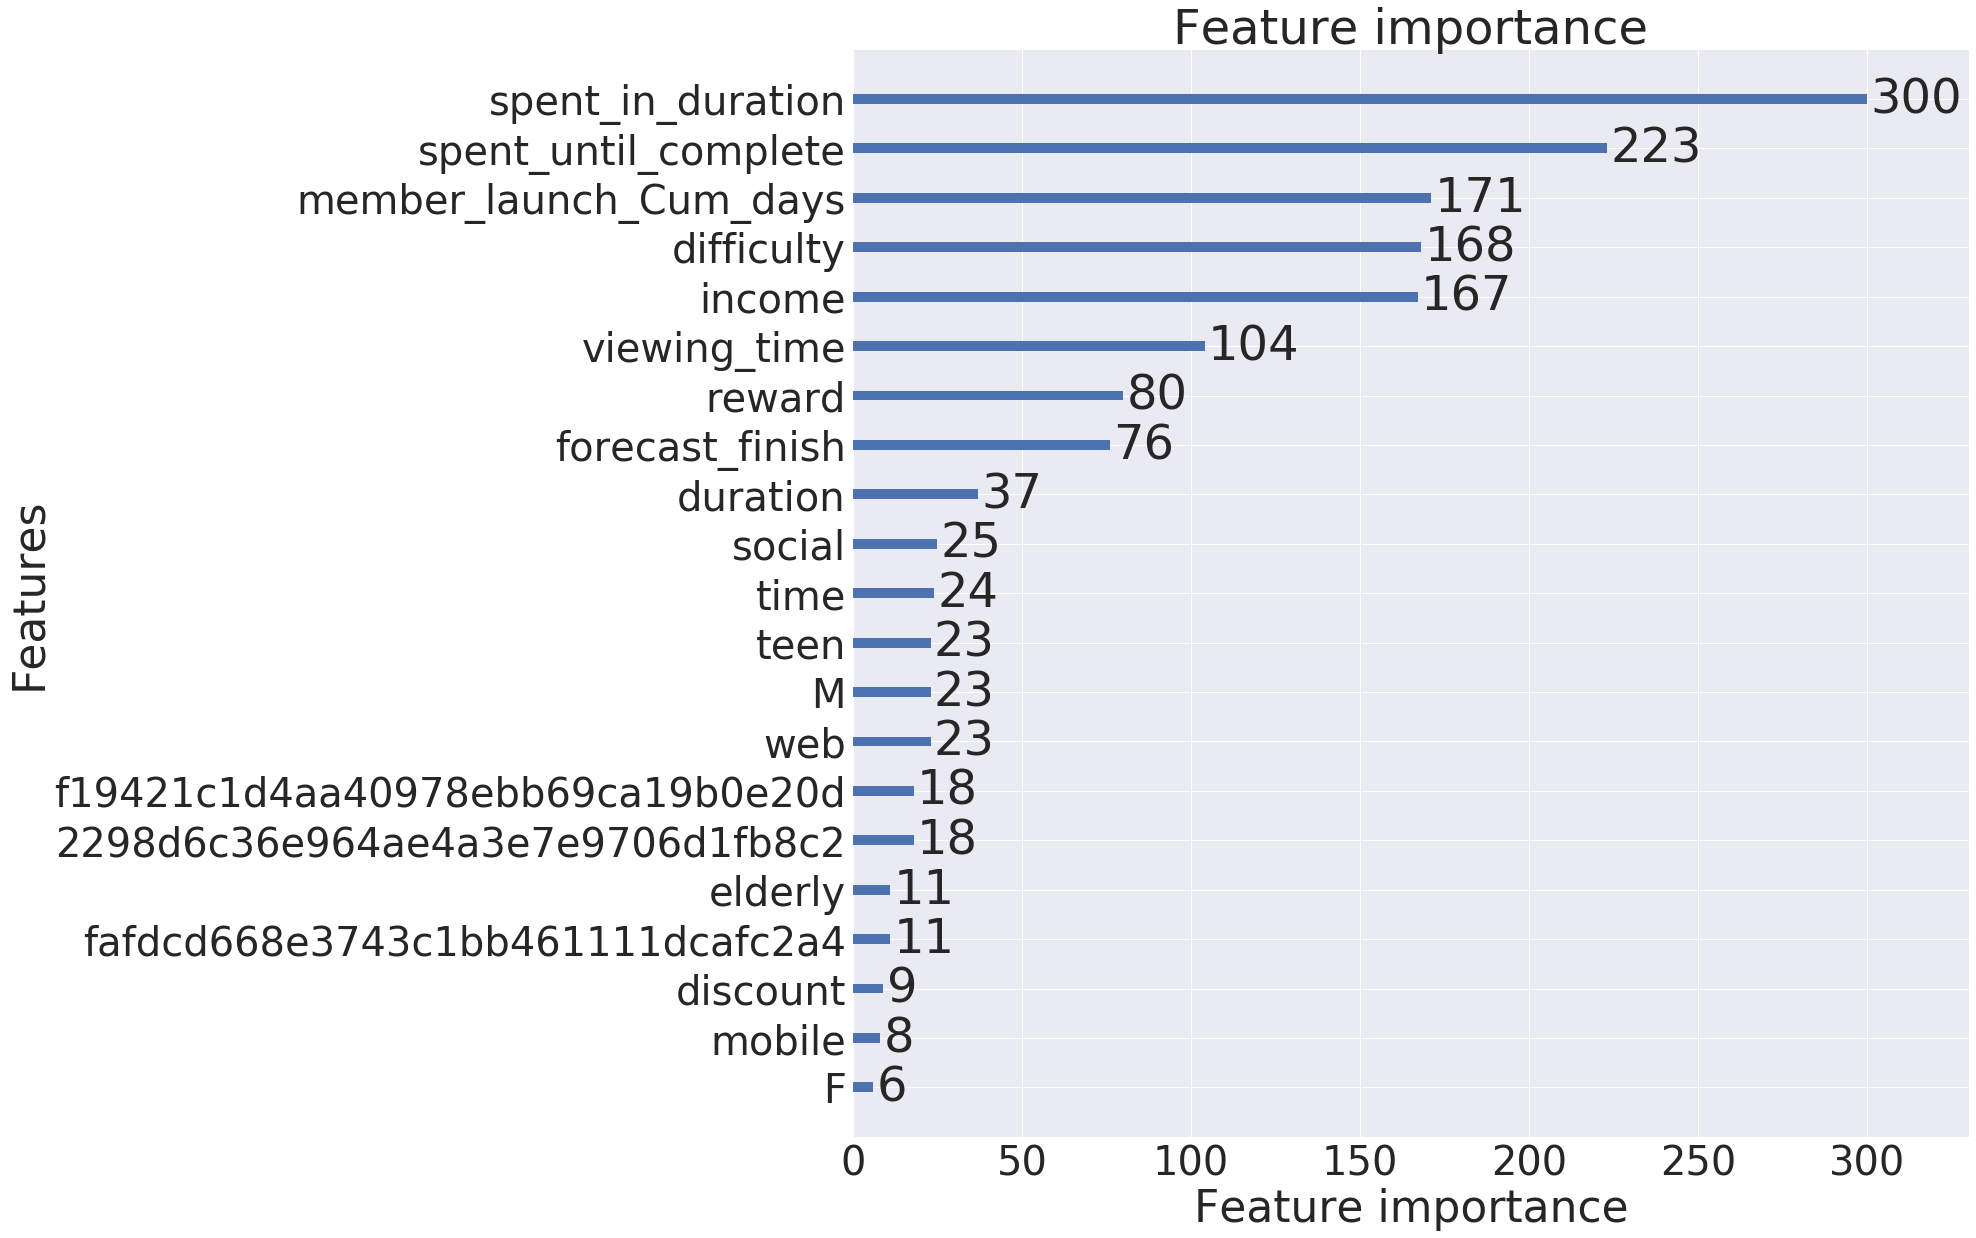

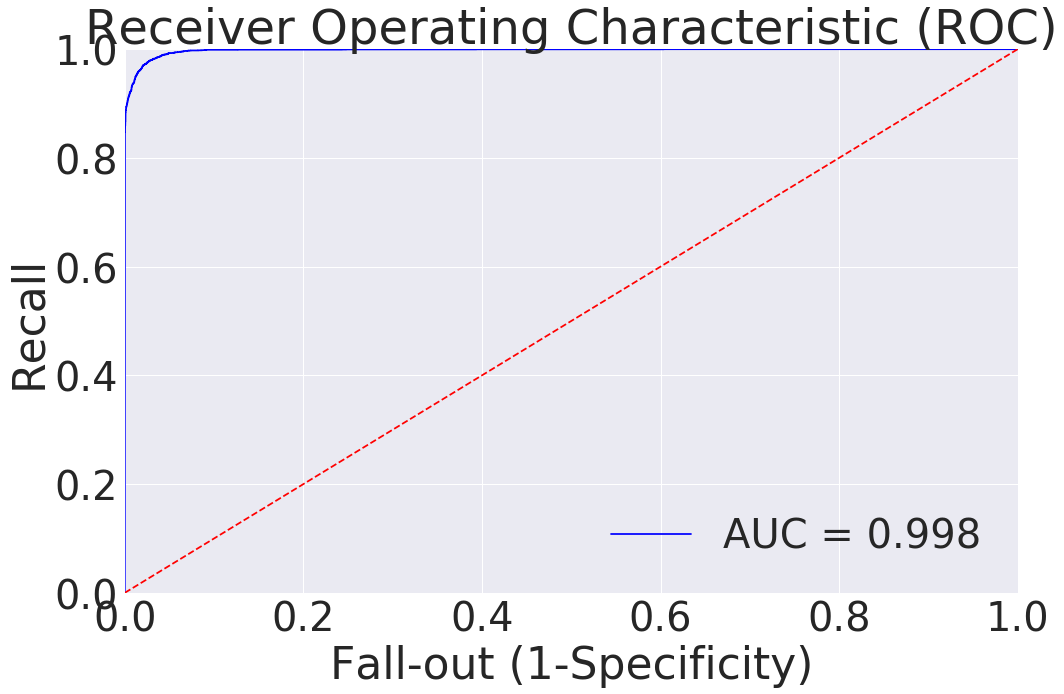

roc_auc_score: 0.9746763047364562


<Figure size 1152x720 with 0 Axes>

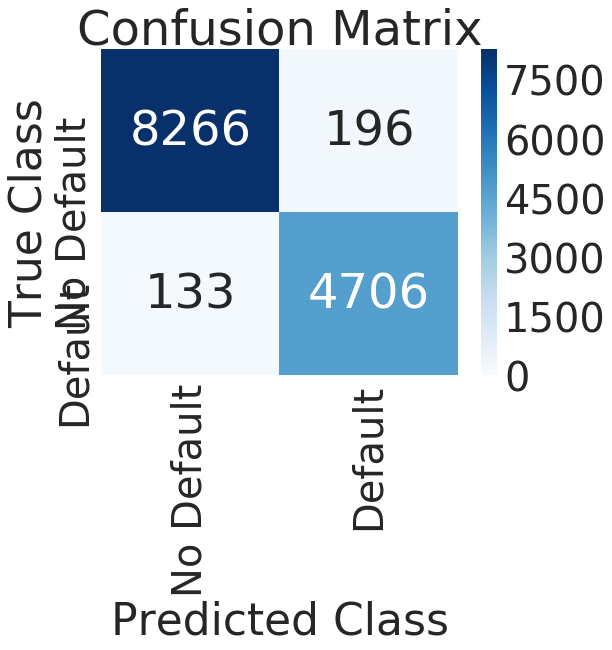

In [427]:
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc

lgb.plot_importance(lgbm, max_num_features=21, importance_type='split',figsize= (20,20))

#Print accuracy
auc_lgbm = roc_auc_score(y_test,predictions_lgbm_01)
print('roc_auc_score of Light GBM model:', auc_lgbm)
print('Precision Metric:',precision_score(y_test, predictions_lgbm_01))
print('Recall Metric:',recall_score(y_test, predictions_lgbm_01))
#Print Area Under Curve
plt.figure(figsize=(16, 10))
false_positive_rate, recall, thresholds = roc_curve(y_test, predictions_lgbm_prob)
roc_auc = auc(false_positive_rate, recall)
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out (1-Specificity)')
plt.show()

#roc_auc_score(y_test, predictions)

#print('AUC score:', roc_auc)
print('roc_auc_score:', roc_auc_score(y_test, predictions_lgbm_01))

#Print Confusion Matrix
plt.figure(figsize=(16, 10))
cm = confusion_matrix(y_test, predictions_lgbm_01)
labels = ['No Default', 'Default']
plt.figure(figsize=(8,6))
sns.heatmap(cm, xticklabels = labels, yticklabels = labels, annot = True, fmt='d', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()


# 6.6 CatBoost Model

In [404]:
from catboost import CatBoostClassifier
model_cat = CatBoostClassifier(iterations=4000, learning_rate=0.005, l2_leaf_reg=5, depth=4, rsm=0.98, loss_function= 'Logloss', eval_metric='AUC',use_best_model=True,random_seed=42)
model_cat.fit(X_train,y_train,eval_set=(X_val,Y_val))
preds = model_cat.predict_proba(X_test)
pred = np.where(preds > 0.5, 1, 0) #Turn probability to 0-1 binary output
predss= pred[:,1]

0:	test: 0.9652044	best: 0.9652044 (0)	total: 9.02ms	remaining: 36.1s
1:	test: 0.9653716	best: 0.9653716 (1)	total: 17.8ms	remaining: 35.5s
2:	test: 0.9672300	best: 0.9672300 (2)	total: 26.2ms	remaining: 34.9s
3:	test: 0.9672461	best: 0.9672461 (3)	total: 34.5ms	remaining: 34.5s
4:	test: 0.9672383	best: 0.9672461 (3)	total: 42.7ms	remaining: 34.1s
5:	test: 0.9677039	best: 0.9677039 (5)	total: 50.5ms	remaining: 33.6s
6:	test: 0.9708861	best: 0.9708861 (6)	total: 58.4ms	remaining: 33.3s
7:	test: 0.9711992	best: 0.9711992 (7)	total: 66.6ms	remaining: 33.2s
8:	test: 0.9832969	best: 0.9832969 (8)	total: 74.6ms	remaining: 33.1s
9:	test: 0.9832833	best: 0.9832969 (8)	total: 82.6ms	remaining: 33s
10:	test: 0.9853690	best: 0.9853690 (10)	total: 90.5ms	remaining: 32.8s
11:	test: 0.9853838	best: 0.9853838 (11)	total: 98.6ms	remaining: 32.8s
12:	test: 0.9854480	best: 0.9854480 (12)	total: 107ms	remaining: 32.7s
13:	test: 0.9853419	best: 0.9854480 (12)	total: 115ms	remaining: 32.7s
14:	test: 0.9853

121:	test: 0.9898589	best: 0.9903791 (48)	total: 1.03s	remaining: 32.7s
122:	test: 0.9898466	best: 0.9903791 (48)	total: 1.04s	remaining: 32.7s
123:	test: 0.9899342	best: 0.9903791 (48)	total: 1.04s	remaining: 32.7s
124:	test: 0.9899368	best: 0.9903791 (48)	total: 1.05s	remaining: 32.7s
125:	test: 0.9899604	best: 0.9903791 (48)	total: 1.06s	remaining: 32.7s
126:	test: 0.9900164	best: 0.9903791 (48)	total: 1.07s	remaining: 32.6s
127:	test: 0.9900742	best: 0.9903791 (48)	total: 1.08s	remaining: 32.6s
128:	test: 0.9900661	best: 0.9903791 (48)	total: 1.09s	remaining: 32.6s
129:	test: 0.9901450	best: 0.9903791 (48)	total: 1.09s	remaining: 32.6s
130:	test: 0.9901697	best: 0.9903791 (48)	total: 1.1s	remaining: 32.6s
131:	test: 0.9901553	best: 0.9903791 (48)	total: 1.11s	remaining: 32.6s
132:	test: 0.9901919	best: 0.9903791 (48)	total: 1.12s	remaining: 32.5s
133:	test: 0.9902266	best: 0.9903791 (48)	total: 1.13s	remaining: 32.5s
134:	test: 0.9902484	best: 0.9903791 (48)	total: 1.14s	remaining:

241:	test: 0.9919018	best: 0.9919018 (241)	total: 2.04s	remaining: 31.6s
242:	test: 0.9918992	best: 0.9919018 (241)	total: 2.04s	remaining: 31.6s
243:	test: 0.9919193	best: 0.9919193 (243)	total: 2.05s	remaining: 31.6s
244:	test: 0.9919256	best: 0.9919256 (244)	total: 2.06s	remaining: 31.6s
245:	test: 0.9919260	best: 0.9919260 (245)	total: 2.07s	remaining: 31.6s
246:	test: 0.9919536	best: 0.9919536 (246)	total: 2.08s	remaining: 31.6s
247:	test: 0.9919736	best: 0.9919736 (247)	total: 2.09s	remaining: 31.6s
248:	test: 0.9919911	best: 0.9919911 (248)	total: 2.1s	remaining: 31.6s
249:	test: 0.9919899	best: 0.9919911 (248)	total: 2.1s	remaining: 31.6s
250:	test: 0.9920196	best: 0.9920196 (250)	total: 2.11s	remaining: 31.6s
251:	test: 0.9920286	best: 0.9920286 (251)	total: 2.12s	remaining: 31.6s
252:	test: 0.9920456	best: 0.9920456 (252)	total: 2.13s	remaining: 31.5s
253:	test: 0.9920494	best: 0.9920494 (253)	total: 2.14s	remaining: 31.5s
254:	test: 0.9920630	best: 0.9920630 (254)	total: 2.1

361:	test: 0.9931980	best: 0.9931980 (361)	total: 3.05s	remaining: 30.7s
362:	test: 0.9932175	best: 0.9932175 (362)	total: 3.06s	remaining: 30.7s
363:	test: 0.9932278	best: 0.9932278 (363)	total: 3.07s	remaining: 30.7s
364:	test: 0.9932366	best: 0.9932366 (364)	total: 3.08s	remaining: 30.6s
365:	test: 0.9932438	best: 0.9932438 (365)	total: 3.09s	remaining: 30.6s
366:	test: 0.9932588	best: 0.9932588 (366)	total: 3.09s	remaining: 30.6s
367:	test: 0.9932882	best: 0.9932882 (367)	total: 3.1s	remaining: 30.6s
368:	test: 0.9933081	best: 0.9933081 (368)	total: 3.11s	remaining: 30.6s
369:	test: 0.9933132	best: 0.9933132 (369)	total: 3.12s	remaining: 30.6s
370:	test: 0.9933253	best: 0.9933253 (370)	total: 3.13s	remaining: 30.6s
371:	test: 0.9933354	best: 0.9933354 (371)	total: 3.14s	remaining: 30.6s
372:	test: 0.9933394	best: 0.9933394 (372)	total: 3.14s	remaining: 30.6s
373:	test: 0.9933427	best: 0.9933427 (373)	total: 3.15s	remaining: 30.6s
374:	test: 0.9933482	best: 0.9933482 (374)	total: 3.

481:	test: 0.9944652	best: 0.9944652 (481)	total: 4.06s	remaining: 29.6s
482:	test: 0.9944694	best: 0.9944694 (482)	total: 4.07s	remaining: 29.6s
483:	test: 0.9944769	best: 0.9944769 (483)	total: 4.08s	remaining: 29.6s
484:	test: 0.9944860	best: 0.9944860 (484)	total: 4.08s	remaining: 29.6s
485:	test: 0.9944956	best: 0.9944956 (485)	total: 4.09s	remaining: 29.6s
486:	test: 0.9945021	best: 0.9945021 (486)	total: 4.1s	remaining: 29.6s
487:	test: 0.9945117	best: 0.9945117 (487)	total: 4.11s	remaining: 29.6s
488:	test: 0.9945242	best: 0.9945242 (488)	total: 4.12s	remaining: 29.6s
489:	test: 0.9945342	best: 0.9945342 (489)	total: 4.13s	remaining: 29.6s
490:	test: 0.9945359	best: 0.9945359 (490)	total: 4.14s	remaining: 29.6s
491:	test: 0.9945459	best: 0.9945459 (491)	total: 4.14s	remaining: 29.6s
492:	test: 0.9945561	best: 0.9945561 (492)	total: 4.15s	remaining: 29.5s
493:	test: 0.9945739	best: 0.9945739 (493)	total: 4.16s	remaining: 29.5s
494:	test: 0.9945786	best: 0.9945786 (494)	total: 4.

603:	test: 0.9952873	best: 0.9952873 (603)	total: 5.07s	remaining: 28.5s
604:	test: 0.9952968	best: 0.9952968 (604)	total: 5.08s	remaining: 28.5s
605:	test: 0.9952978	best: 0.9952978 (605)	total: 5.09s	remaining: 28.5s
606:	test: 0.9953049	best: 0.9953049 (606)	total: 5.1s	remaining: 28.5s
607:	test: 0.9953065	best: 0.9953065 (607)	total: 5.11s	remaining: 28.5s
608:	test: 0.9953097	best: 0.9953097 (608)	total: 5.12s	remaining: 28.5s
609:	test: 0.9953127	best: 0.9953127 (609)	total: 5.13s	remaining: 28.5s
610:	test: 0.9953204	best: 0.9953204 (610)	total: 5.14s	remaining: 28.5s
611:	test: 0.9953216	best: 0.9953216 (611)	total: 5.14s	remaining: 28.5s
612:	test: 0.9953282	best: 0.9953282 (612)	total: 5.15s	remaining: 28.5s
613:	test: 0.9953353	best: 0.9953353 (613)	total: 5.16s	remaining: 28.5s
614:	test: 0.9953417	best: 0.9953417 (614)	total: 5.17s	remaining: 28.5s
615:	test: 0.9953485	best: 0.9953485 (615)	total: 5.18s	remaining: 28.4s
616:	test: 0.9953543	best: 0.9953543 (616)	total: 5.

725:	test: 0.9958302	best: 0.9958302 (725)	total: 6.09s	remaining: 27.5s
726:	test: 0.9958328	best: 0.9958328 (726)	total: 6.1s	remaining: 27.4s
727:	test: 0.9958373	best: 0.9958373 (727)	total: 6.11s	remaining: 27.5s
728:	test: 0.9958396	best: 0.9958396 (728)	total: 6.12s	remaining: 27.4s
729:	test: 0.9958426	best: 0.9958426 (729)	total: 6.12s	remaining: 27.4s
730:	test: 0.9958454	best: 0.9958454 (730)	total: 6.13s	remaining: 27.4s
731:	test: 0.9958502	best: 0.9958502 (731)	total: 6.14s	remaining: 27.4s
732:	test: 0.9958518	best: 0.9958518 (732)	total: 6.15s	remaining: 27.4s
733:	test: 0.9958540	best: 0.9958540 (733)	total: 6.16s	remaining: 27.4s
734:	test: 0.9958604	best: 0.9958604 (734)	total: 6.17s	remaining: 27.4s
735:	test: 0.9958628	best: 0.9958628 (735)	total: 6.17s	remaining: 27.4s
736:	test: 0.9958636	best: 0.9958636 (736)	total: 6.18s	remaining: 27.4s
737:	test: 0.9958658	best: 0.9958658 (737)	total: 6.19s	remaining: 27.4s
738:	test: 0.9958671	best: 0.9958671 (738)	total: 6.

848:	test: 0.9961736	best: 0.9961736 (848)	total: 7.11s	remaining: 26.4s
849:	test: 0.9961767	best: 0.9961767 (849)	total: 7.12s	remaining: 26.4s
850:	test: 0.9961781	best: 0.9961781 (850)	total: 7.13s	remaining: 26.4s
851:	test: 0.9961799	best: 0.9961799 (851)	total: 7.13s	remaining: 26.4s
852:	test: 0.9961828	best: 0.9961828 (852)	total: 7.14s	remaining: 26.4s
853:	test: 0.9961855	best: 0.9961855 (853)	total: 7.15s	remaining: 26.3s
854:	test: 0.9961879	best: 0.9961879 (854)	total: 7.16s	remaining: 26.3s
855:	test: 0.9961903	best: 0.9961903 (855)	total: 7.17s	remaining: 26.3s
856:	test: 0.9961911	best: 0.9961911 (856)	total: 7.18s	remaining: 26.3s
857:	test: 0.9961938	best: 0.9961938 (857)	total: 7.18s	remaining: 26.3s
858:	test: 0.9961961	best: 0.9961961 (858)	total: 7.19s	remaining: 26.3s
859:	test: 0.9961986	best: 0.9961986 (859)	total: 7.2s	remaining: 26.3s
860:	test: 0.9961999	best: 0.9961999 (860)	total: 7.21s	remaining: 26.3s
861:	test: 0.9962030	best: 0.9962030 (861)	total: 7.

971:	test: 0.9964184	best: 0.9964184 (971)	total: 8.13s	remaining: 25.3s
972:	test: 0.9964198	best: 0.9964198 (972)	total: 8.14s	remaining: 25.3s
973:	test: 0.9964219	best: 0.9964219 (973)	total: 8.15s	remaining: 25.3s
974:	test: 0.9964239	best: 0.9964239 (974)	total: 8.15s	remaining: 25.3s
975:	test: 0.9964256	best: 0.9964256 (975)	total: 8.16s	remaining: 25.3s
976:	test: 0.9964274	best: 0.9964274 (976)	total: 8.17s	remaining: 25.3s
977:	test: 0.9964295	best: 0.9964295 (977)	total: 8.18s	remaining: 25.3s
978:	test: 0.9964296	best: 0.9964296 (978)	total: 8.19s	remaining: 25.3s
979:	test: 0.9964302	best: 0.9964302 (979)	total: 8.2s	remaining: 25.3s
980:	test: 0.9964324	best: 0.9964324 (980)	total: 8.2s	remaining: 25.2s
981:	test: 0.9964345	best: 0.9964345 (981)	total: 8.21s	remaining: 25.2s
982:	test: 0.9964369	best: 0.9964369 (982)	total: 8.22s	remaining: 25.2s
983:	test: 0.9964380	best: 0.9964380 (983)	total: 8.23s	remaining: 25.2s
984:	test: 0.9964405	best: 0.9964405 (984)	total: 8.2

1096:	test: 0.9966294	best: 0.9966294 (1096)	total: 9.15s	remaining: 24.2s
1097:	test: 0.9966310	best: 0.9966310 (1097)	total: 9.16s	remaining: 24.2s
1098:	test: 0.9966315	best: 0.9966315 (1098)	total: 9.17s	remaining: 24.2s
1099:	test: 0.9966338	best: 0.9966338 (1099)	total: 9.18s	remaining: 24.2s
1100:	test: 0.9966361	best: 0.9966361 (1100)	total: 9.19s	remaining: 24.2s
1101:	test: 0.9966376	best: 0.9966376 (1101)	total: 9.2s	remaining: 24.2s
1102:	test: 0.9966390	best: 0.9966390 (1102)	total: 9.2s	remaining: 24.2s
1103:	test: 0.9966407	best: 0.9966407 (1103)	total: 9.21s	remaining: 24.2s
1104:	test: 0.9966427	best: 0.9966427 (1104)	total: 9.22s	remaining: 24.2s
1105:	test: 0.9966435	best: 0.9966435 (1105)	total: 9.23s	remaining: 24.1s
1106:	test: 0.9966448	best: 0.9966448 (1106)	total: 9.23s	remaining: 24.1s
1107:	test: 0.9966463	best: 0.9966463 (1107)	total: 9.24s	remaining: 24.1s
1108:	test: 0.9966477	best: 0.9966477 (1108)	total: 9.25s	remaining: 24.1s
1109:	test: 0.9966482	best:

1219:	test: 0.9967985	best: 0.9967986 (1218)	total: 10.2s	remaining: 23.2s
1220:	test: 0.9967993	best: 0.9967993 (1220)	total: 10.2s	remaining: 23.2s
1221:	test: 0.9968006	best: 0.9968006 (1221)	total: 10.2s	remaining: 23.2s
1222:	test: 0.9968017	best: 0.9968017 (1222)	total: 10.2s	remaining: 23.1s
1223:	test: 0.9968022	best: 0.9968022 (1223)	total: 10.2s	remaining: 23.1s
1224:	test: 0.9968034	best: 0.9968034 (1224)	total: 10.2s	remaining: 23.1s
1225:	test: 0.9968044	best: 0.9968044 (1225)	total: 10.2s	remaining: 23.1s
1226:	test: 0.9968062	best: 0.9968062 (1226)	total: 10.2s	remaining: 23.1s
1227:	test: 0.9968074	best: 0.9968074 (1227)	total: 10.2s	remaining: 23.1s
1228:	test: 0.9968094	best: 0.9968094 (1228)	total: 10.2s	remaining: 23.1s
1229:	test: 0.9968106	best: 0.9968106 (1229)	total: 10.2s	remaining: 23.1s
1230:	test: 0.9968121	best: 0.9968121 (1230)	total: 10.3s	remaining: 23.1s
1231:	test: 0.9968131	best: 0.9968131 (1231)	total: 10.3s	remaining: 23.1s
1232:	test: 0.9968143	bes

1343:	test: 0.9969377	best: 0.9969377 (1343)	total: 11.2s	remaining: 22.1s
1344:	test: 0.9969392	best: 0.9969392 (1344)	total: 11.2s	remaining: 22.1s
1345:	test: 0.9969400	best: 0.9969400 (1345)	total: 11.2s	remaining: 22.1s
1346:	test: 0.9969412	best: 0.9969412 (1346)	total: 11.2s	remaining: 22.1s
1347:	test: 0.9969411	best: 0.9969412 (1346)	total: 11.2s	remaining: 22s
1348:	test: 0.9969420	best: 0.9969420 (1348)	total: 11.2s	remaining: 22s
1349:	test: 0.9969435	best: 0.9969435 (1349)	total: 11.2s	remaining: 22s
1350:	test: 0.9969443	best: 0.9969443 (1350)	total: 11.2s	remaining: 22s
1351:	test: 0.9969448	best: 0.9969448 (1351)	total: 11.2s	remaining: 22s
1352:	test: 0.9969454	best: 0.9969454 (1352)	total: 11.2s	remaining: 22s
1353:	test: 0.9969457	best: 0.9969457 (1353)	total: 11.3s	remaining: 22s
1354:	test: 0.9969469	best: 0.9969469 (1354)	total: 11.3s	remaining: 22s
1355:	test: 0.9969482	best: 0.9969482 (1355)	total: 11.3s	remaining: 22s
1356:	test: 0.9969490	best: 0.9969490 (1356

1468:	test: 0.9970442	best: 0.9970442 (1468)	total: 12.2s	remaining: 21s
1469:	test: 0.9970446	best: 0.9970446 (1469)	total: 12.2s	remaining: 21s
1470:	test: 0.9970456	best: 0.9970456 (1470)	total: 12.2s	remaining: 21s
1471:	test: 0.9970463	best: 0.9970463 (1471)	total: 12.2s	remaining: 21s
1472:	test: 0.9970473	best: 0.9970473 (1472)	total: 12.2s	remaining: 21s
1473:	test: 0.9970493	best: 0.9970493 (1473)	total: 12.2s	remaining: 20.9s
1474:	test: 0.9970496	best: 0.9970496 (1474)	total: 12.2s	remaining: 20.9s
1475:	test: 0.9970501	best: 0.9970501 (1475)	total: 12.2s	remaining: 20.9s
1476:	test: 0.9970510	best: 0.9970510 (1476)	total: 12.2s	remaining: 20.9s
1477:	test: 0.9970513	best: 0.9970513 (1477)	total: 12.3s	remaining: 20.9s
1478:	test: 0.9970521	best: 0.9970521 (1478)	total: 12.3s	remaining: 20.9s
1479:	test: 0.9970525	best: 0.9970525 (1479)	total: 12.3s	remaining: 20.9s
1480:	test: 0.9970537	best: 0.9970537 (1480)	total: 12.3s	remaining: 20.9s
1481:	test: 0.9970548	best: 0.99705

1592:	test: 0.9971306	best: 0.9971306 (1592)	total: 13.2s	remaining: 19.9s
1593:	test: 0.9971308	best: 0.9971308 (1593)	total: 13.2s	remaining: 19.9s
1594:	test: 0.9971315	best: 0.9971315 (1594)	total: 13.2s	remaining: 19.9s
1595:	test: 0.9971318	best: 0.9971318 (1595)	total: 13.2s	remaining: 19.9s
1596:	test: 0.9971325	best: 0.9971325 (1596)	total: 13.2s	remaining: 19.9s
1597:	test: 0.9971332	best: 0.9971332 (1597)	total: 13.2s	remaining: 19.9s
1598:	test: 0.9971332	best: 0.9971332 (1597)	total: 13.2s	remaining: 19.9s
1599:	test: 0.9971346	best: 0.9971346 (1599)	total: 13.3s	remaining: 19.9s
1600:	test: 0.9971350	best: 0.9971350 (1600)	total: 13.3s	remaining: 19.9s
1601:	test: 0.9971359	best: 0.9971359 (1601)	total: 13.3s	remaining: 19.9s
1602:	test: 0.9971360	best: 0.9971360 (1602)	total: 13.3s	remaining: 19.9s
1603:	test: 0.9971357	best: 0.9971360 (1602)	total: 13.3s	remaining: 19.8s
1604:	test: 0.9971360	best: 0.9971360 (1604)	total: 13.3s	remaining: 19.8s
1605:	test: 0.9971365	bes

1716:	test: 0.9971961	best: 0.9971961 (1716)	total: 14.2s	remaining: 18.9s
1717:	test: 0.9971984	best: 0.9971984 (1717)	total: 14.2s	remaining: 18.9s
1718:	test: 0.9971993	best: 0.9971993 (1718)	total: 14.2s	remaining: 18.9s
1719:	test: 0.9972001	best: 0.9972001 (1719)	total: 14.3s	remaining: 18.9s
1720:	test: 0.9971998	best: 0.9972001 (1719)	total: 14.3s	remaining: 18.9s
1721:	test: 0.9972003	best: 0.9972003 (1721)	total: 14.3s	remaining: 18.9s
1722:	test: 0.9972004	best: 0.9972004 (1722)	total: 14.3s	remaining: 18.9s
1723:	test: 0.9972003	best: 0.9972004 (1722)	total: 14.3s	remaining: 18.9s
1724:	test: 0.9972006	best: 0.9972006 (1724)	total: 14.3s	remaining: 18.9s
1725:	test: 0.9972009	best: 0.9972009 (1725)	total: 14.3s	remaining: 18.8s
1726:	test: 0.9972006	best: 0.9972009 (1725)	total: 14.3s	remaining: 18.8s
1727:	test: 0.9972007	best: 0.9972009 (1725)	total: 14.3s	remaining: 18.8s
1728:	test: 0.9972017	best: 0.9972017 (1728)	total: 14.3s	remaining: 18.8s
1729:	test: 0.9972031	bes

1841:	test: 0.9972509	best: 0.9972509 (1841)	total: 15.3s	remaining: 17.9s
1842:	test: 0.9972512	best: 0.9972512 (1842)	total: 15.3s	remaining: 17.9s
1843:	test: 0.9972520	best: 0.9972520 (1843)	total: 15.3s	remaining: 17.9s
1844:	test: 0.9972518	best: 0.9972520 (1843)	total: 15.3s	remaining: 17.8s
1845:	test: 0.9972526	best: 0.9972526 (1845)	total: 15.3s	remaining: 17.8s
1846:	test: 0.9972534	best: 0.9972534 (1846)	total: 15.3s	remaining: 17.8s
1847:	test: 0.9972537	best: 0.9972537 (1847)	total: 15.3s	remaining: 17.8s
1848:	test: 0.9972540	best: 0.9972540 (1848)	total: 15.3s	remaining: 17.8s
1849:	test: 0.9972542	best: 0.9972542 (1849)	total: 15.3s	remaining: 17.8s
1850:	test: 0.9972546	best: 0.9972546 (1850)	total: 15.3s	remaining: 17.8s
1851:	test: 0.9972551	best: 0.9972551 (1851)	total: 15.3s	remaining: 17.8s
1852:	test: 0.9972558	best: 0.9972558 (1852)	total: 15.3s	remaining: 17.8s
1853:	test: 0.9972560	best: 0.9972560 (1853)	total: 15.4s	remaining: 17.8s
1854:	test: 0.9972566	bes

1966:	test: 0.9973054	best: 0.9973054 (1966)	total: 16.3s	remaining: 16.8s
1967:	test: 0.9973057	best: 0.9973057 (1967)	total: 16.3s	remaining: 16.8s
1968:	test: 0.9973063	best: 0.9973063 (1968)	total: 16.3s	remaining: 16.8s
1969:	test: 0.9973064	best: 0.9973064 (1969)	total: 16.3s	remaining: 16.8s
1970:	test: 0.9973065	best: 0.9973065 (1970)	total: 16.3s	remaining: 16.8s
1971:	test: 0.9973071	best: 0.9973071 (1971)	total: 16.3s	remaining: 16.8s
1972:	test: 0.9973071	best: 0.9973071 (1972)	total: 16.3s	remaining: 16.8s
1973:	test: 0.9973073	best: 0.9973073 (1973)	total: 16.3s	remaining: 16.8s
1974:	test: 0.9973080	best: 0.9973080 (1974)	total: 16.3s	remaining: 16.8s
1975:	test: 0.9973079	best: 0.9973080 (1974)	total: 16.4s	remaining: 16.7s
1976:	test: 0.9973085	best: 0.9973085 (1976)	total: 16.4s	remaining: 16.7s
1977:	test: 0.9973092	best: 0.9973092 (1977)	total: 16.4s	remaining: 16.7s
1978:	test: 0.9973094	best: 0.9973094 (1978)	total: 16.4s	remaining: 16.7s
1979:	test: 0.9973097	bes

2090:	test: 0.9973475	best: 0.9973475 (2090)	total: 17.3s	remaining: 15.8s
2091:	test: 0.9973481	best: 0.9973481 (2091)	total: 17.3s	remaining: 15.8s
2092:	test: 0.9973484	best: 0.9973484 (2092)	total: 17.3s	remaining: 15.8s
2093:	test: 0.9973485	best: 0.9973485 (2093)	total: 17.3s	remaining: 15.8s
2094:	test: 0.9973488	best: 0.9973488 (2094)	total: 17.3s	remaining: 15.8s
2095:	test: 0.9973489	best: 0.9973489 (2095)	total: 17.3s	remaining: 15.8s
2096:	test: 0.9973501	best: 0.9973501 (2096)	total: 17.4s	remaining: 15.7s
2097:	test: 0.9973501	best: 0.9973501 (2096)	total: 17.4s	remaining: 15.7s
2098:	test: 0.9973502	best: 0.9973502 (2098)	total: 17.4s	remaining: 15.7s
2099:	test: 0.9973505	best: 0.9973505 (2099)	total: 17.4s	remaining: 15.7s
2100:	test: 0.9973508	best: 0.9973508 (2100)	total: 17.4s	remaining: 15.7s
2101:	test: 0.9973512	best: 0.9973512 (2101)	total: 17.4s	remaining: 15.7s
2102:	test: 0.9973516	best: 0.9973516 (2102)	total: 17.4s	remaining: 15.7s
2103:	test: 0.9973517	bes

2214:	test: 0.9973846	best: 0.9973846 (2214)	total: 18.3s	remaining: 14.8s
2215:	test: 0.9973849	best: 0.9973849 (2215)	total: 18.3s	remaining: 14.8s
2216:	test: 0.9973851	best: 0.9973851 (2216)	total: 18.3s	remaining: 14.7s
2217:	test: 0.9973844	best: 0.9973851 (2216)	total: 18.3s	remaining: 14.7s
2218:	test: 0.9973849	best: 0.9973851 (2216)	total: 18.3s	remaining: 14.7s
2219:	test: 0.9973851	best: 0.9973851 (2216)	total: 18.4s	remaining: 14.7s
2220:	test: 0.9973851	best: 0.9973851 (2216)	total: 18.4s	remaining: 14.7s
2221:	test: 0.9973852	best: 0.9973852 (2221)	total: 18.4s	remaining: 14.7s
2222:	test: 0.9973856	best: 0.9973856 (2222)	total: 18.4s	remaining: 14.7s
2223:	test: 0.9973857	best: 0.9973857 (2223)	total: 18.4s	remaining: 14.7s
2224:	test: 0.9973861	best: 0.9973861 (2224)	total: 18.4s	remaining: 14.7s
2225:	test: 0.9973862	best: 0.9973862 (2225)	total: 18.4s	remaining: 14.7s
2226:	test: 0.9973863	best: 0.9973863 (2226)	total: 18.4s	remaining: 14.7s
2227:	test: 0.9973863	bes

2338:	test: 0.9974157	best: 0.9974157 (2338)	total: 19.3s	remaining: 13.7s
2339:	test: 0.9974160	best: 0.9974160 (2339)	total: 19.3s	remaining: 13.7s
2340:	test: 0.9974162	best: 0.9974162 (2340)	total: 19.4s	remaining: 13.7s
2341:	test: 0.9974158	best: 0.9974162 (2340)	total: 19.4s	remaining: 13.7s
2342:	test: 0.9974162	best: 0.9974162 (2340)	total: 19.4s	remaining: 13.7s
2343:	test: 0.9974165	best: 0.9974165 (2343)	total: 19.4s	remaining: 13.7s
2344:	test: 0.9974162	best: 0.9974165 (2343)	total: 19.4s	remaining: 13.7s
2345:	test: 0.9974165	best: 0.9974165 (2343)	total: 19.4s	remaining: 13.7s
2346:	test: 0.9974168	best: 0.9974168 (2346)	total: 19.4s	remaining: 13.7s
2347:	test: 0.9974171	best: 0.9974171 (2347)	total: 19.4s	remaining: 13.7s
2348:	test: 0.9974169	best: 0.9974171 (2347)	total: 19.4s	remaining: 13.6s
2349:	test: 0.9974170	best: 0.9974171 (2347)	total: 19.4s	remaining: 13.6s
2350:	test: 0.9974172	best: 0.9974172 (2350)	total: 19.4s	remaining: 13.6s
2351:	test: 0.9974175	bes

2463:	test: 0.9974469	best: 0.9974469 (2463)	total: 20.4s	remaining: 12.7s
2464:	test: 0.9974472	best: 0.9974472 (2464)	total: 20.4s	remaining: 12.7s
2465:	test: 0.9974477	best: 0.9974477 (2465)	total: 20.4s	remaining: 12.7s
2466:	test: 0.9974480	best: 0.9974480 (2466)	total: 20.4s	remaining: 12.7s
2467:	test: 0.9974484	best: 0.9974484 (2467)	total: 20.4s	remaining: 12.7s
2468:	test: 0.9974483	best: 0.9974484 (2467)	total: 20.4s	remaining: 12.6s
2469:	test: 0.9974487	best: 0.9974487 (2469)	total: 20.4s	remaining: 12.6s
2470:	test: 0.9974484	best: 0.9974487 (2469)	total: 20.4s	remaining: 12.6s
2471:	test: 0.9974487	best: 0.9974487 (2471)	total: 20.4s	remaining: 12.6s
2472:	test: 0.9974494	best: 0.9974494 (2472)	total: 20.4s	remaining: 12.6s
2473:	test: 0.9974499	best: 0.9974499 (2473)	total: 20.4s	remaining: 12.6s
2474:	test: 0.9974500	best: 0.9974500 (2474)	total: 20.4s	remaining: 12.6s
2475:	test: 0.9974502	best: 0.9974502 (2475)	total: 20.5s	remaining: 12.6s
2476:	test: 0.9974506	bes

2588:	test: 0.9974742	best: 0.9974743 (2587)	total: 21.4s	remaining: 11.7s
2589:	test: 0.9974745	best: 0.9974745 (2589)	total: 21.4s	remaining: 11.6s
2590:	test: 0.9974750	best: 0.9974750 (2590)	total: 21.4s	remaining: 11.6s
2591:	test: 0.9974750	best: 0.9974750 (2590)	total: 21.4s	remaining: 11.6s
2592:	test: 0.9974749	best: 0.9974750 (2590)	total: 21.4s	remaining: 11.6s
2593:	test: 0.9974750	best: 0.9974750 (2590)	total: 21.4s	remaining: 11.6s
2594:	test: 0.9974749	best: 0.9974750 (2590)	total: 21.4s	remaining: 11.6s
2595:	test: 0.9974758	best: 0.9974758 (2595)	total: 21.4s	remaining: 11.6s
2596:	test: 0.9974760	best: 0.9974760 (2596)	total: 21.5s	remaining: 11.6s
2597:	test: 0.9974762	best: 0.9974762 (2597)	total: 21.5s	remaining: 11.6s
2598:	test: 0.9974767	best: 0.9974767 (2598)	total: 21.5s	remaining: 11.6s
2599:	test: 0.9974772	best: 0.9974772 (2599)	total: 21.5s	remaining: 11.6s
2600:	test: 0.9974775	best: 0.9974775 (2600)	total: 21.5s	remaining: 11.6s
2601:	test: 0.9974778	bes

2713:	test: 0.9974978	best: 0.9974978 (2713)	total: 22.4s	remaining: 10.6s
2714:	test: 0.9974973	best: 0.9974978 (2713)	total: 22.4s	remaining: 10.6s
2715:	test: 0.9974977	best: 0.9974978 (2713)	total: 22.4s	remaining: 10.6s
2716:	test: 0.9974980	best: 0.9974980 (2716)	total: 22.4s	remaining: 10.6s
2717:	test: 0.9974980	best: 0.9974980 (2716)	total: 22.4s	remaining: 10.6s
2718:	test: 0.9974978	best: 0.9974980 (2716)	total: 22.5s	remaining: 10.6s
2719:	test: 0.9974982	best: 0.9974982 (2719)	total: 22.5s	remaining: 10.6s
2720:	test: 0.9974983	best: 0.9974983 (2720)	total: 22.5s	remaining: 10.6s
2721:	test: 0.9974982	best: 0.9974983 (2720)	total: 22.5s	remaining: 10.6s
2722:	test: 0.9974983	best: 0.9974983 (2722)	total: 22.5s	remaining: 10.5s
2723:	test: 0.9974981	best: 0.9974983 (2722)	total: 22.5s	remaining: 10.5s
2724:	test: 0.9974987	best: 0.9974987 (2724)	total: 22.5s	remaining: 10.5s
2725:	test: 0.9974987	best: 0.9974987 (2724)	total: 22.5s	remaining: 10.5s
2726:	test: 0.9974986	bes

2835:	test: 0.9975172	best: 0.9975175 (2834)	total: 23.4s	remaining: 9.61s
2836:	test: 0.9975171	best: 0.9975175 (2834)	total: 23.4s	remaining: 9.61s
2837:	test: 0.9975179	best: 0.9975179 (2837)	total: 23.4s	remaining: 9.6s
2838:	test: 0.9975181	best: 0.9975181 (2838)	total: 23.4s	remaining: 9.59s
2839:	test: 0.9975184	best: 0.9975184 (2839)	total: 23.5s	remaining: 9.58s
2840:	test: 0.9975183	best: 0.9975184 (2839)	total: 23.5s	remaining: 9.57s
2841:	test: 0.9975187	best: 0.9975187 (2841)	total: 23.5s	remaining: 9.56s
2842:	test: 0.9975193	best: 0.9975193 (2842)	total: 23.5s	remaining: 9.56s
2843:	test: 0.9975193	best: 0.9975193 (2842)	total: 23.5s	remaining: 9.55s
2844:	test: 0.9975193	best: 0.9975193 (2844)	total: 23.5s	remaining: 9.54s
2845:	test: 0.9975192	best: 0.9975193 (2844)	total: 23.5s	remaining: 9.53s
2846:	test: 0.9975193	best: 0.9975193 (2844)	total: 23.5s	remaining: 9.52s
2847:	test: 0.9975193	best: 0.9975193 (2844)	total: 23.5s	remaining: 9.52s
2848:	test: 0.9975188	best

2955:	test: 0.9975295	best: 0.9975297 (2954)	total: 24.4s	remaining: 8.63s
2956:	test: 0.9975297	best: 0.9975297 (2954)	total: 24.4s	remaining: 8.62s
2957:	test: 0.9975299	best: 0.9975299 (2957)	total: 24.5s	remaining: 8.61s
2958:	test: 0.9975298	best: 0.9975299 (2957)	total: 24.5s	remaining: 8.61s
2959:	test: 0.9975298	best: 0.9975299 (2957)	total: 24.5s	remaining: 8.6s
2960:	test: 0.9975299	best: 0.9975299 (2957)	total: 24.5s	remaining: 8.59s
2961:	test: 0.9975299	best: 0.9975299 (2961)	total: 24.5s	remaining: 8.58s
2962:	test: 0.9975301	best: 0.9975301 (2962)	total: 24.5s	remaining: 8.57s
2963:	test: 0.9975299	best: 0.9975301 (2962)	total: 24.5s	remaining: 8.56s
2964:	test: 0.9975299	best: 0.9975301 (2962)	total: 24.5s	remaining: 8.56s
2965:	test: 0.9975300	best: 0.9975301 (2962)	total: 24.5s	remaining: 8.55s
2966:	test: 0.9975305	best: 0.9975305 (2966)	total: 24.5s	remaining: 8.54s
2967:	test: 0.9975305	best: 0.9975305 (2967)	total: 24.5s	remaining: 8.53s
2968:	test: 0.9975308	best

3077:	test: 0.9975435	best: 0.9975441 (3068)	total: 25.5s	remaining: 7.62s
3078:	test: 0.9975434	best: 0.9975441 (3068)	total: 25.5s	remaining: 7.62s
3079:	test: 0.9975440	best: 0.9975441 (3068)	total: 25.5s	remaining: 7.61s
3080:	test: 0.9975441	best: 0.9975441 (3068)	total: 25.5s	remaining: 7.6s
3081:	test: 0.9975442	best: 0.9975442 (3081)	total: 25.5s	remaining: 7.59s
3082:	test: 0.9975445	best: 0.9975445 (3082)	total: 25.5s	remaining: 7.58s
3083:	test: 0.9975446	best: 0.9975446 (3083)	total: 25.5s	remaining: 7.58s
3084:	test: 0.9975445	best: 0.9975446 (3083)	total: 25.5s	remaining: 7.57s
3085:	test: 0.9975446	best: 0.9975446 (3085)	total: 25.5s	remaining: 7.56s
3086:	test: 0.9975447	best: 0.9975447 (3086)	total: 25.5s	remaining: 7.55s
3087:	test: 0.9975448	best: 0.9975448 (3087)	total: 25.5s	remaining: 7.54s
3088:	test: 0.9975459	best: 0.9975459 (3088)	total: 25.5s	remaining: 7.53s
3089:	test: 0.9975458	best: 0.9975459 (3088)	total: 25.6s	remaining: 7.53s
3090:	test: 0.9975457	best

3200:	test: 0.9975656	best: 0.9975656 (3200)	total: 26.5s	remaining: 6.61s
3201:	test: 0.9975657	best: 0.9975657 (3201)	total: 26.5s	remaining: 6.6s
3202:	test: 0.9975660	best: 0.9975660 (3202)	total: 26.5s	remaining: 6.59s
3203:	test: 0.9975660	best: 0.9975660 (3202)	total: 26.5s	remaining: 6.58s
3204:	test: 0.9975658	best: 0.9975660 (3202)	total: 26.5s	remaining: 6.57s
3205:	test: 0.9975658	best: 0.9975660 (3202)	total: 26.5s	remaining: 6.57s
3206:	test: 0.9975658	best: 0.9975660 (3202)	total: 26.5s	remaining: 6.56s
3207:	test: 0.9975657	best: 0.9975660 (3202)	total: 26.5s	remaining: 6.55s
3208:	test: 0.9975658	best: 0.9975660 (3202)	total: 26.5s	remaining: 6.54s
3209:	test: 0.9975659	best: 0.9975660 (3202)	total: 26.5s	remaining: 6.53s
3210:	test: 0.9975660	best: 0.9975660 (3210)	total: 26.6s	remaining: 6.53s
3211:	test: 0.9975665	best: 0.9975665 (3211)	total: 26.6s	remaining: 6.52s
3212:	test: 0.9975665	best: 0.9975665 (3211)	total: 26.6s	remaining: 6.51s
3213:	test: 0.9975664	best

3323:	test: 0.9975815	best: 0.9975815 (3323)	total: 27.5s	remaining: 5.59s
3324:	test: 0.9975817	best: 0.9975817 (3324)	total: 27.5s	remaining: 5.58s
3325:	test: 0.9975816	best: 0.9975817 (3324)	total: 27.5s	remaining: 5.57s
3326:	test: 0.9975816	best: 0.9975817 (3324)	total: 27.5s	remaining: 5.57s
3327:	test: 0.9975820	best: 0.9975820 (3327)	total: 27.5s	remaining: 5.56s
3328:	test: 0.9975821	best: 0.9975821 (3328)	total: 27.5s	remaining: 5.55s
3329:	test: 0.9975821	best: 0.9975821 (3329)	total: 27.5s	remaining: 5.54s
3330:	test: 0.9975823	best: 0.9975823 (3330)	total: 27.6s	remaining: 5.53s
3331:	test: 0.9975825	best: 0.9975825 (3331)	total: 27.6s	remaining: 5.53s
3332:	test: 0.9975826	best: 0.9975826 (3332)	total: 27.6s	remaining: 5.52s
3333:	test: 0.9975827	best: 0.9975827 (3333)	total: 27.6s	remaining: 5.51s
3334:	test: 0.9975830	best: 0.9975830 (3334)	total: 27.6s	remaining: 5.5s
3335:	test: 0.9975831	best: 0.9975831 (3335)	total: 27.6s	remaining: 5.49s
3336:	test: 0.9975833	best

3447:	test: 0.9975961	best: 0.9975961 (3447)	total: 28.5s	remaining: 4.57s
3448:	test: 0.9975962	best: 0.9975962 (3448)	total: 28.5s	remaining: 4.56s
3449:	test: 0.9975965	best: 0.9975965 (3449)	total: 28.5s	remaining: 4.55s
3450:	test: 0.9975967	best: 0.9975967 (3450)	total: 28.5s	remaining: 4.54s
3451:	test: 0.9975969	best: 0.9975969 (3451)	total: 28.6s	remaining: 4.53s
3452:	test: 0.9975969	best: 0.9975969 (3451)	total: 28.6s	remaining: 4.52s
3453:	test: 0.9975968	best: 0.9975969 (3451)	total: 28.6s	remaining: 4.52s
3454:	test: 0.9975970	best: 0.9975970 (3454)	total: 28.6s	remaining: 4.51s
3455:	test: 0.9975976	best: 0.9975976 (3455)	total: 28.6s	remaining: 4.5s
3456:	test: 0.9975975	best: 0.9975976 (3455)	total: 28.6s	remaining: 4.49s
3457:	test: 0.9975976	best: 0.9975976 (3457)	total: 28.6s	remaining: 4.48s
3458:	test: 0.9975975	best: 0.9975976 (3457)	total: 28.6s	remaining: 4.47s
3459:	test: 0.9975979	best: 0.9975979 (3459)	total: 28.6s	remaining: 4.47s
3460:	test: 0.9975981	best

3569:	test: 0.9976095	best: 0.9976096 (3564)	total: 29.5s	remaining: 3.56s
3570:	test: 0.9976097	best: 0.9976097 (3570)	total: 29.6s	remaining: 3.55s
3571:	test: 0.9976097	best: 0.9976097 (3570)	total: 29.6s	remaining: 3.54s
3572:	test: 0.9976097	best: 0.9976097 (3570)	total: 29.6s	remaining: 3.53s
3573:	test: 0.9976099	best: 0.9976099 (3573)	total: 29.6s	remaining: 3.52s
3574:	test: 0.9976104	best: 0.9976104 (3574)	total: 29.6s	remaining: 3.52s
3575:	test: 0.9976103	best: 0.9976104 (3574)	total: 29.6s	remaining: 3.51s
3576:	test: 0.9976102	best: 0.9976104 (3574)	total: 29.6s	remaining: 3.5s
3577:	test: 0.9976104	best: 0.9976104 (3577)	total: 29.6s	remaining: 3.49s
3578:	test: 0.9976103	best: 0.9976104 (3577)	total: 29.6s	remaining: 3.48s
3579:	test: 0.9976105	best: 0.9976105 (3579)	total: 29.6s	remaining: 3.48s
3580:	test: 0.9976104	best: 0.9976105 (3579)	total: 29.6s	remaining: 3.47s
3581:	test: 0.9976110	best: 0.9976110 (3581)	total: 29.6s	remaining: 3.46s
3582:	test: 0.9976108	best

3692:	test: 0.9976235	best: 0.9976235 (3692)	total: 30.6s	remaining: 2.54s
3693:	test: 0.9976236	best: 0.9976236 (3693)	total: 30.6s	remaining: 2.53s
3694:	test: 0.9976236	best: 0.9976236 (3693)	total: 30.6s	remaining: 2.52s
3695:	test: 0.9976237	best: 0.9976237 (3695)	total: 30.6s	remaining: 2.52s
3696:	test: 0.9976239	best: 0.9976239 (3696)	total: 30.6s	remaining: 2.51s
3697:	test: 0.9976239	best: 0.9976239 (3697)	total: 30.6s	remaining: 2.5s
3698:	test: 0.9976238	best: 0.9976239 (3697)	total: 30.6s	remaining: 2.49s
3699:	test: 0.9976241	best: 0.9976241 (3699)	total: 30.6s	remaining: 2.48s
3700:	test: 0.9976242	best: 0.9976242 (3700)	total: 30.6s	remaining: 2.47s
3701:	test: 0.9976242	best: 0.9976242 (3700)	total: 30.6s	remaining: 2.47s
3702:	test: 0.9976242	best: 0.9976242 (3702)	total: 30.6s	remaining: 2.46s
3703:	test: 0.9976243	best: 0.9976243 (3703)	total: 30.7s	remaining: 2.45s
3704:	test: 0.9976242	best: 0.9976243 (3703)	total: 30.7s	remaining: 2.44s
3705:	test: 0.9976245	best

3815:	test: 0.9976363	best: 0.9976364 (3814)	total: 31.6s	remaining: 1.52s
3816:	test: 0.9976366	best: 0.9976366 (3816)	total: 31.6s	remaining: 1.51s
3817:	test: 0.9976368	best: 0.9976368 (3817)	total: 31.6s	remaining: 1.51s
3818:	test: 0.9976367	best: 0.9976368 (3817)	total: 31.6s	remaining: 1.5s
3819:	test: 0.9976369	best: 0.9976369 (3819)	total: 31.6s	remaining: 1.49s
3820:	test: 0.9976369	best: 0.9976369 (3819)	total: 31.6s	remaining: 1.48s
3821:	test: 0.9976369	best: 0.9976369 (3819)	total: 31.6s	remaining: 1.47s
3822:	test: 0.9976367	best: 0.9976369 (3819)	total: 31.6s	remaining: 1.47s
3823:	test: 0.9976370	best: 0.9976370 (3823)	total: 31.7s	remaining: 1.46s
3824:	test: 0.9976377	best: 0.9976377 (3824)	total: 31.7s	remaining: 1.45s
3825:	test: 0.9976375	best: 0.9976377 (3824)	total: 31.7s	remaining: 1.44s
3826:	test: 0.9976376	best: 0.9976377 (3824)	total: 31.7s	remaining: 1.43s
3827:	test: 0.9976375	best: 0.9976377 (3824)	total: 31.7s	remaining: 1.42s
3828:	test: 0.9976379	best

3935:	test: 0.9976482	best: 0.9976484 (3932)	total: 32.6s	remaining: 530ms
3936:	test: 0.9976482	best: 0.9976484 (3932)	total: 32.6s	remaining: 522ms
3937:	test: 0.9976489	best: 0.9976489 (3937)	total: 32.6s	remaining: 513ms
3938:	test: 0.9976491	best: 0.9976491 (3938)	total: 32.6s	remaining: 505ms
3939:	test: 0.9976489	best: 0.9976491 (3938)	total: 32.6s	remaining: 497ms
3940:	test: 0.9976489	best: 0.9976491 (3938)	total: 32.6s	remaining: 488ms
3941:	test: 0.9976489	best: 0.9976491 (3938)	total: 32.6s	remaining: 480ms
3942:	test: 0.9976495	best: 0.9976495 (3942)	total: 32.6s	remaining: 472ms
3943:	test: 0.9976496	best: 0.9976496 (3943)	total: 32.7s	remaining: 464ms
3944:	test: 0.9976497	best: 0.9976497 (3944)	total: 32.7s	remaining: 455ms
3945:	test: 0.9976498	best: 0.9976498 (3945)	total: 32.7s	remaining: 447ms
3946:	test: 0.9976501	best: 0.9976501 (3946)	total: 32.7s	remaining: 439ms
3947:	test: 0.9976500	best: 0.9976501 (3946)	total: 32.7s	remaining: 431ms
3948:	test: 0.9976500	bes

In [407]:
from sklearn.model_selection import RandomizedSearchCV
grid = {
    'learning_rate': [0.03,0.05, 0.1],
    'depth':[3,4, 6,8],
    'l2_leaf_reg': [ 3, 5, 7, 9,11]
}
randm = RandomizedSearchCV(estimator=model_cat, param_distributions = grid, 
                               cv = 4, n_iter = 10, n_jobs=-1)
randm.fit(X_train, y_train,eval_set=(X_val,Y_val))

    # Results from Random Search
print("\n========================================================")
print(" Results from Random Search " )
print("========================================================")    
    
print("\n The best estimator across ALL searched params:\n",
          randm.best_estimator_)
    
print("\n The best score across ALL searched params:\n",
          randm.best_score_)
    
print("\n The best parameters across ALL searched params:\n",
          randm.best_params_)
    
print("\n ========================================================")

0:	test: 0.9771542	best: 0.9771542 (0)	total: 11.5ms	remaining: 45.9s
1:	test: 0.9902436	best: 0.9902436 (1)	total: 22.4ms	remaining: 44.9s
2:	test: 0.9911261	best: 0.9911261 (2)	total: 32.2ms	remaining: 43s
3:	test: 0.9915198	best: 0.9915198 (3)	total: 42.5ms	remaining: 42.5s
4:	test: 0.9926493	best: 0.9926493 (4)	total: 52.6ms	remaining: 42s
5:	test: 0.9930195	best: 0.9930195 (5)	total: 62.8ms	remaining: 41.8s
6:	test: 0.9933480	best: 0.9933480 (6)	total: 73.1ms	remaining: 41.7s
7:	test: 0.9933681	best: 0.9933681 (7)	total: 83.3ms	remaining: 41.5s
8:	test: 0.9938412	best: 0.9938412 (8)	total: 93.6ms	remaining: 41.5s
9:	test: 0.9943230	best: 0.9943230 (9)	total: 105ms	remaining: 41.8s
10:	test: 0.9946734	best: 0.9946734 (10)	total: 115ms	remaining: 41.7s
11:	test: 0.9950644	best: 0.9950644 (11)	total: 126ms	remaining: 41.8s
12:	test: 0.9953013	best: 0.9953013 (12)	total: 136ms	remaining: 41.7s
13:	test: 0.9954427	best: 0.9954427 (13)	total: 146ms	remaining: 41.6s
14:	test: 0.9955274	b

123:	test: 0.9976784	best: 0.9976784 (123)	total: 1.26s	remaining: 39.3s
124:	test: 0.9976762	best: 0.9976784 (123)	total: 1.27s	remaining: 39.3s
125:	test: 0.9976747	best: 0.9976784 (123)	total: 1.28s	remaining: 39.3s
126:	test: 0.9976804	best: 0.9976804 (126)	total: 1.29s	remaining: 39.2s
127:	test: 0.9976772	best: 0.9976804 (126)	total: 1.3s	remaining: 39.2s
128:	test: 0.9976811	best: 0.9976811 (128)	total: 1.31s	remaining: 39.2s
129:	test: 0.9976800	best: 0.9976811 (128)	total: 1.32s	remaining: 39.2s
130:	test: 0.9976769	best: 0.9976811 (128)	total: 1.33s	remaining: 39.2s
131:	test: 0.9976773	best: 0.9976811 (128)	total: 1.34s	remaining: 39.2s
132:	test: 0.9976848	best: 0.9976848 (132)	total: 1.35s	remaining: 39.2s
133:	test: 0.9976876	best: 0.9976876 (133)	total: 1.36s	remaining: 39.1s
134:	test: 0.9976896	best: 0.9976896 (134)	total: 1.37s	remaining: 39.1s
135:	test: 0.9976974	best: 0.9976974 (135)	total: 1.38s	remaining: 39.1s
136:	test: 0.9977014	best: 0.9977014 (136)	total: 1.

247:	test: 0.9977961	best: 0.9978000 (241)	total: 2.5s	remaining: 37.8s
248:	test: 0.9977967	best: 0.9978000 (241)	total: 2.51s	remaining: 37.8s
249:	test: 0.9977993	best: 0.9978000 (241)	total: 2.52s	remaining: 37.8s
250:	test: 0.9977980	best: 0.9978000 (241)	total: 2.53s	remaining: 37.8s
251:	test: 0.9977986	best: 0.9978000 (241)	total: 2.54s	remaining: 37.8s
252:	test: 0.9978017	best: 0.9978017 (252)	total: 2.55s	remaining: 37.8s
253:	test: 0.9977997	best: 0.9978017 (252)	total: 2.56s	remaining: 37.8s
254:	test: 0.9978005	best: 0.9978017 (252)	total: 2.57s	remaining: 37.7s
255:	test: 0.9977981	best: 0.9978017 (252)	total: 2.58s	remaining: 37.7s
256:	test: 0.9977962	best: 0.9978017 (252)	total: 2.59s	remaining: 37.7s
257:	test: 0.9978025	best: 0.9978025 (257)	total: 2.6s	remaining: 37.7s
258:	test: 0.9978021	best: 0.9978025 (257)	total: 2.61s	remaining: 37.7s
259:	test: 0.9978031	best: 0.9978031 (259)	total: 2.62s	remaining: 37.7s
260:	test: 0.9978050	best: 0.9978050 (260)	total: 2.6

370:	test: 0.9978311	best: 0.9978341 (368)	total: 3.73s	remaining: 36.5s
371:	test: 0.9978278	best: 0.9978341 (368)	total: 3.75s	remaining: 36.5s
372:	test: 0.9978282	best: 0.9978341 (368)	total: 3.75s	remaining: 36.5s
373:	test: 0.9978283	best: 0.9978341 (368)	total: 3.77s	remaining: 36.5s
374:	test: 0.9978275	best: 0.9978341 (368)	total: 3.77s	remaining: 36.5s
375:	test: 0.9978280	best: 0.9978341 (368)	total: 3.79s	remaining: 36.5s
376:	test: 0.9978290	best: 0.9978341 (368)	total: 3.79s	remaining: 36.5s
377:	test: 0.9978289	best: 0.9978341 (368)	total: 3.81s	remaining: 36.5s
378:	test: 0.9978299	best: 0.9978341 (368)	total: 3.81s	remaining: 36.5s
379:	test: 0.9978282	best: 0.9978341 (368)	total: 3.83s	remaining: 36.4s
380:	test: 0.9978272	best: 0.9978341 (368)	total: 3.83s	remaining: 36.4s
381:	test: 0.9978275	best: 0.9978341 (368)	total: 3.85s	remaining: 36.4s
382:	test: 0.9978270	best: 0.9978341 (368)	total: 3.85s	remaining: 36.4s
383:	test: 0.9978283	best: 0.9978341 (368)	total: 3

495:	test: 0.9978357	best: 0.9978413 (488)	total: 4.98s	remaining: 35.2s
496:	test: 0.9978384	best: 0.9978413 (488)	total: 4.99s	remaining: 35.2s
497:	test: 0.9978378	best: 0.9978413 (488)	total: 5s	remaining: 35.2s
498:	test: 0.9978347	best: 0.9978413 (488)	total: 5.01s	remaining: 35.2s
499:	test: 0.9978354	best: 0.9978413 (488)	total: 5.02s	remaining: 35.2s
500:	test: 0.9978349	best: 0.9978413 (488)	total: 5.03s	remaining: 35.1s
501:	test: 0.9978351	best: 0.9978413 (488)	total: 5.04s	remaining: 35.1s
502:	test: 0.9978355	best: 0.9978413 (488)	total: 5.05s	remaining: 35.1s
503:	test: 0.9978333	best: 0.9978413 (488)	total: 5.06s	remaining: 35.1s
504:	test: 0.9978344	best: 0.9978413 (488)	total: 5.07s	remaining: 35.1s
505:	test: 0.9978341	best: 0.9978413 (488)	total: 5.08s	remaining: 35.1s
506:	test: 0.9978339	best: 0.9978413 (488)	total: 5.09s	remaining: 35.1s
507:	test: 0.9978339	best: 0.9978413 (488)	total: 5.1s	remaining: 35.1s
508:	test: 0.9978351	best: 0.9978413 (488)	total: 5.11s

619:	test: 0.9978073	best: 0.9978413 (488)	total: 6.22s	remaining: 33.9s
620:	test: 0.9978021	best: 0.9978413 (488)	total: 6.23s	remaining: 33.9s
621:	test: 0.9978027	best: 0.9978413 (488)	total: 6.24s	remaining: 33.9s
622:	test: 0.9978024	best: 0.9978413 (488)	total: 6.25s	remaining: 33.9s
623:	test: 0.9978003	best: 0.9978413 (488)	total: 6.26s	remaining: 33.9s
624:	test: 0.9978002	best: 0.9978413 (488)	total: 6.27s	remaining: 33.9s
625:	test: 0.9978006	best: 0.9978413 (488)	total: 6.28s	remaining: 33.9s
626:	test: 0.9978019	best: 0.9978413 (488)	total: 6.29s	remaining: 33.8s
627:	test: 0.9978012	best: 0.9978413 (488)	total: 6.3s	remaining: 33.8s
628:	test: 0.9978015	best: 0.9978413 (488)	total: 6.31s	remaining: 33.8s
629:	test: 0.9978017	best: 0.9978413 (488)	total: 6.32s	remaining: 33.8s
630:	test: 0.9978030	best: 0.9978413 (488)	total: 6.33s	remaining: 33.8s
631:	test: 0.9978025	best: 0.9978413 (488)	total: 6.34s	remaining: 33.8s
632:	test: 0.9978024	best: 0.9978413 (488)	total: 6.

745:	test: 0.9977723	best: 0.9978413 (488)	total: 7.48s	remaining: 32.6s
746:	test: 0.9977727	best: 0.9978413 (488)	total: 7.49s	remaining: 32.6s
747:	test: 0.9977727	best: 0.9978413 (488)	total: 7.5s	remaining: 32.6s
748:	test: 0.9977720	best: 0.9978413 (488)	total: 7.51s	remaining: 32.6s
749:	test: 0.9977728	best: 0.9978413 (488)	total: 7.52s	remaining: 32.6s
750:	test: 0.9977721	best: 0.9978413 (488)	total: 7.53s	remaining: 32.6s
751:	test: 0.9977727	best: 0.9978413 (488)	total: 7.54s	remaining: 32.5s
752:	test: 0.9977718	best: 0.9978413 (488)	total: 7.55s	remaining: 32.5s
753:	test: 0.9977719	best: 0.9978413 (488)	total: 7.55s	remaining: 32.5s
754:	test: 0.9977698	best: 0.9978413 (488)	total: 7.57s	remaining: 32.5s
755:	test: 0.9977697	best: 0.9978413 (488)	total: 7.58s	remaining: 32.5s
756:	test: 0.9977690	best: 0.9978413 (488)	total: 7.58s	remaining: 32.5s
757:	test: 0.9977676	best: 0.9978413 (488)	total: 7.59s	remaining: 32.5s
758:	test: 0.9977678	best: 0.9978413 (488)	total: 7.

871:	test: 0.9977302	best: 0.9978413 (488)	total: 8.72s	remaining: 31.3s
872:	test: 0.9977318	best: 0.9978413 (488)	total: 8.73s	remaining: 31.3s
873:	test: 0.9977328	best: 0.9978413 (488)	total: 8.74s	remaining: 31.3s
874:	test: 0.9977318	best: 0.9978413 (488)	total: 8.75s	remaining: 31.2s
875:	test: 0.9977319	best: 0.9978413 (488)	total: 8.76s	remaining: 31.2s
876:	test: 0.9977317	best: 0.9978413 (488)	total: 8.77s	remaining: 31.2s
877:	test: 0.9977296	best: 0.9978413 (488)	total: 8.78s	remaining: 31.2s
878:	test: 0.9977299	best: 0.9978413 (488)	total: 8.79s	remaining: 31.2s
879:	test: 0.9977276	best: 0.9978413 (488)	total: 8.79s	remaining: 31.2s
880:	test: 0.9977274	best: 0.9978413 (488)	total: 8.8s	remaining: 31.2s
881:	test: 0.9977274	best: 0.9978413 (488)	total: 8.81s	remaining: 31.2s
882:	test: 0.9977275	best: 0.9978413 (488)	total: 8.82s	remaining: 31.2s
883:	test: 0.9977278	best: 0.9978413 (488)	total: 8.83s	remaining: 31.1s
884:	test: 0.9977291	best: 0.9978413 (488)	total: 8.

997:	test: 0.9977082	best: 0.9978413 (488)	total: 9.95s	remaining: 29.9s
998:	test: 0.9977077	best: 0.9978413 (488)	total: 9.96s	remaining: 29.9s
999:	test: 0.9977092	best: 0.9978413 (488)	total: 9.97s	remaining: 29.9s
1000:	test: 0.9977079	best: 0.9978413 (488)	total: 9.98s	remaining: 29.9s
1001:	test: 0.9977086	best: 0.9978413 (488)	total: 9.99s	remaining: 29.9s
1002:	test: 0.9977086	best: 0.9978413 (488)	total: 10s	remaining: 29.9s
1003:	test: 0.9977083	best: 0.9978413 (488)	total: 10s	remaining: 29.9s
1004:	test: 0.9977082	best: 0.9978413 (488)	total: 10s	remaining: 29.9s
1005:	test: 0.9977077	best: 0.9978413 (488)	total: 10s	remaining: 29.8s
1006:	test: 0.9977079	best: 0.9978413 (488)	total: 10s	remaining: 29.8s
1007:	test: 0.9977076	best: 0.9978413 (488)	total: 10s	remaining: 29.8s
1008:	test: 0.9977077	best: 0.9978413 (488)	total: 10.1s	remaining: 29.8s
1009:	test: 0.9977071	best: 0.9978413 (488)	total: 10.1s	remaining: 29.8s
1010:	test: 0.9977090	best: 0.9978413 (488)	total: 10

1125:	test: 0.9976874	best: 0.9978413 (488)	total: 11.2s	remaining: 28.6s
1126:	test: 0.9976880	best: 0.9978413 (488)	total: 11.2s	remaining: 28.6s
1127:	test: 0.9976894	best: 0.9978413 (488)	total: 11.2s	remaining: 28.6s
1128:	test: 0.9976892	best: 0.9978413 (488)	total: 11.2s	remaining: 28.5s
1129:	test: 0.9976887	best: 0.9978413 (488)	total: 11.2s	remaining: 28.5s
1130:	test: 0.9976869	best: 0.9978413 (488)	total: 11.2s	remaining: 28.5s
1131:	test: 0.9976885	best: 0.9978413 (488)	total: 11.3s	remaining: 28.5s
1132:	test: 0.9976879	best: 0.9978413 (488)	total: 11.3s	remaining: 28.5s
1133:	test: 0.9976872	best: 0.9978413 (488)	total: 11.3s	remaining: 28.5s
1134:	test: 0.9976861	best: 0.9978413 (488)	total: 11.3s	remaining: 28.5s
1135:	test: 0.9976870	best: 0.9978413 (488)	total: 11.3s	remaining: 28.5s
1136:	test: 0.9976869	best: 0.9978413 (488)	total: 11.3s	remaining: 28.5s
1137:	test: 0.9976873	best: 0.9978413 (488)	total: 11.3s	remaining: 28.4s
1138:	test: 0.9976859	best: 0.9978413 

1249:	test: 0.9976749	best: 0.9978413 (488)	total: 12.4s	remaining: 27.3s
1250:	test: 0.9976746	best: 0.9978413 (488)	total: 12.4s	remaining: 27.3s
1251:	test: 0.9976729	best: 0.9978413 (488)	total: 12.4s	remaining: 27.3s
1252:	test: 0.9976723	best: 0.9978413 (488)	total: 12.4s	remaining: 27.3s
1253:	test: 0.9976716	best: 0.9978413 (488)	total: 12.5s	remaining: 27.3s
1254:	test: 0.9976718	best: 0.9978413 (488)	total: 12.5s	remaining: 27.3s
1255:	test: 0.9976710	best: 0.9978413 (488)	total: 12.5s	remaining: 27.3s
1256:	test: 0.9976715	best: 0.9978413 (488)	total: 12.5s	remaining: 27.3s
1257:	test: 0.9976720	best: 0.9978413 (488)	total: 12.5s	remaining: 27.2s
1258:	test: 0.9976716	best: 0.9978413 (488)	total: 12.5s	remaining: 27.2s
1259:	test: 0.9976719	best: 0.9978413 (488)	total: 12.5s	remaining: 27.2s
1260:	test: 0.9976711	best: 0.9978413 (488)	total: 12.5s	remaining: 27.2s
1261:	test: 0.9976712	best: 0.9978413 (488)	total: 12.5s	remaining: 27.2s
1262:	test: 0.9976710	best: 0.9978413 

1374:	test: 0.9976696	best: 0.9978413 (488)	total: 13.7s	remaining: 26.1s
1375:	test: 0.9976686	best: 0.9978413 (488)	total: 13.7s	remaining: 26.1s
1376:	test: 0.9976682	best: 0.9978413 (488)	total: 13.7s	remaining: 26.1s
1377:	test: 0.9976676	best: 0.9978413 (488)	total: 13.7s	remaining: 26s
1378:	test: 0.9976676	best: 0.9978413 (488)	total: 13.7s	remaining: 26s
1379:	test: 0.9976678	best: 0.9978413 (488)	total: 13.7s	remaining: 26s
1380:	test: 0.9976679	best: 0.9978413 (488)	total: 13.7s	remaining: 26s
1381:	test: 0.9976670	best: 0.9978413 (488)	total: 13.7s	remaining: 26s
1382:	test: 0.9976672	best: 0.9978413 (488)	total: 13.7s	remaining: 26s
1383:	test: 0.9976666	best: 0.9978413 (488)	total: 13.7s	remaining: 26s
1384:	test: 0.9976670	best: 0.9978413 (488)	total: 13.8s	remaining: 26s
1385:	test: 0.9976663	best: 0.9978413 (488)	total: 13.8s	remaining: 26s
1386:	test: 0.9976660	best: 0.9978413 (488)	total: 13.8s	remaining: 25.9s
1387:	test: 0.9976662	best: 0.9978413 (488)	total: 13.8s

1501:	test: 0.9976388	best: 0.9978413 (488)	total: 14.9s	remaining: 24.8s
1502:	test: 0.9976386	best: 0.9978413 (488)	total: 14.9s	remaining: 24.8s
1503:	test: 0.9976384	best: 0.9978413 (488)	total: 14.9s	remaining: 24.8s
1504:	test: 0.9976379	best: 0.9978413 (488)	total: 14.9s	remaining: 24.8s
1505:	test: 0.9976397	best: 0.9978413 (488)	total: 14.9s	remaining: 24.7s
1506:	test: 0.9976391	best: 0.9978413 (488)	total: 15s	remaining: 24.7s
1507:	test: 0.9976387	best: 0.9978413 (488)	total: 15s	remaining: 24.7s
1508:	test: 0.9976380	best: 0.9978413 (488)	total: 15s	remaining: 24.7s
1509:	test: 0.9976379	best: 0.9978413 (488)	total: 15s	remaining: 24.7s
1510:	test: 0.9976380	best: 0.9978413 (488)	total: 15s	remaining: 24.7s
1511:	test: 0.9976381	best: 0.9978413 (488)	total: 15s	remaining: 24.7s
1512:	test: 0.9976386	best: 0.9978413 (488)	total: 15s	remaining: 24.7s
1513:	test: 0.9976384	best: 0.9978413 (488)	total: 15s	remaining: 24.7s
1514:	test: 0.9976386	best: 0.9978413 (488)	total: 15s

1630:	test: 0.9976197	best: 0.9978413 (488)	total: 16.1s	remaining: 23.4s
1631:	test: 0.9976197	best: 0.9978413 (488)	total: 16.2s	remaining: 23.4s
1632:	test: 0.9976182	best: 0.9978413 (488)	total: 16.2s	remaining: 23.4s
1633:	test: 0.9976187	best: 0.9978413 (488)	total: 16.2s	remaining: 23.4s
1634:	test: 0.9976190	best: 0.9978413 (488)	total: 16.2s	remaining: 23.4s
1635:	test: 0.9976194	best: 0.9978413 (488)	total: 16.2s	remaining: 23.4s
1636:	test: 0.9976196	best: 0.9978413 (488)	total: 16.2s	remaining: 23.4s
1637:	test: 0.9976198	best: 0.9978413 (488)	total: 16.2s	remaining: 23.4s
1638:	test: 0.9976191	best: 0.9978413 (488)	total: 16.2s	remaining: 23.4s
1639:	test: 0.9976193	best: 0.9978413 (488)	total: 16.2s	remaining: 23.4s
1640:	test: 0.9976201	best: 0.9978413 (488)	total: 16.2s	remaining: 23.3s
1641:	test: 0.9976192	best: 0.9978413 (488)	total: 16.2s	remaining: 23.3s
1642:	test: 0.9976183	best: 0.9978413 (488)	total: 16.3s	remaining: 23.3s
1643:	test: 0.9976195	best: 0.9978413 

1762:	test: 0.9976146	best: 0.9978413 (488)	total: 17.4s	remaining: 22s
1763:	test: 0.9976139	best: 0.9978413 (488)	total: 17.4s	remaining: 22s
1764:	test: 0.9976137	best: 0.9978413 (488)	total: 17.4s	remaining: 22s
1765:	test: 0.9976133	best: 0.9978413 (488)	total: 17.4s	remaining: 22s
1766:	test: 0.9976145	best: 0.9978413 (488)	total: 17.4s	remaining: 22s
1767:	test: 0.9976147	best: 0.9978413 (488)	total: 17.4s	remaining: 22s
1768:	test: 0.9976149	best: 0.9978413 (488)	total: 17.4s	remaining: 22s
1769:	test: 0.9976147	best: 0.9978413 (488)	total: 17.4s	remaining: 22s
1770:	test: 0.9976144	best: 0.9978413 (488)	total: 17.4s	remaining: 21.9s
1771:	test: 0.9976145	best: 0.9978413 (488)	total: 17.4s	remaining: 21.9s
1772:	test: 0.9976138	best: 0.9978413 (488)	total: 17.5s	remaining: 21.9s
1773:	test: 0.9976137	best: 0.9978413 (488)	total: 17.5s	remaining: 21.9s
1774:	test: 0.9976132	best: 0.9978413 (488)	total: 17.5s	remaining: 21.9s
1775:	test: 0.9976133	best: 0.9978413 (488)	total: 17.

1895:	test: 0.9975969	best: 0.9978413 (488)	total: 18.6s	remaining: 20.6s
1896:	test: 0.9975969	best: 0.9978413 (488)	total: 18.6s	remaining: 20.6s
1897:	test: 0.9975963	best: 0.9978413 (488)	total: 18.6s	remaining: 20.6s
1898:	test: 0.9975962	best: 0.9978413 (488)	total: 18.6s	remaining: 20.6s
1899:	test: 0.9975962	best: 0.9978413 (488)	total: 18.6s	remaining: 20.6s
1900:	test: 0.9975962	best: 0.9978413 (488)	total: 18.6s	remaining: 20.6s
1901:	test: 0.9975962	best: 0.9978413 (488)	total: 18.7s	remaining: 20.6s
1902:	test: 0.9975966	best: 0.9978413 (488)	total: 18.7s	remaining: 20.6s
1903:	test: 0.9975971	best: 0.9978413 (488)	total: 18.7s	remaining: 20.6s
1904:	test: 0.9975967	best: 0.9978413 (488)	total: 18.7s	remaining: 20.5s
1905:	test: 0.9975959	best: 0.9978413 (488)	total: 18.7s	remaining: 20.5s
1906:	test: 0.9975959	best: 0.9978413 (488)	total: 18.7s	remaining: 20.5s
1907:	test: 0.9975959	best: 0.9978413 (488)	total: 18.7s	remaining: 20.5s
1908:	test: 0.9975958	best: 0.9978413 

2007:	test: 0.9975891	best: 0.9978413 (488)	total: 19.6s	remaining: 19.5s
2008:	test: 0.9975893	best: 0.9978413 (488)	total: 19.6s	remaining: 19.5s
2009:	test: 0.9975894	best: 0.9978413 (488)	total: 19.6s	remaining: 19.4s
2010:	test: 0.9975878	best: 0.9978413 (488)	total: 19.6s	remaining: 19.4s
2011:	test: 0.9975874	best: 0.9978413 (488)	total: 19.7s	remaining: 19.4s
2012:	test: 0.9975878	best: 0.9978413 (488)	total: 19.7s	remaining: 19.4s
2013:	test: 0.9975880	best: 0.9978413 (488)	total: 19.7s	remaining: 19.4s
2014:	test: 0.9975875	best: 0.9978413 (488)	total: 19.7s	remaining: 19.4s
2015:	test: 0.9975878	best: 0.9978413 (488)	total: 19.7s	remaining: 19.4s
2016:	test: 0.9975875	best: 0.9978413 (488)	total: 19.7s	remaining: 19.4s
2017:	test: 0.9975876	best: 0.9978413 (488)	total: 19.7s	remaining: 19.4s
2018:	test: 0.9975882	best: 0.9978413 (488)	total: 19.7s	remaining: 19.3s
2019:	test: 0.9975883	best: 0.9978413 (488)	total: 19.7s	remaining: 19.3s
2020:	test: 0.9975884	best: 0.9978413 

2122:	test: 0.9975801	best: 0.9978413 (488)	total: 20.7s	remaining: 18.3s
2123:	test: 0.9975802	best: 0.9978413 (488)	total: 20.7s	remaining: 18.3s
2124:	test: 0.9975802	best: 0.9978413 (488)	total: 20.7s	remaining: 18.2s
2125:	test: 0.9975800	best: 0.9978413 (488)	total: 20.7s	remaining: 18.2s
2126:	test: 0.9975800	best: 0.9978413 (488)	total: 20.7s	remaining: 18.2s
2127:	test: 0.9975810	best: 0.9978413 (488)	total: 20.7s	remaining: 18.2s
2128:	test: 0.9975814	best: 0.9978413 (488)	total: 20.7s	remaining: 18.2s
2129:	test: 0.9975820	best: 0.9978413 (488)	total: 20.7s	remaining: 18.2s
2130:	test: 0.9975815	best: 0.9978413 (488)	total: 20.7s	remaining: 18.2s
2131:	test: 0.9975807	best: 0.9978413 (488)	total: 20.7s	remaining: 18.2s
2132:	test: 0.9975806	best: 0.9978413 (488)	total: 20.8s	remaining: 18.2s
2133:	test: 0.9975807	best: 0.9978413 (488)	total: 20.8s	remaining: 18.2s
2134:	test: 0.9975803	best: 0.9978413 (488)	total: 20.8s	remaining: 18.1s
2135:	test: 0.9975802	best: 0.9978413 

2256:	test: 0.9975658	best: 0.9978413 (488)	total: 21.9s	remaining: 16.9s
2257:	test: 0.9975659	best: 0.9978413 (488)	total: 21.9s	remaining: 16.9s
2258:	test: 0.9975655	best: 0.9978413 (488)	total: 21.9s	remaining: 16.9s
2259:	test: 0.9975656	best: 0.9978413 (488)	total: 21.9s	remaining: 16.9s
2260:	test: 0.9975658	best: 0.9978413 (488)	total: 21.9s	remaining: 16.9s
2261:	test: 0.9975658	best: 0.9978413 (488)	total: 21.9s	remaining: 16.8s
2262:	test: 0.9975654	best: 0.9978413 (488)	total: 21.9s	remaining: 16.8s
2263:	test: 0.9975651	best: 0.9978413 (488)	total: 21.9s	remaining: 16.8s
2264:	test: 0.9975651	best: 0.9978413 (488)	total: 21.9s	remaining: 16.8s
2265:	test: 0.9975646	best: 0.9978413 (488)	total: 22s	remaining: 16.8s
2266:	test: 0.9975644	best: 0.9978413 (488)	total: 22s	remaining: 16.8s
2267:	test: 0.9975646	best: 0.9978413 (488)	total: 22s	remaining: 16.8s
2268:	test: 0.9975647	best: 0.9978413 (488)	total: 22s	remaining: 16.8s
2269:	test: 0.9975647	best: 0.9978413 (488)	to

2371:	test: 0.9975728	best: 0.9978413 (488)	total: 22.9s	remaining: 15.7s
2372:	test: 0.9975728	best: 0.9978413 (488)	total: 22.9s	remaining: 15.7s
2373:	test: 0.9975728	best: 0.9978413 (488)	total: 22.9s	remaining: 15.7s
2374:	test: 0.9975731	best: 0.9978413 (488)	total: 22.9s	remaining: 15.7s
2375:	test: 0.9975730	best: 0.9978413 (488)	total: 22.9s	remaining: 15.7s
2376:	test: 0.9975730	best: 0.9978413 (488)	total: 22.9s	remaining: 15.7s
2377:	test: 0.9975729	best: 0.9978413 (488)	total: 22.9s	remaining: 15.6s
2378:	test: 0.9975729	best: 0.9978413 (488)	total: 23s	remaining: 15.6s
2379:	test: 0.9975727	best: 0.9978413 (488)	total: 23s	remaining: 15.6s
2380:	test: 0.9975725	best: 0.9978413 (488)	total: 23s	remaining: 15.6s
2381:	test: 0.9975723	best: 0.9978413 (488)	total: 23s	remaining: 15.6s
2382:	test: 0.9975726	best: 0.9978413 (488)	total: 23s	remaining: 15.6s
2383:	test: 0.9975725	best: 0.9978413 (488)	total: 23s	remaining: 15.6s
2384:	test: 0.9975724	best: 0.9978413 (488)	total:

2486:	test: 0.9975723	best: 0.9978413 (488)	total: 23.9s	remaining: 14.5s
2487:	test: 0.9975718	best: 0.9978413 (488)	total: 23.9s	remaining: 14.5s
2488:	test: 0.9975717	best: 0.9978413 (488)	total: 23.9s	remaining: 14.5s
2489:	test: 0.9975716	best: 0.9978413 (488)	total: 23.9s	remaining: 14.5s
2490:	test: 0.9975710	best: 0.9978413 (488)	total: 23.9s	remaining: 14.5s
2491:	test: 0.9975710	best: 0.9978413 (488)	total: 24s	remaining: 14.5s
2492:	test: 0.9975709	best: 0.9978413 (488)	total: 24s	remaining: 14.5s
2493:	test: 0.9975710	best: 0.9978413 (488)	total: 24s	remaining: 14.5s
2494:	test: 0.9975711	best: 0.9978413 (488)	total: 24s	remaining: 14.5s
2495:	test: 0.9975713	best: 0.9978413 (488)	total: 24s	remaining: 14.5s
2496:	test: 0.9975713	best: 0.9978413 (488)	total: 24s	remaining: 14.4s
2497:	test: 0.9975713	best: 0.9978413 (488)	total: 24s	remaining: 14.4s
2498:	test: 0.9975713	best: 0.9978413 (488)	total: 24s	remaining: 14.4s
2499:	test: 0.9975716	best: 0.9978413 (488)	total: 24s

2601:	test: 0.9975742	best: 0.9978413 (488)	total: 24.9s	remaining: 13.4s
2602:	test: 0.9975734	best: 0.9978413 (488)	total: 24.9s	remaining: 13.4s
2603:	test: 0.9975735	best: 0.9978413 (488)	total: 24.9s	remaining: 13.4s
2604:	test: 0.9975735	best: 0.9978413 (488)	total: 25s	remaining: 13.4s
2605:	test: 0.9975732	best: 0.9978413 (488)	total: 25s	remaining: 13.4s
2606:	test: 0.9975725	best: 0.9978413 (488)	total: 25s	remaining: 13.3s
2607:	test: 0.9975724	best: 0.9978413 (488)	total: 25s	remaining: 13.3s
2608:	test: 0.9975723	best: 0.9978413 (488)	total: 25s	remaining: 13.3s
2609:	test: 0.9975725	best: 0.9978413 (488)	total: 25s	remaining: 13.3s
2610:	test: 0.9975727	best: 0.9978413 (488)	total: 25s	remaining: 13.3s
2611:	test: 0.9975728	best: 0.9978413 (488)	total: 25s	remaining: 13.3s
2612:	test: 0.9975727	best: 0.9978413 (488)	total: 25s	remaining: 13.3s
2613:	test: 0.9975727	best: 0.9978413 (488)	total: 25s	remaining: 13.3s
2614:	test: 0.9975728	best: 0.9978413 (488)	total: 25s	rem

2717:	test: 0.9975757	best: 0.9978413 (488)	total: 26s	remaining: 12.2s
2718:	test: 0.9975758	best: 0.9978413 (488)	total: 26s	remaining: 12.2s
2719:	test: 0.9975758	best: 0.9978413 (488)	total: 26s	remaining: 12.2s
2720:	test: 0.9975753	best: 0.9978413 (488)	total: 26s	remaining: 12.2s
2721:	test: 0.9975759	best: 0.9978413 (488)	total: 26s	remaining: 12.2s
2722:	test: 0.9975758	best: 0.9978413 (488)	total: 26s	remaining: 12.2s
2723:	test: 0.9975753	best: 0.9978413 (488)	total: 26s	remaining: 12.2s
2724:	test: 0.9975753	best: 0.9978413 (488)	total: 26s	remaining: 12.2s
2725:	test: 0.9975749	best: 0.9978413 (488)	total: 26s	remaining: 12.2s
2726:	test: 0.9975748	best: 0.9978413 (488)	total: 26s	remaining: 12.2s
2727:	test: 0.9975747	best: 0.9978413 (488)	total: 26s	remaining: 12.1s
2728:	test: 0.9975747	best: 0.9978413 (488)	total: 26.1s	remaining: 12.1s
2729:	test: 0.9975747	best: 0.9978413 (488)	total: 26.1s	remaining: 12.1s
2730:	test: 0.9975751	best: 0.9978413 (488)	total: 26.1s	rem

2831:	test: 0.9975821	best: 0.9978413 (488)	total: 27s	remaining: 11.1s
2832:	test: 0.9975821	best: 0.9978413 (488)	total: 27s	remaining: 11.1s
2833:	test: 0.9975820	best: 0.9978413 (488)	total: 27s	remaining: 11.1s
2834:	test: 0.9975817	best: 0.9978413 (488)	total: 27s	remaining: 11.1s
2835:	test: 0.9975815	best: 0.9978413 (488)	total: 27s	remaining: 11.1s
2836:	test: 0.9975814	best: 0.9978413 (488)	total: 27s	remaining: 11.1s
2837:	test: 0.9975810	best: 0.9978413 (488)	total: 27s	remaining: 11.1s
2838:	test: 0.9975809	best: 0.9978413 (488)	total: 27s	remaining: 11.1s
2839:	test: 0.9975811	best: 0.9978413 (488)	total: 27s	remaining: 11s
2840:	test: 0.9975810	best: 0.9978413 (488)	total: 27.1s	remaining: 11s
2841:	test: 0.9975808	best: 0.9978413 (488)	total: 27.1s	remaining: 11s
2842:	test: 0.9975808	best: 0.9978413 (488)	total: 27.1s	remaining: 11s
2843:	test: 0.9975810	best: 0.9978413 (488)	total: 27.1s	remaining: 11s
2844:	test: 0.9975810	best: 0.9978413 (488)	total: 27.1s	remaining

2946:	test: 0.9975854	best: 0.9978413 (488)	total: 28s	remaining: 10s
2947:	test: 0.9975852	best: 0.9978413 (488)	total: 28s	remaining: 9.99s
2948:	test: 0.9975854	best: 0.9978413 (488)	total: 28s	remaining: 9.98s
2949:	test: 0.9975850	best: 0.9978413 (488)	total: 28s	remaining: 9.97s
2950:	test: 0.9975846	best: 0.9978413 (488)	total: 28s	remaining: 9.96s
2951:	test: 0.9975846	best: 0.9978413 (488)	total: 28s	remaining: 9.95s
2952:	test: 0.9975846	best: 0.9978413 (488)	total: 28s	remaining: 9.94s
2953:	test: 0.9975845	best: 0.9978413 (488)	total: 28s	remaining: 9.93s
2954:	test: 0.9975844	best: 0.9978413 (488)	total: 28.1s	remaining: 9.92s
2955:	test: 0.9975845	best: 0.9978413 (488)	total: 28.1s	remaining: 9.91s
2956:	test: 0.9975844	best: 0.9978413 (488)	total: 28.1s	remaining: 9.9s
2957:	test: 0.9975845	best: 0.9978413 (488)	total: 28.1s	remaining: 9.89s
2958:	test: 0.9975841	best: 0.9978413 (488)	total: 28.1s	remaining: 9.88s
2959:	test: 0.9975839	best: 0.9978413 (488)	total: 28.1s	

3058:	test: 0.9975765	best: 0.9978413 (488)	total: 29s	remaining: 8.92s
3059:	test: 0.9975764	best: 0.9978413 (488)	total: 29s	remaining: 8.91s
3060:	test: 0.9975764	best: 0.9978413 (488)	total: 29s	remaining: 8.9s
3061:	test: 0.9975762	best: 0.9978413 (488)	total: 29s	remaining: 8.89s
3062:	test: 0.9975762	best: 0.9978413 (488)	total: 29s	remaining: 8.88s
3063:	test: 0.9975760	best: 0.9978413 (488)	total: 29s	remaining: 8.87s
3064:	test: 0.9975762	best: 0.9978413 (488)	total: 29.1s	remaining: 8.86s
3065:	test: 0.9975765	best: 0.9978413 (488)	total: 29.1s	remaining: 8.85s
3066:	test: 0.9975765	best: 0.9978413 (488)	total: 29.1s	remaining: 8.84s
3067:	test: 0.9975766	best: 0.9978413 (488)	total: 29.1s	remaining: 8.83s
3068:	test: 0.9975766	best: 0.9978413 (488)	total: 29.1s	remaining: 8.82s
3069:	test: 0.9975765	best: 0.9978413 (488)	total: 29.1s	remaining: 8.81s
3070:	test: 0.9975766	best: 0.9978413 (488)	total: 29.1s	remaining: 8.8s
3071:	test: 0.9975765	best: 0.9978413 (488)	total: 2

3170:	test: 0.9975643	best: 0.9978413 (488)	total: 30s	remaining: 7.85s
3171:	test: 0.9975654	best: 0.9978413 (488)	total: 30s	remaining: 7.84s
3172:	test: 0.9975652	best: 0.9978413 (488)	total: 30s	remaining: 7.83s
3173:	test: 0.9975657	best: 0.9978413 (488)	total: 30.1s	remaining: 7.82s
3174:	test: 0.9975656	best: 0.9978413 (488)	total: 30.1s	remaining: 7.81s
3175:	test: 0.9975656	best: 0.9978413 (488)	total: 30.1s	remaining: 7.8s
3176:	test: 0.9975657	best: 0.9978413 (488)	total: 30.1s	remaining: 7.79s
3177:	test: 0.9975655	best: 0.9978413 (488)	total: 30.1s	remaining: 7.78s
3178:	test: 0.9975656	best: 0.9978413 (488)	total: 30.1s	remaining: 7.77s
3179:	test: 0.9975656	best: 0.9978413 (488)	total: 30.1s	remaining: 7.76s
3180:	test: 0.9975656	best: 0.9978413 (488)	total: 30.1s	remaining: 7.75s
3181:	test: 0.9975658	best: 0.9978413 (488)	total: 30.1s	remaining: 7.74s
3182:	test: 0.9975658	best: 0.9978413 (488)	total: 30.1s	remaining: 7.73s
3183:	test: 0.9975656	best: 0.9978413 (488)	t

3284:	test: 0.9975626	best: 0.9978413 (488)	total: 31s	remaining: 6.75s
3285:	test: 0.9975625	best: 0.9978413 (488)	total: 31s	remaining: 6.75s
3286:	test: 0.9975623	best: 0.9978413 (488)	total: 31.1s	remaining: 6.74s
3287:	test: 0.9975628	best: 0.9978413 (488)	total: 31.1s	remaining: 6.73s
3288:	test: 0.9975630	best: 0.9978413 (488)	total: 31.1s	remaining: 6.72s
3289:	test: 0.9975630	best: 0.9978413 (488)	total: 31.1s	remaining: 6.71s
3290:	test: 0.9975629	best: 0.9978413 (488)	total: 31.1s	remaining: 6.7s
3291:	test: 0.9975630	best: 0.9978413 (488)	total: 31.1s	remaining: 6.69s
3292:	test: 0.9975627	best: 0.9978413 (488)	total: 31.1s	remaining: 6.68s
3293:	test: 0.9975628	best: 0.9978413 (488)	total: 31.1s	remaining: 6.67s
3294:	test: 0.9975623	best: 0.9978413 (488)	total: 31.1s	remaining: 6.66s
3295:	test: 0.9975621	best: 0.9978413 (488)	total: 31.1s	remaining: 6.65s
3296:	test: 0.9975619	best: 0.9978413 (488)	total: 31.1s	remaining: 6.64s
3297:	test: 0.9975621	best: 0.9978413 (488)

3400:	test: 0.9975639	best: 0.9978413 (488)	total: 32.1s	remaining: 5.64s
3401:	test: 0.9975640	best: 0.9978413 (488)	total: 32.1s	remaining: 5.64s
3402:	test: 0.9975641	best: 0.9978413 (488)	total: 32.1s	remaining: 5.63s
3403:	test: 0.9975639	best: 0.9978413 (488)	total: 32.1s	remaining: 5.62s
3404:	test: 0.9975642	best: 0.9978413 (488)	total: 32.1s	remaining: 5.61s
3405:	test: 0.9975639	best: 0.9978413 (488)	total: 32.1s	remaining: 5.6s
3406:	test: 0.9975652	best: 0.9978413 (488)	total: 32.1s	remaining: 5.59s
3407:	test: 0.9975652	best: 0.9978413 (488)	total: 32.1s	remaining: 5.58s
3408:	test: 0.9975652	best: 0.9978413 (488)	total: 32.1s	remaining: 5.57s
3409:	test: 0.9975644	best: 0.9978413 (488)	total: 32.1s	remaining: 5.56s
3410:	test: 0.9975641	best: 0.9978413 (488)	total: 32.1s	remaining: 5.55s
3411:	test: 0.9975635	best: 0.9978413 (488)	total: 32.2s	remaining: 5.54s
3412:	test: 0.9975635	best: 0.9978413 (488)	total: 32.2s	remaining: 5.53s
3413:	test: 0.9975640	best: 0.9978413 (

3513:	test: 0.9975550	best: 0.9978413 (488)	total: 33.1s	remaining: 4.58s
3514:	test: 0.9975550	best: 0.9978413 (488)	total: 33.1s	remaining: 4.57s
3515:	test: 0.9975550	best: 0.9978413 (488)	total: 33.1s	remaining: 4.56s
3516:	test: 0.9975546	best: 0.9978413 (488)	total: 33.1s	remaining: 4.55s
3517:	test: 0.9975549	best: 0.9978413 (488)	total: 33.1s	remaining: 4.54s
3518:	test: 0.9975550	best: 0.9978413 (488)	total: 33.1s	remaining: 4.53s
3519:	test: 0.9975547	best: 0.9978413 (488)	total: 33.1s	remaining: 4.52s
3520:	test: 0.9975547	best: 0.9978413 (488)	total: 33.1s	remaining: 4.51s
3521:	test: 0.9975545	best: 0.9978413 (488)	total: 33.1s	remaining: 4.5s
3522:	test: 0.9975545	best: 0.9978413 (488)	total: 33.2s	remaining: 4.49s
3523:	test: 0.9975541	best: 0.9978413 (488)	total: 33.2s	remaining: 4.48s
3524:	test: 0.9975533	best: 0.9978413 (488)	total: 33.2s	remaining: 4.47s
3525:	test: 0.9975534	best: 0.9978413 (488)	total: 33.2s	remaining: 4.46s
3526:	test: 0.9975525	best: 0.9978413 (

3625:	test: 0.9975463	best: 0.9978413 (488)	total: 34.1s	remaining: 3.52s
3626:	test: 0.9975462	best: 0.9978413 (488)	total: 34.1s	remaining: 3.51s
3627:	test: 0.9975459	best: 0.9978413 (488)	total: 34.1s	remaining: 3.5s
3628:	test: 0.9975459	best: 0.9978413 (488)	total: 34.1s	remaining: 3.49s
3629:	test: 0.9975462	best: 0.9978413 (488)	total: 34.1s	remaining: 3.48s
3630:	test: 0.9975459	best: 0.9978413 (488)	total: 34.1s	remaining: 3.47s
3631:	test: 0.9975465	best: 0.9978413 (488)	total: 34.1s	remaining: 3.46s
3632:	test: 0.9975463	best: 0.9978413 (488)	total: 34.1s	remaining: 3.45s
3633:	test: 0.9975465	best: 0.9978413 (488)	total: 34.2s	remaining: 3.44s
3634:	test: 0.9975465	best: 0.9978413 (488)	total: 34.2s	remaining: 3.43s
3635:	test: 0.9975464	best: 0.9978413 (488)	total: 34.2s	remaining: 3.42s
3636:	test: 0.9975464	best: 0.9978413 (488)	total: 34.2s	remaining: 3.41s
3637:	test: 0.9975464	best: 0.9978413 (488)	total: 34.2s	remaining: 3.4s
3638:	test: 0.9975463	best: 0.9978413 (4

3740:	test: 0.9975471	best: 0.9978413 (488)	total: 35.1s	remaining: 2.43s
3741:	test: 0.9975471	best: 0.9978413 (488)	total: 35.1s	remaining: 2.42s
3742:	test: 0.9975473	best: 0.9978413 (488)	total: 35.1s	remaining: 2.41s
3743:	test: 0.9975472	best: 0.9978413 (488)	total: 35.1s	remaining: 2.4s
3744:	test: 0.9975473	best: 0.9978413 (488)	total: 35.1s	remaining: 2.39s
3745:	test: 0.9975473	best: 0.9978413 (488)	total: 35.2s	remaining: 2.38s
3746:	test: 0.9975474	best: 0.9978413 (488)	total: 35.2s	remaining: 2.37s
3747:	test: 0.9975473	best: 0.9978413 (488)	total: 35.2s	remaining: 2.36s
3748:	test: 0.9975473	best: 0.9978413 (488)	total: 35.2s	remaining: 2.35s
3749:	test: 0.9975474	best: 0.9978413 (488)	total: 35.2s	remaining: 2.35s
3750:	test: 0.9975474	best: 0.9978413 (488)	total: 35.2s	remaining: 2.34s
3751:	test: 0.9975473	best: 0.9978413 (488)	total: 35.2s	remaining: 2.33s
3752:	test: 0.9975473	best: 0.9978413 (488)	total: 35.2s	remaining: 2.32s
3753:	test: 0.9975474	best: 0.9978413 (

3853:	test: 0.9975443	best: 0.9978413 (488)	total: 36.1s	remaining: 1.37s
3854:	test: 0.9975443	best: 0.9978413 (488)	total: 36.1s	remaining: 1.36s
3855:	test: 0.9975446	best: 0.9978413 (488)	total: 36.1s	remaining: 1.35s
3856:	test: 0.9975446	best: 0.9978413 (488)	total: 36.2s	remaining: 1.34s
3857:	test: 0.9975446	best: 0.9978413 (488)	total: 36.2s	remaining: 1.33s
3858:	test: 0.9975446	best: 0.9978413 (488)	total: 36.2s	remaining: 1.32s
3859:	test: 0.9975446	best: 0.9978413 (488)	total: 36.2s	remaining: 1.31s
3860:	test: 0.9975445	best: 0.9978413 (488)	total: 36.2s	remaining: 1.3s
3861:	test: 0.9975445	best: 0.9978413 (488)	total: 36.2s	remaining: 1.29s
3862:	test: 0.9975446	best: 0.9978413 (488)	total: 36.2s	remaining: 1.28s
3863:	test: 0.9975445	best: 0.9978413 (488)	total: 36.2s	remaining: 1.27s
3864:	test: 0.9975445	best: 0.9978413 (488)	total: 36.2s	remaining: 1.26s
3865:	test: 0.9975445	best: 0.9978413 (488)	total: 36.2s	remaining: 1.25s
3866:	test: 0.9975445	best: 0.9978413 (

3970:	test: 0.9975418	best: 0.9978413 (488)	total: 37.1s	remaining: 271ms
3971:	test: 0.9975418	best: 0.9978413 (488)	total: 37.1s	remaining: 262ms
3972:	test: 0.9975419	best: 0.9978413 (488)	total: 37.2s	remaining: 253ms
3973:	test: 0.9975419	best: 0.9978413 (488)	total: 37.2s	remaining: 243ms
3974:	test: 0.9975421	best: 0.9978413 (488)	total: 37.2s	remaining: 234ms
3975:	test: 0.9975420	best: 0.9978413 (488)	total: 37.2s	remaining: 224ms
3976:	test: 0.9975420	best: 0.9978413 (488)	total: 37.2s	remaining: 215ms
3977:	test: 0.9975421	best: 0.9978413 (488)	total: 37.2s	remaining: 206ms
3978:	test: 0.9975420	best: 0.9978413 (488)	total: 37.2s	remaining: 196ms
3979:	test: 0.9975421	best: 0.9978413 (488)	total: 37.2s	remaining: 187ms
3980:	test: 0.9975421	best: 0.9978413 (488)	total: 37.2s	remaining: 178ms
3981:	test: 0.9975420	best: 0.9978413 (488)	total: 37.2s	remaining: 168ms
3982:	test: 0.9975419	best: 0.9978413 (488)	total: 37.2s	remaining: 159ms
3983:	test: 0.9975420	best: 0.9978413 

In [405]:
#catboost before hyper parameter tuning
preds_cat= pred[:,1]

In [409]:
#catboost after hyper parameter tuning
preds = randm.predict_proba(X_test)
preds = np.where(preds > 0.5, 1, 0) #Turn probability to 0-1 binary output
preds_cat= preds[:,1]

roc_auc_score of CATBOOST model: 0.9741754331106635
Precision Metric: 0.9644106150997737
Recall Metric: 0.9687952056209961


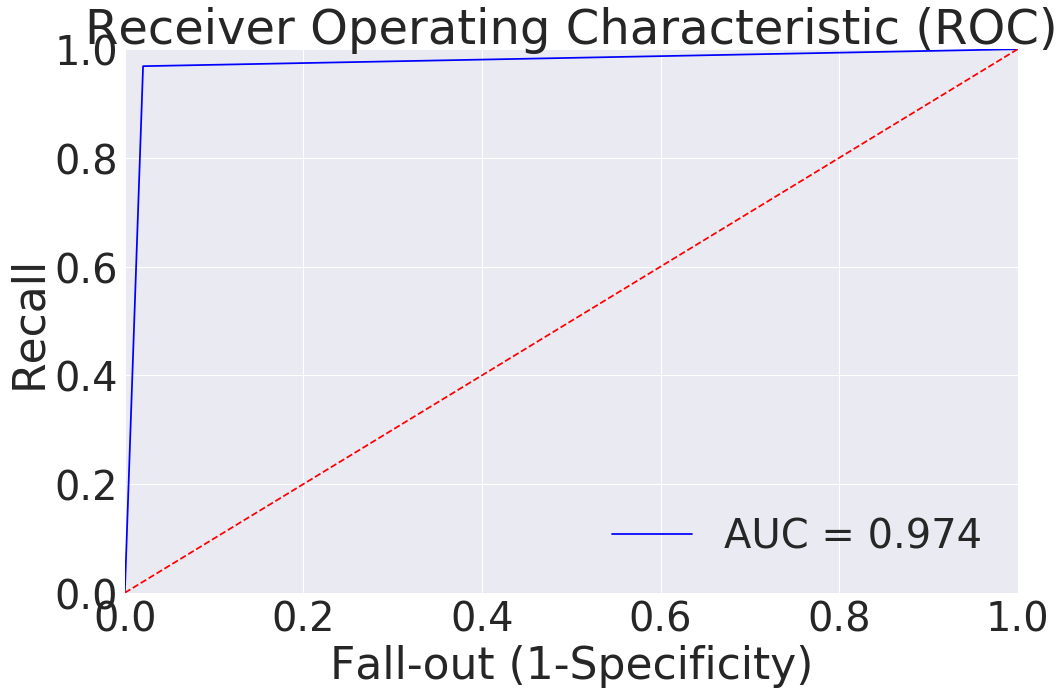

roc_auc_score: 0.9741754331106635


<Figure size 1152x720 with 0 Axes>

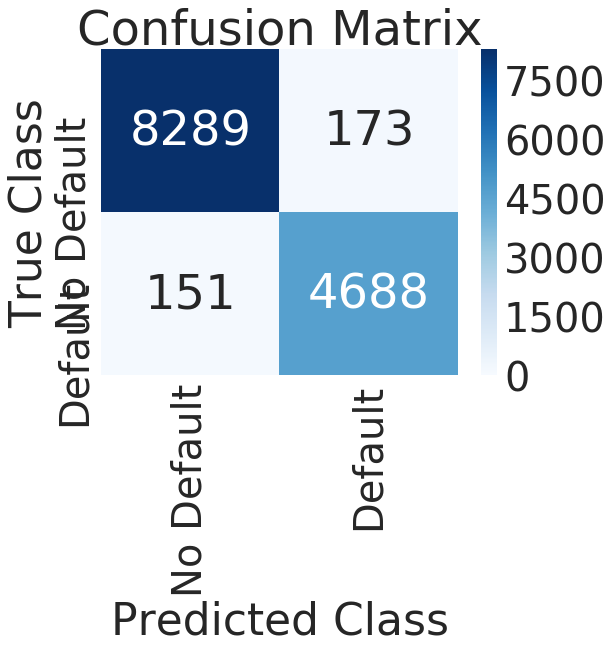

In [410]:
#Print accuracy
#CatBoostClassifier.plot_importance(model_cat, max_num_features=21, importance_type='split')
auc_cat = roc_auc_score(y_test,preds_cat)
print('roc_auc_score of CATBOOST model:', auc_cat)
print('Precision Metric:',precision_score(y_test, preds_cat))
print('Recall Metric:',recall_score(y_test, preds_cat))

#Print Area Under Curve
plt.figure(figsize=(16, 10))
false_positive_rate, recall, thresholds = roc_curve(y_test, preds_cat)
roc_auc = auc(false_positive_rate, recall)
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out (1-Specificity)')
plt.show()

#print('AUC score:', roc_auc)
print('roc_auc_score:', roc_auc_score(y_test,preds_cat))
#Print Confusion Matrix
plt.figure(figsize=(16, 10))
cm = confusion_matrix(y_test, preds_cat)
labels = ['No Default', 'Default']
plt.figure(figsize=(8,6))
sns.heatmap(cm, xticklabels = labels, yticklabels = labels, annot = True, fmt='d', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()


# Conculsion

In [430]:
models_performance = []

classifier_type = ['Logistic_regression',
                   'Random_Forrest_classifier',
                   'Decision_Tree_Classifier',
                   'KNeighborsClassifier',
                  'XGBoost',
                  'LGB',
                  'CatBoost']

models_performance.append((roc_auc_score(y_test, y_pred_LOG),
                          precision_score(y_test, y_pred_LOG),recall_score(y_test, y_pred_LOG)))


models_performance.append((roc_auc_score(y_test, np.around(y_pred_RF)),
                          precision_score(y_test, y_pred_RF),recall_score(y_test, y_pred_RF)))


models_performance.append((roc_auc_score(y_test, y_pred_tree),
                          precision_score(y_test, y_pred_tree),recall_score(y_test, y_pred_tree)))


models_performance.append((roc_auc_score(y_test, y_pred_knn),
                          precision_score(y_test, y_pred_knn),recall_score(y_test, y_pred_knn)))


models_performance.append((roc_auc_score(y_test, predictions),
                          precision_score(y_test, predictions),recall_score(y_test, predictions)))


models_performance.append((roc_auc_score(y_test, predictions_lgbm_01),
                          precision_score(y_test, predictions_lgbm_01),recall_score(y_test, predictions_lgbm_01)))


models_performance.append((roc_auc_score(y_test, preds_cat),
                          precision_score(y_test, preds_cat),recall_score(y_test, preds_cat)))


models_performance= pd.DataFrame(models_performance,columns=['roc_auc_score', 'Precision Metric','Recall Metric'])

classifier_type = pd.DataFrame(classifier_type,
                               columns=['classifiertype'])

models_performance = pd.concat([classifier_type, models_performance], axis=1)

models_performance = models_performance.sort_values('Recall Metric', ascending=False)
models_performance = models_performance.reset_index(drop=True)
models_performance




classifiertype  roc_auc_score  Precision Metric  Recall Metric
0  Random_Forrest_classifier       0.970227          0.933845       0.980161
1                        LGB       0.974676          0.960016       0.972515
2                    XGBoost       0.974662          0.962318       0.971068
3                   CatBoost       0.974175          0.964411       0.968795
4   Decision_Tree_Classifier       0.962039          0.950124       0.952676
5        Logistic_regression       0.855733          0.820780       0.812978
6       KNeighborsClassifier       0.780606          0.718866       0.722877